In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('starterek_nyers.csv', names = ['event', 'event_time', 'distinct_id', 'os_version', 'country_code'],
                dtype = {    #Oszlopok adattípusainak meghatározása
                    'event': str,
                    'distinct_id': str,
                    'os_version': str,
                    'country_code': str},
                 low_memory = False    #Kikapcsolja az oszlopok részleges olvasását
                )
df['event_time'] = pd.to_numeric(df['event_time'], errors = 'coerce') #Az 'event_time' oszlop konvertálása numerikus típussá
df['event_time'] = pd.to_datetime(df['event_time'], unit = 's', errors = 'coerce') #Az 'event_time' időbélyeggé alakítása


In [3]:
df = df[1:]
df.head()


,event,event_time,distinct_id,os_version,country_code
1,typeSelected,2025-02-25 14:30:58,$device:user_37462920966871,18.3.1,US
2,OnboardingSourcePicker,2025-02-25 14:30:58,$device:user_37462920966871,18.3.1,US
3,user_attributes,2025-02-25 14:30:58,$device:user_37462920966871,18.3.1,US
4,sourceSelected,2025-02-25 14:31:02,$device:user_37462920966871,18.3.1,US
5,OnboardingRecordingOptions,2025-02-25 14:31:02,$device:user_37462920966871,18.3.1,US


In [4]:
df.isnull().sum()

event             0
event_time        0
distinct_id       0
os_version      488
country_code      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773583 entries, 1 to 4773583
Data columns (total 5 columns):
 #   Column        Dtype         
---  ------        -----         
 0   event         object        
 1   event_time    datetime64[ns]
 2   distinct_id   object        
 3   os_version    object        
 4   country_code  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 182.1+ MB


In [6]:
#Időrendi sorrendbe rakom a rekordokat
df = df.sort_values(by = 'event_time', ascending = True)
df

,event,event_time,distinct_id,os_version,country_code
4329225,AssignedToPaywallTryFreeTitle,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,US
4329226,onboardingShow,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,US
4329227,Homescreen,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,US
4329228,config_attributes,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,US
4329229,app_install,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,US
...,...,...,...,...,...
164551,app_close,2025-02-28 23:59:31,$device:user_22895041137020,18.3.1,ID
954328,VideoPreviewScreen.exportVideo,2025-02-28 23:59:35,$device:user_51444261797238,16.4,KZ
954329,VideoPreviewScreen.SaveSuccess,2025-02-28 23:59:35,$device:user_51444261797238,16.4,KZ
954330,RatingPromptShownImmediately,2025-02-28 23:59:35,$device:user_51444261797238,16.4,KZ


In [7]:
df.groupby('distinct_id').count().sort_values(by = 'event', ascending = True)

,event,event_time,os_version,country_code
distinct_id,,,,
$device:user_21916180157347,1,1,1,1
$device:user_95776775030291,1,1,1,1
$device:user_55682784390247,1,1,1,1
$device:user_29292838775560,1,1,1,1
$RCAnonymousID:user_13496056172654,1,1,1,1
...,...,...,...,...
$device:user_57428987730885,7561,7561,7561,7561
$device:user_50060405364642,7979,7979,7979,7979
$device:user_73276430310216,8621,8621,8621,8621


In [8]:
df[df['distinct_id'] == '$device:user_79266212657534']

,event,event_time,distinct_id,os_version,country_code
256578,$ae_first_open,2025-01-08 01:29:26,$device:user_79266212657534,18.2,JP
256580,onboardingShow,2025-01-08 01:29:26,$device:user_79266212657534,18.2,JP
256581,Homescreen,2025-01-08 01:29:26,$device:user_79266212657534,18.2,JP
256582,app_install,2025-01-08 01:29:26,$device:user_79266212657534,18.2,JP
256583,config_attributes,2025-01-08 01:29:26,$device:user_79266212657534,18.2,JP
...,...,...,...,...,...
873471,app_close,2025-02-18 04:57:46,$device:user_79266212657534,18.3.1,JP
873472,app_open,2025-02-18 04:57:50,$device:user_79266212657534,18.3.1,JP
873473,$ae_session,2025-02-18 04:59:02,$device:user_79266212657534,18.3.1,JP
873474,app_close,2025-02-18 04:59:02,$device:user_79266212657534,18.3.1,JP


In [9]:
#Február 22-én és utána startoló trialok -> nekik már nem volt idejük konvertálni, ezért őket kiszórom majd
starters_after_22 = df[(df['event_time'] > '2025-02-22 00:00:00') & (df['event'] == 'trial_started_event')]

In [10]:
#Egyetlen 22-e utáni usernek van dupla trial startja, de ő amúgy is duplikátum, és amúgy is törölhető
starters_after_22.groupby('distinct_id').count().sort_values(by = 'event', ascending = True)

,event,event_time,os_version,country_code
distinct_id,,,,
user_98524975230471,1,1,1,1
user_78022179872077,1,1,1,1
user_79285785300352,1,1,1,1
user_79794366057158,1,1,1,1
user_80495321623440,1,1,1,1
...,...,...,...,...
user_94576595664865,1,1,1,1
user_94792438110516,1,1,1,1
user_96630912677266,1,1,1,1


In [11]:
#Valóban duplikátum
starters_after_22[(starters_after_22['distinct_id'] == 'user_07810124896407') & (starters_after_22['event'] == 'trial_started_event')]

,event,event_time,distinct_id,os_version,country_code
2779165,trial_started_event,2025-02-24 08:57:01,user_07810124896407,18.1.1,unknown
3329883,trial_started_event,2025-02-24 08:57:01,user_07810124896407,18.1.1,unknown


In [12]:
users_after_22 = starters_after_22.distinct_id.to_list()

In [13]:
#Új DataFrame a február 22. előtti starterekkel
starterek = df[~df['distinct_id'].isin(users_after_22)]

In [14]:
starterek.isna().sum()

event             0
event_time        0
distinct_id       0
os_version      462
country_code      0
dtype: int64

In [15]:
#Kettő trial starttal rendelkezők február 22. előtt
starterek[starterek.event == 'trial_started_event'].groupby('distinct_id').count().sort_values(by = 'event', ascending = True).tail(12)

,event,event_time,os_version,country_code
distinct_id,,,,
$device:user_24152085003116,2,2,2,2
$device:user_25406666667556,2,2,2,2
$device:user_28435754200215,2,2,2,2
$device:user_30270000354259,2,2,2,2
$device:user_36814191260283,2,2,2,2
$device:user_53644012437287,2,2,2,2
user_02235743580083,2,2,2,2
user_62559822225563,2,2,2,2
$device:user_75586850891755,2,2,2,2


In [16]:
#Dupla trial starttal rendelkező user id-k kiszűrése
szurt_duplikatumok = starterek[starterek.event == 'trial_started_event'].groupby('distinct_id').count().sort_values(by = 'event', ascending = True).tail(12)
szurt_duplikatumok = szurt_duplikatumok.index.to_list()

In [17]:
duplikalt_sorok = starterek[(starterek['distinct_id'].isin(szurt_duplikatumok)) & (starterek['event'] == 'trial_started_event')].loc[lambda df: df.duplicated()]
duplikalt_sorok

,event,event_time,distinct_id,os_version,country_code
3619981,trial_started_event,2025-02-20 13:52:11,user_62559822225563,18.3.1,unknown


In [18]:
#Ő azzal kezdett, hogy nem újította meg az előfizetését, és valamikor utána új trialt indított
starterek[starterek['distinct_id'] == 'user_62559822225563']

,event,event_time,distinct_id,os_version,country_code
4084600,expiration_event,2025-02-01 11:11:28,user_62559822225563,18.2.1,unknown
4382168,app_install,2025-02-20 13:51:40,user_62559822225563,18.3.1,US
3619940,onboardingShow,2025-02-20 13:51:40,user_62559822225563,18.3.1,US
3619941,Homescreen,2025-02-20 13:51:40,user_62559822225563,18.3.1,US
3619942,app_install,2025-02-20 13:51:40,user_62559822225563,18.3.1,US
...,...,...,...,...,...
4382988,VideoPreviewScreen.SaveSuccess,2025-02-20 16:53:25,user_62559822225563,18.3.1,US
4382989,RatingPromptShownImmediately,2025-02-20 16:53:25,user_62559822225563,18.3.1,US
4382990,$ae_session,2025-02-20 16:53:27,user_62559822225563,18.3.1,US
4382991,app_close,2025-02-20 16:53:27,user_62559822225563,18.3.1,US


In [19]:
#Ez is duplikátum
starterek[(starterek['distinct_id'] == 'user_62559822225563') & (starterek['event'] == 'trial_started_event')]

,event,event_time,distinct_id,os_version,country_code
4382199,trial_started_event,2025-02-20 13:52:11,user_62559822225563,18.3.1,unknown
3619981,trial_started_event,2025-02-20 13:52:11,user_62559822225563,18.3.1,unknown


In [20]:
#Duplikátumok kiszűrése
starterek = starterek.drop_duplicates(subset = ['distinct_id', 'event', 'event_time'], keep = 'first')

In [21]:
#Úgy látszik sikerült kiszűrni a duplikátumokat
starterek[starterek['distinct_id'] == 'user_62559822225563']

,event,event_time,distinct_id,os_version,country_code
4084600,expiration_event,2025-02-01 11:11:28,user_62559822225563,18.2.1,unknown
4382168,app_install,2025-02-20 13:51:40,user_62559822225563,18.3.1,US
3619940,onboardingShow,2025-02-20 13:51:40,user_62559822225563,18.3.1,US
3619941,Homescreen,2025-02-20 13:51:40,user_62559822225563,18.3.1,US
3619943,config_attributes,2025-02-20 13:51:40,user_62559822225563,18.3.1,US
...,...,...,...,...,...
4382988,VideoPreviewScreen.SaveSuccess,2025-02-20 16:53:25,user_62559822225563,18.3.1,US
4382989,RatingPromptShownImmediately,2025-02-20 16:53:25,user_62559822225563,18.3.1,US
4382990,$ae_session,2025-02-20 16:53:27,user_62559822225563,18.3.1,US
4382991,app_close,2025-02-20 16:53:27,user_62559822225563,18.3.1,US


In [22]:
#Valóban már csak egyetlen trial started van
na = starterek[starterek['distinct_id'] == 'user_62559822225563'].groupby('event').count().sort_values(by = 'event_time', ascending = True)
na_filtered = na[na['event_time'] == 1]
na_filtered

,event_time,distinct_id,os_version,country_code
event,,,,
$ae_first_open,1,1,1,1
$identify,1,1,1,1
AssignedToShowCustomerSuccess,1,1,1,1
CancelWrittenFeedbackScreenFeedbackDismissother,1,1,1,1
OnboardingRecordingOptions,1,1,1,1
OnboardingReadingOptions,1,1,1,1
Created a folder,1,1,1,1
CancelWrittenFeedbackScreenOther,1,1,1,1
RegistrationSinginWithAppleSuccess,1,1,1,1


In [23]:
starterek[(starterek['distinct_id'] == 'user_62559822225563') & (starterek['event'] == 'trial_started_event')]

,event,event_time,distinct_id,os_version,country_code
4382199,trial_started_event,2025-02-20 13:52:11,user_62559822225563,18.3.1,unknown


In [24]:
#Ő a fura user, csak egy started eventje van, viszont három cancellation és három convertion
df[df.distinct_id == '$device:user_81525876587730'].groupby('event').count().sort_values(by = 'distinct_id', ascending = True).tail(50)

,event_time,distinct_id,os_version,country_code
event,,,,
uncancellation_event,1,1,1,1
trial_started_event,1,1,1,1
purchasefailed.Error,1,1,1,1
$ae_iap,2,2,2,2
ThankYouScreenCancelTap,2,2,2,2
SettingsScreenRestoreTap,2,2,2,2
ThankYouScreen,2,2,2,2
purchasestart,2,2,2,2
expiration_event,2,2,2,2


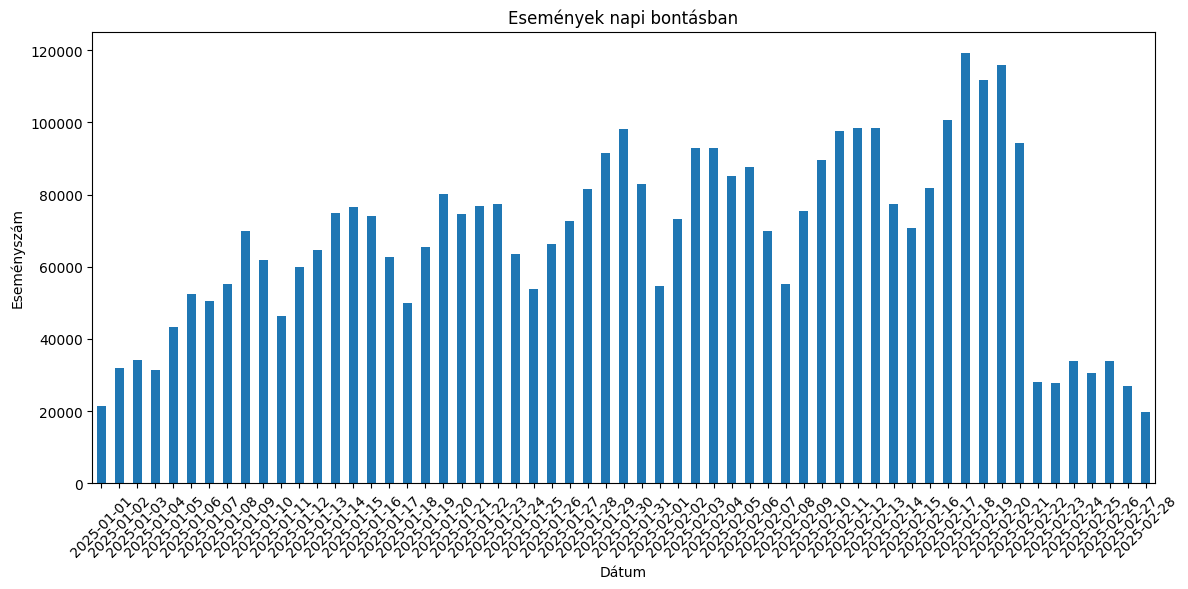

In [25]:
#ESEMÉNYSZÁMOK ÖSSZESÍTÉSE NAPI SZINTEN

#Dátumok napokra kerekítése
starterek['date'] = starterek['event_time'].dt.date

#Eseményszám naponta
date_counts = starterek['date'].value_counts().sort_index()

#Barchart
plt.figure(figsize = (12, 6))
date_counts.plot(kind = 'bar')
plt.xlabel('Dátum')
plt.ylabel('Eseményszám')
plt.title('Események napi bontásban')
plt.xticks(rotation = 45)
plt.tight_layout()


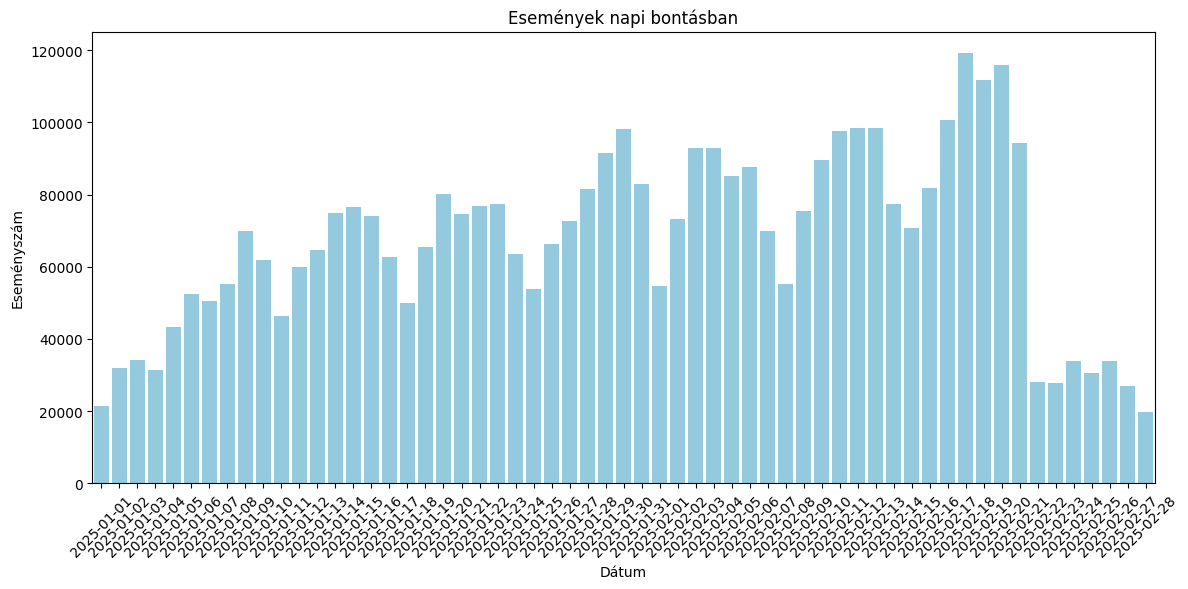

In [26]:
#Fenti megismétlése egy szebb kivitelben
date_counts = starterek['date'].value_counts().sort_index()
date_counts_df = date_counts.reset_index()
date_counts_df.columns = ['date', 'count']

plt.figure(figsize = (12, 6))
sns.barplot(data = date_counts_df, x = 'date', y = 'count', color = 'skyblue')
plt.xlabel('Dátum')
plt.ylabel('Eseményszám')
plt.title('Események napi bontásban')
plt.xticks(rotation = 45)
plt.tight_layout()


In [27]:
starterek['distinct_id'].nunique()

16673

In [28]:
starterek['os_version'].unique()

array(['18.1.1', '17.4.1', '18.1', '17.6.1', '17.7', '18.0.1', '16.1.1',
       '16.7.10', '18.2', '18.0', '17.7.1', '14.4', '17.6', '17.5.1',
       '17.2', '16.3.1', '15.7.5', '17.0.2', '17.5', '16.1', '15.2.1',
       '17.1.1', '16.5.1', '16.6.1', '15.1', nan, '15.8.3', '16.6',
       '16.7.8', '17.7.2', '18.3', '16.2', '17.1.2', '16.0', '16.7.2',
       '17.3', '15.5', '17.2.1', '16.3', '17.0.3', '16.1.2', '17.3.1',
       '14.7.1', '15.6.1', '16.7', '12.5.7', '17.1', '16.0.3', '15.2',
       '16.5', '16.0.2', '18.2.1', '15.6', '17.4', '17.0.1', '15.8',
       '15.3.1', '16.0.1', '16.7.7', '15.4', '14.6', '12.5.5', '15.7.9',
       '16.4.1', '15.1.1', '15.7.8', '14.4.2', '15.8.1', '15.0.2',
       '15.8.2', '15.0', '14.8.1', '16.7.5', '16.7.9', '16.4', '17.0',
       '15.4.1', '16.7.4', '15.7.1', '14.2', '15.7.6', '16.7.1', '14.4.1',
       '15.7', '12.4.6', '12.1.4', '14.0.1', '12.5.6', '12.4', '14.3',
       '15.3', '12.2', '14.8', '18.3.1', '15.0.1', '15.7.3', '12.4.4',
       '

In [29]:
starterek['os_version'].value_counts()

os_version
18.1.1    1562842
18.2.1     414557
18.3       351138
17.6.1     348375
18.3.1     314103
           ...   
13.4.1          1
14.5.1          1
14.7            1
14.1            1
15.7.2          1
Name: count, Length: 104, dtype: int64

In [30]:
#Van-e legalább egy True érték soronként?
starterek[starterek.isnull().any(axis = 1)]

,event,event_time,distinct_id,os_version,country_code,date
4574432,trial_cancelled_event,2025-01-01 21:22:02,$device:user_43793258787568,NaN,unknown,2025-01-01
1777352,videoRecorderRecorderOpened,2025-01-03 10:39:58,$device:user_51851628000430,NaN,unknown,2025-01-03
1777353,videoRecorderRecorderOpened,2025-01-03 10:40:08,$device:user_51851628000430,NaN,unknown,2025-01-03
1777354,videoRecorderVideosOpened,2025-01-03 10:40:24,$device:user_51851628000430,NaN,unknown,2025-01-03
1777355,videoRecorderRecorderOpened,2025-01-03 10:40:58,$device:user_51851628000430,NaN,unknown,2025-01-03
...,...,...,...,...,...,...
410121,trial_converted_event,2025-02-28 06:01:09,$device:user_87580766698214,NaN,unknown,2025-02-28
1122113,trial_cancelled_event,2025-02-28 09:25:03,$device:user_34219236405934,NaN,unknown,2025-02-28
331802,webpaywall_open,2025-02-28 16:28:27,$device:user_30609017692360,NaN,unknown,2025-02-28
4238065,trial_cancelled_event,2025-02-28 22:18:02,$device:user_21645921937697,NaN,unknown,2025-02-28


In [31]:
#print(starterek.country_code.value_counts().to_string())

country_code
US         1101951
ID          735962
FR          174916
UA          169944
BR          155660
DE          136110
ES          122722
RU          109457
GB           72630
NR           60365
MY           57728
unknown      52921
CA           52212
MX           51531
JP           47302
IL           45140
PL           44675
KZ           44475
NL           44184
TR           42242
IT           39963
PH           38220
AE           33397
AU           31403
KR           27388
BE           26566
CO           25322
CH           24095
CN           23643
TW           22295
PT           21182
SA           16389
TH           15627
SE           14840
RO           13917
IN           13906
HU           13901
FI           11803
HK           11131
VN           10904
ZA           10199
DK            8692
EC            8645
IE            8120
SG            7912
PE            7435
CL            7235
AR            7045
DO            6645
NG            6584
CZ            6554
MA            5961

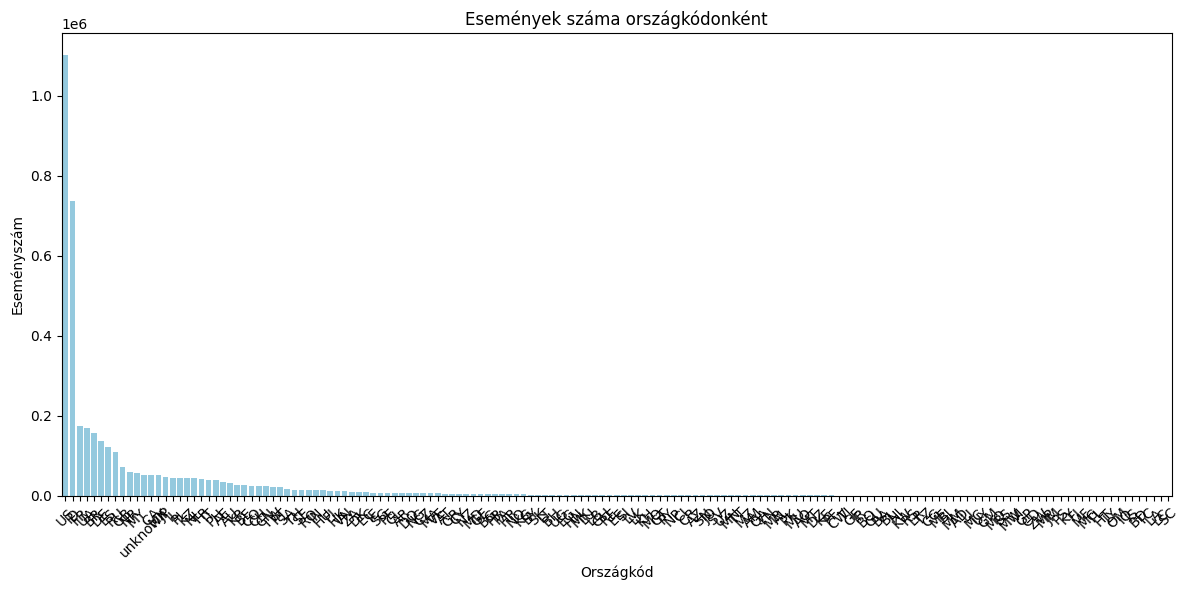

In [32]:
#Események száma országkódonként
country_counts = pd.DataFrame(starterek.country_code.value_counts())
country_counts = country_counts.reset_index()
country_counts.columns = ['country_codes', 'count']

plt.figure(figsize = (12, 6))
sns.barplot(data = country_counts, x = 'country_codes', y = 'count', color = 'skyblue')
plt.xlabel('Országkód')
plt.ylabel('Eseményszám')
plt.title('Események száma országkódonként')
plt.xticks(rotation = 45)
plt.tight_layout()


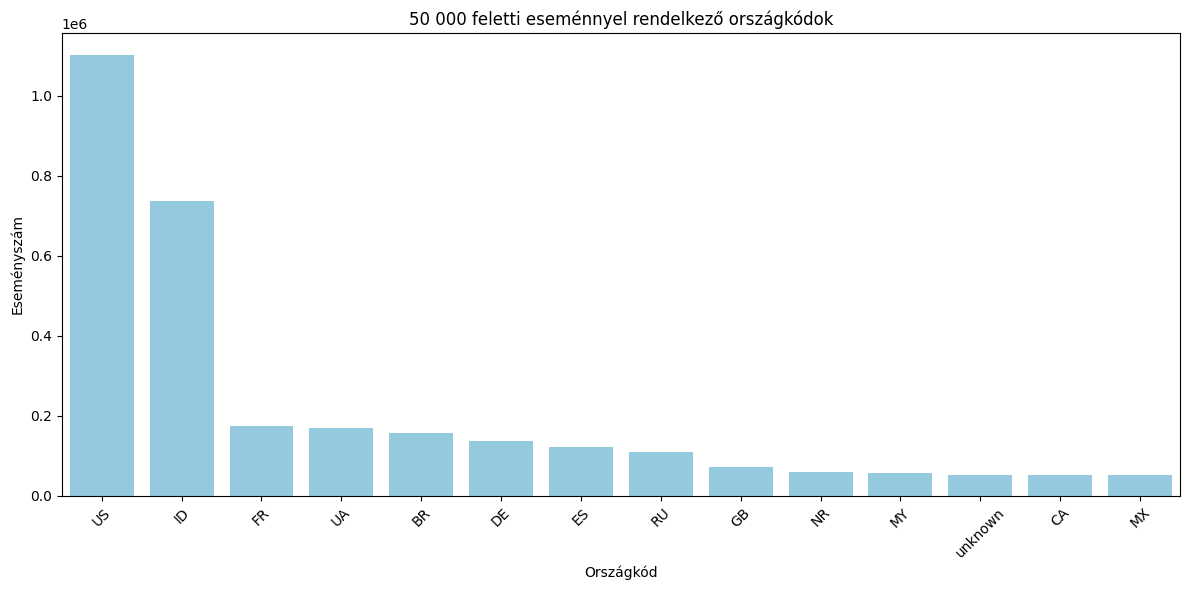

In [33]:
#A fenti egy káosz, szóval szűrés az 50 000 feletti országkódokra
filtered_series = starterek['country_code'].value_counts()
filtered_series = filtered_series[filtered_series > 50000]

#DataFrame-mé alakítás és átnevezés
country_counts = filtered_series.reset_index()
country_counts.columns = ['country_codes', 'count']

plt.figure(figsize = (12, 6))
sns.barplot(data = country_counts, x = 'country_codes', y = 'count', color = 'skyblue')
plt.xlabel('Országkód')
plt.ylabel('Eseményszám')
plt.title('50 000 feletti eseménnyel rendelkező országkódok')
plt.xticks(rotation = 45)
plt.tight_layout()


In [34]:
starterek.country_code.nunique()

155

In [35]:
#Tehát ugyanannyi az egyedi érték mint a starterek['distinct_id'].nunique() kódra, tehát FELTEHETŐLEG minden usernél van egy hiányzó országkódos sor
unknown_codes = starterek[starterek.country_code == 'unknown']
unknown_codes.distinct_id.nunique()


16673

In [36]:
unknown_codes

,event,event_time,distinct_id,os_version,country_code,date
4329260,trial_started_event,2025-01-01 00:04:18,$device:user_00568605503384,18.1.1,unknown,2025-01-01
1539411,trial_started_event,2025-01-01 00:14:32,$device:user_80839159569083,18.1,unknown,2025-01-01
4044906,trial_started_event,2025-01-01 00:16:24,$device:user_14346192408758,17.6.1,unknown,2025-01-01
3160972,trial_started_event,2025-01-01 00:16:37,$device:user_60905896945606,17.7,unknown,2025-01-01
4252555,trial_started_event,2025-01-01 00:23:06,$device:user_15034205382087,18.0.1,unknown,2025-01-01
...,...,...,...,...,...,...
389770,trial_cancelled_event,2025-02-28 23:26:03,$device:user_01219060103788,17.6.1,unknown,2025-02-28
4397122,expiration_event,2025-02-28 23:29:01,$device:user_76060857064024,17.7.2,unknown,2025-02-28
3356532,expiration_event,2025-02-28 23:29:20,$device:user_74892985281979,16.5,unknown,2025-02-28
1225092,renewal_event,2025-02-28 23:49:05,$device:user_20439495159676,17.6.1,unknown,2025-02-28


In [37]:
#Unknown országkódok pótlása
country_map = starterek[starterek['country_code'] != 'unknown'] \
    .groupby('distinct_id')['country_code'] \
    .agg(lambda x: x.mode().iloc[0]) #Leggyakoribb országkód visszaadása (ha nincs ilyen, akkor NaN érték lesz)

#Leggyakoribb országkódok hozzáadása az eredeti DataFrame-hez
starterek['country_code_imputed'] = starterek['distinct_id'].map(country_map)

#Az eredeti 'unknown' country_code-ok lecserélése a map alapján
starterek['country_code'] = starterek.apply(
    lambda row: row['country_code_imputed'] if row['country_code'] == 'unknown' else row['country_code'], axis = 1
)


In [38]:
#Tehát ahol nincsen leggyakoribb országkód, mert csak unknown érték volt a usernél, ott unknown helyett NaN érték lett
starterek.isna().sum()

event                      0
event_time                 0
distinct_id                0
os_version               462
country_code            9235
date                       0
country_code_imputed    9235
dtype: int64

In [39]:
starterek['country_code'].isna().sum()

np.int64(9235)

In [40]:
#NaN értékkel bíró country_code-ok feltöltése -> utóbb már tudom, hogy ez nem lehetséges

starterek['country_code'] = np.where(
    starterek['country_code'].isna(), #Ha a 'country_code' értéke Nan,
    starterek['country_code_imputed'], #akkor beteszi a country_code_imputed értékét,
    starterek['country_code'] #máskülönben megtartja az eredeti country_code értékét.
)


In [41]:
starterek['country_code'].isna().sum() #Még mindig NaN adatok vannak

np.int64(9235)

In [42]:
starterek[starterek['distinct_id'] == '$device:user_07730435917044']

,event,event_time,distinct_id,os_version,country_code,date,country_code_imputed
1986849,trial_started_event,2025-01-23 06:26:37,$device:user_07730435917044,18.0.1,NaN,2025-01-23,NaN
1986852,trial_cancelled_event,2025-01-23 19:45:03,$device:user_07730435917044,16.0.2,NaN,2025-01-23,NaN
1986853,uncancellation_event,2025-01-23 21:47:08,$device:user_07730435917044,18.2,NaN,2025-01-23,NaN
1988103,trial_converted_event,2025-01-30 06:26:37,$device:user_07730435917044,18.1.1,NaN,2025-01-30,NaN
1988105,trial_cancelled_event,2025-01-30 06:27:05,$device:user_07730435917044,18.1.1,NaN,2025-01-30,NaN
1988104,billing_issue_event,2025-01-30 06:27:05,$device:user_07730435917044,18.1.1,NaN,2025-01-30,NaN
1987708,cancellation_event,2025-01-31 01:47:06,$device:user_07730435917044,18.2.1,NaN,2025-01-31,NaN
1986856,expiration_event,2025-02-01 01:08:55,$device:user_07730435917044,16.4.1,NaN,2025-02-01,NaN
1986857,cancellation_event,2025-02-01 01:25:04,$device:user_07730435917044,16.4.1,NaN,2025-02-01,NaN


In [44]:
#A fenti userek esetében ezek a leggyakoribb (első) események -> gyanítom ezek olyan userek, akik korábban kezdtek trialt de aztán le is morzsolódnak
starterek[starterek['country_code'].isna()].groupby('distinct_id')['event'] \
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).value_counts()


event
expiration_event               1896
trial_converted_event           390
billing_issue_event             343
cancellation_event              199
trial_cancelled_event           115
trial_started_event              21
product_change_event              6
renewal_event                     3
videoRecorderRecorderOpened       1
webpaywall_open                   1
Name: count, dtype: int64

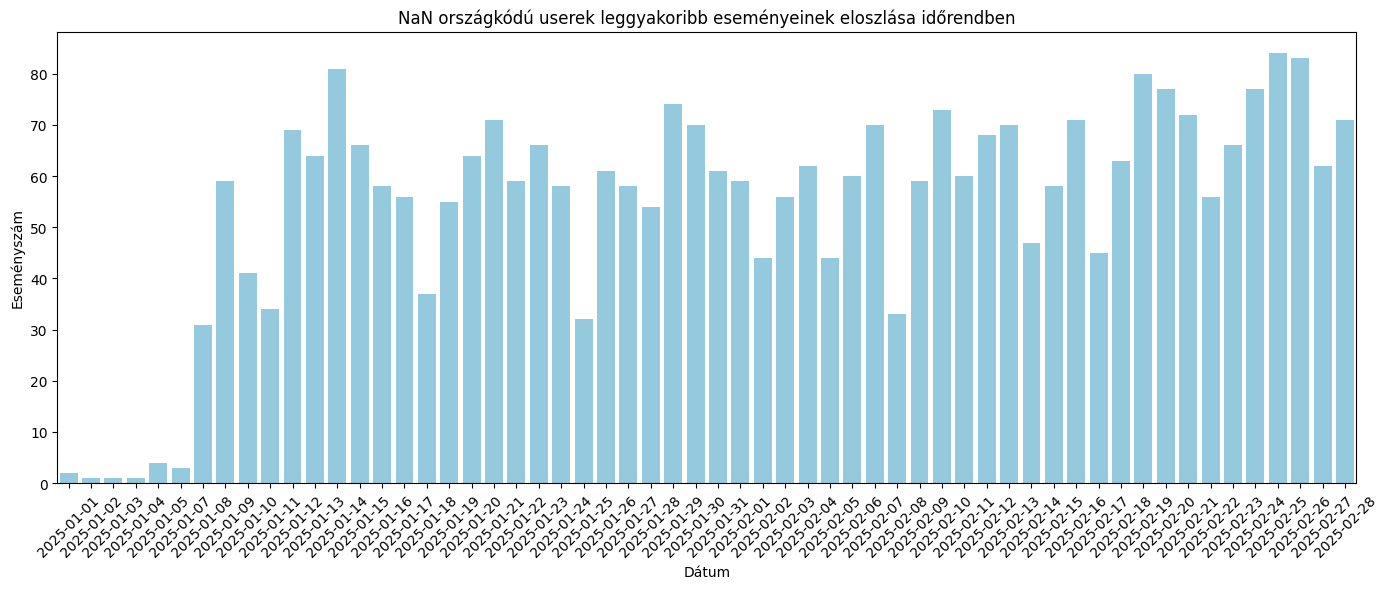

In [45]:
#Szűrök a fenti sorokra
hianyzo_country_code_users = starterek[starterek['country_code'].isna()]

#Minden distinct_id-hoz lekérem a leggyakoribb event
top_events_per_user = hianyzo_country_code_users.groupby('distinct_id')['event'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

#Utóbbi infó visszacsatolása annak érdekében, hogy megkapom az időbélyeget is
hianyzo_country_code_users = hianyzo_country_code_users.merge(
    top_events_per_user.rename('top_event'), on = 'distinct_id'
)

#Csak a top eseményekre szűrök
filtered_df = hianyzo_country_code_users[hianyzo_country_code_users['event'] == hianyzo_country_code_users['top_event']].copy()
filtered_df['date'] = filtered_df['event_time'].dt.date

#Csoportosítok dátum szerint
event_counts_by_date = (
    filtered_df['date'].value_counts().sort_index().reset_index().rename(columns = {'index': 'date', 'date': 'count'}))

#Erre elvben nincs szükség a fenti .rename() metódus miatt, de hibára futott, így még egyszer átneveztem az oszlopokat
event_counts_by_date.columns = ['date', 'count']

#Végül a barchart
plt.figure(figsize = (14, 6))
sns.barplot(data = event_counts_by_date, x = 'date', y = 'count', color = 'skyblue')
plt.xticks(rotation = 45)
plt.title('NaN országkódú userek leggyakoribb eseményeinek eloszlása időrendben')
plt.xlabel('Dátum')
plt.ylabel('Eseményszám')
plt.tight_layout()


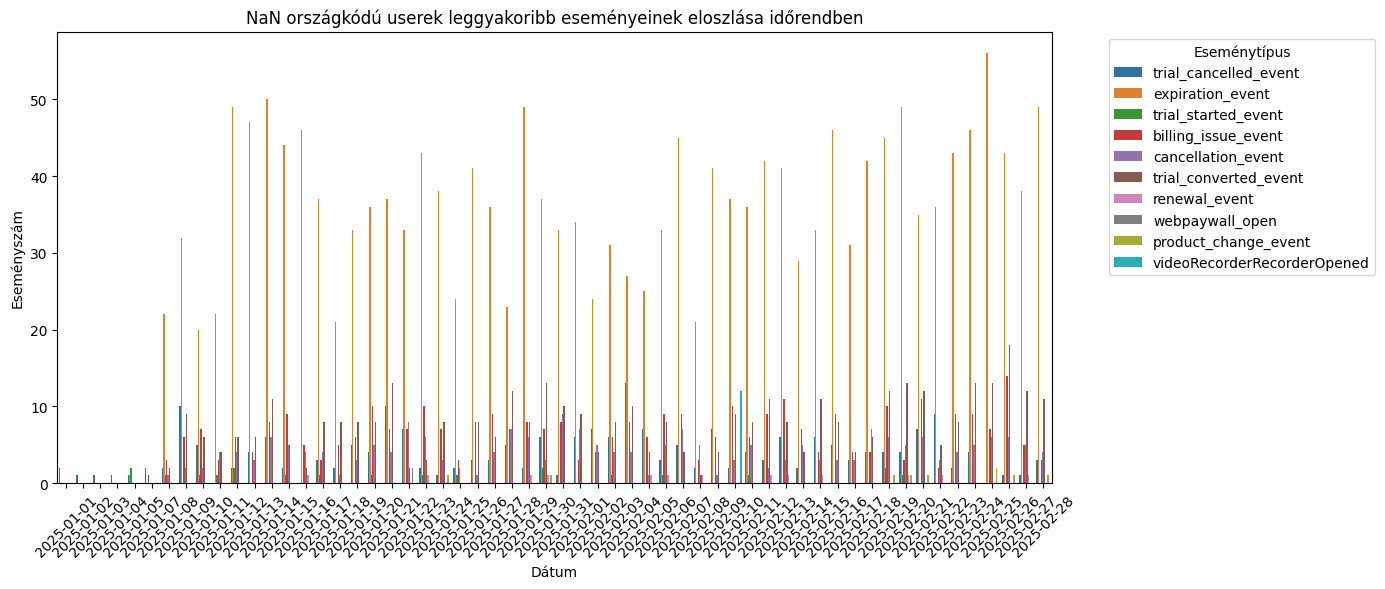

In [46]:
#Nézzük meg nem csak napok, hanem esemény alapján is csoportosítva
event_counts_by_date = (
    filtered_df.groupby(['date', 'top_event'])
    .size()
    .reset_index(name = 'count')
)

plt.figure(figsize = (14, 6))
sns.barplot(data = event_counts_by_date, x = 'date', y = 'count', hue = 'top_event')
plt.xticks(rotation = 45)
plt.title('NaN országkódú userek leggyakoribb eseményeinek eloszlása időrendben')
plt.xlabel('Dátum')
plt.ylabel('Eseményszám')
plt.legend(title = 'Eseménytípus', bbox_to_anchor = (1.05, 1), loc = 'best')
plt.tight_layout()


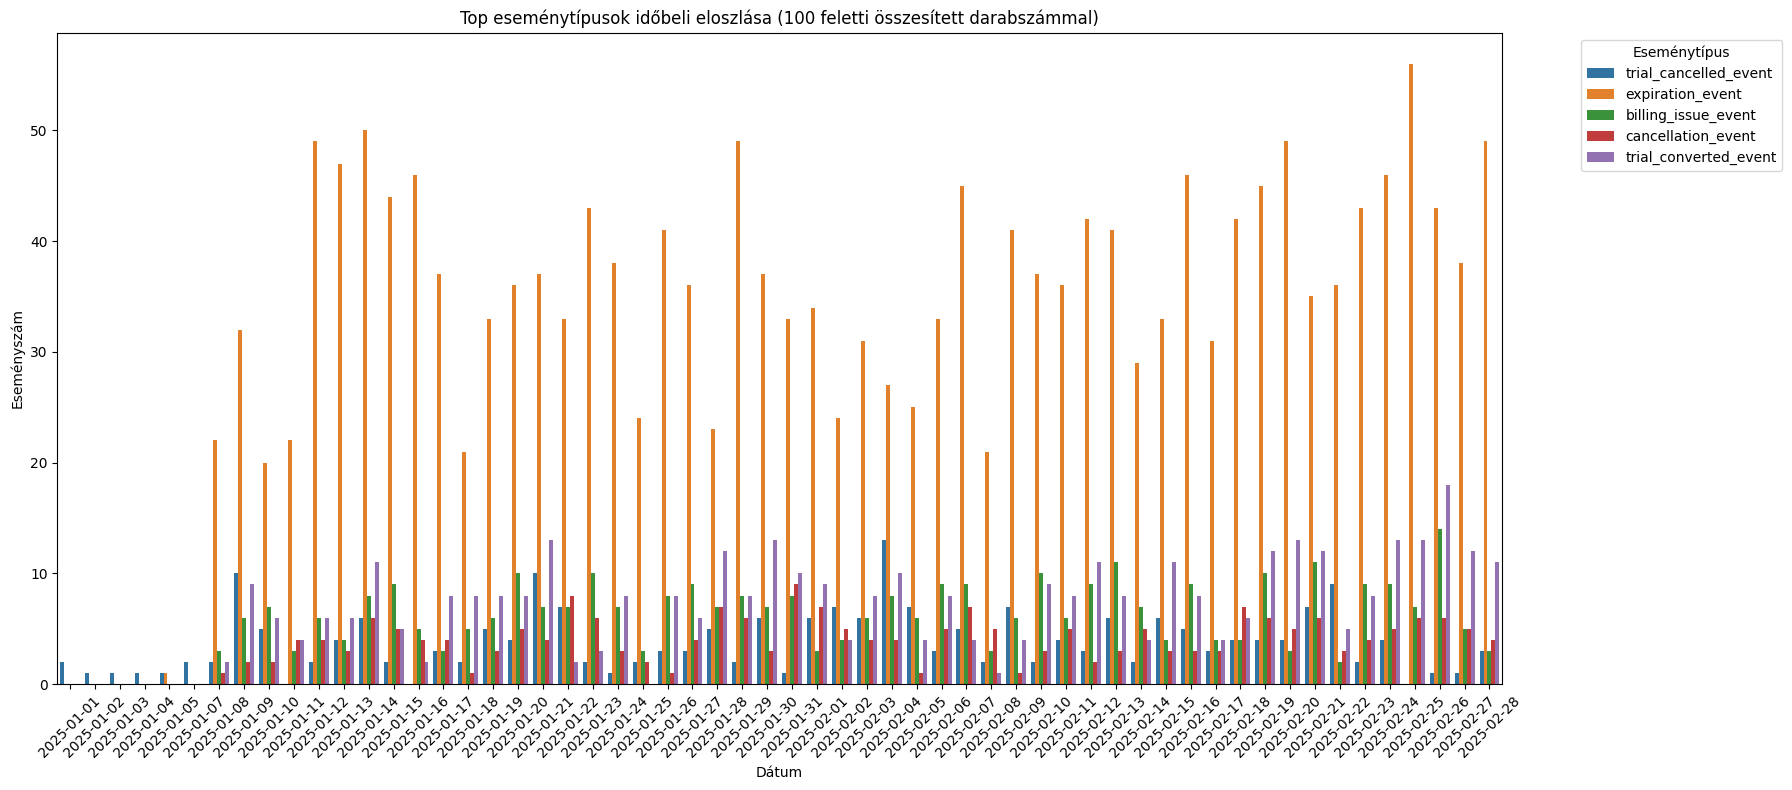

In [47]:
#Összesített darabszám eseménytípusonként
event_totals = filtered_df['top_event'].value_counts() #Melyik eseménysor hányszor szerepel összesen?

#A 100 feletti összesített számmal rendelkező események kiszűrése
valid_events = event_totals[event_totals > 100].index
filtered_df_top = filtered_df[filtered_df['top_event'].isin(valid_events)]

#Csoportosítás dátum és esemény szerint
event_counts_by_date = (
    filtered_df_top
    .groupby(['date', 'top_event'])
    .size()
    .reset_index(name = 'count')
)

#Nagyobb méretű grafikon létrehozása
plt.figure(figsize = (18, 8))
sns.barplot(data = event_counts_by_date, x = 'date', y = 'count', hue = 'top_event')
plt.xticks(rotation = 45)
plt.title('Top eseménytípusok időbeli eloszlása (100 feletti összesített darabszámmal)')
plt.xlabel('Dátum')
plt.ylabel('Eseményszám')
plt.legend(title = 'Eseménytípus', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()

#Leggyakrabban tehát az expiration_event jelent meg, ami azt jelenti, hogy
#az aktív előfizetés elérte a megújítási dátumot, de nem újult meg, és már nem aktív.

#Szóval arra jutottam, hogy ezeket a usereket simán eldobom!

In [48]:
event_counts_by_date

,date,top_event,count
0,2025-01-01,trial_cancelled_event,2
1,2025-01-02,trial_cancelled_event,1
2,2025-01-03,trial_cancelled_event,1
3,2025-01-04,trial_cancelled_event,1
4,2025-01-05,expiration_event,1
...,...,...,...
258,2025-02-28,billing_issue_event,3
259,2025-02-28,cancellation_event,4
260,2025-02-28,expiration_event,49
261,2025-02-28,trial_cancelled_event,3


In [49]:
#Az ideiglenes 'country_code_imputed' oszlop eltávolítása
starterek.drop(columns = ['country_code_imputed'], inplace = True)

In [50]:
#Valóban nincs már unknown country code
#print(starterek.country_code.value_counts().to_string())

country_code
US    1113477
ID     745236
FR     176835
UA     172008
BR     157312
DE     137386
ES     123988
RU     110936
GB      73438
NR      61015
MY      58283
CA      52686
MX      52153
JP      47710
IL      45569
PL      45092
KZ      45060
NL      44683
TR      42606
IT      40324
PH      38753
AE      33683
AU      31803
KR      27633
BE      26886
CO      25605
CH      24379
CN      23968
TW      22609
PT      21426
SA      16548
TH      15828
SE      14996
RO      14035
IN      14024
HU      13988
FI      11917
HK      11265
VN      11033
ZA      10332
EC       8795
DK       8748
IE       8191
SG       8008
PE       7529
CL       7350
AR       7108
DO       6732
NG       6666
CZ       6643
MA       6015
VE       5956
AT       5578
GR       5065
CY       4774
NZ       4669
MD       4312
GE       4184
PR       3980
BG       3964
PA       3801
HR       3685
NO       3570
KG       3478
BY       3200
SK       3198
LT       3094
BH       2790
UG       2709
EG       2668
HN     

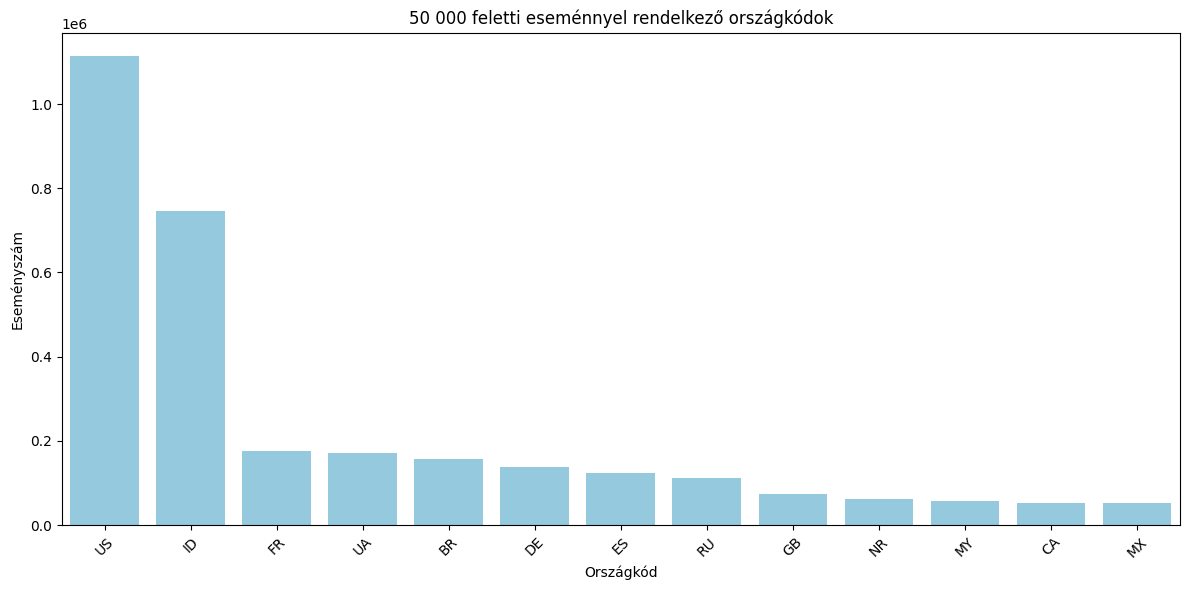

In [51]:
#Itt sem látszódnak már az unknown értékek!

#Szűrés az 50000 feletti országkódokra
filtered_series = starterek['country_code'].value_counts()
filtered_series = filtered_series[filtered_series > 50000]

#DataFrame-mé alakítás és átnevezés
country_counts = filtered_series.reset_index()
country_counts.columns = ['country_codes', 'count']

plt.figure(figsize = (12, 6))
sns.barplot(data = country_counts, x = 'country_codes', y = 'count', color = 'skyblue')
plt.xlabel('Országkód')
plt.ylabel('Eseményszám')
plt.title('50 000 feletti eseménnyel rendelkező országkódok')
plt.xticks(rotation = 45)
plt.tight_layout()


In [52]:
#NaN értékek pótlása az os_version oszlopban
starterek = starterek.sort_values(by = ['distinct_id', 'event_time']) #Minden user eseményeinek időrendi sorrendbe helyezése

#Csoportosítás userenként és előre- illetve visszatöltés
starterek['os_version_imputed'] = (
    starterek.groupby('distinct_id')['os_version']
    .transform(lambda x: x.ffill().bfill()) #.apply() hibát okozott -> ő új indexet hoz létre ami gondot okozott, a .transform() ezt nem teszi
)

#Az új os_version_imputed értékei alapján feltöltjük az eredeti os_version NaN értékeit
starterek['os_version'] = starterek['os_version'].fillna(starterek['os_version_imputed'])


In [53]:
starterek[starterek.distinct_id == '$device:user_43793258787568']

,event,event_time,distinct_id,os_version,country_code,date,os_version_imputed
4574331,AssignedToPaywallTryFreeTitle,2025-01-01 19:10:53,$device:user_43793258787568,18.2,CN,2025-01-01,18.2
4574330,$ae_first_open,2025-01-01 19:10:53,$device:user_43793258787568,18.2,CN,2025-01-01,18.2
4574336,app_open,2025-01-01 19:10:54,$device:user_43793258787568,18.2,CN,2025-01-01,18.2
4574335,config_attributes,2025-01-01 19:10:54,$device:user_43793258787568,18.2,CN,2025-01-01,18.2
4574334,app_install,2025-01-01 19:10:54,$device:user_43793258787568,18.2,CN,2025-01-01,18.2
...,...,...,...,...,...,...,...
4574429,Homescreen,2025-01-01 19:19:36,$device:user_43793258787568,18.2,CN,2025-01-01,18.2
4574431,app_close,2025-01-01 19:19:40,$device:user_43793258787568,18.2,CN,2025-01-01,18.2
4574430,$ae_session,2025-01-01 19:19:40,$device:user_43793258787568,18.2,CN,2025-01-01,18.2
4574432,trial_cancelled_event,2025-01-01 21:22:02,$device:user_43793258787568,18.2,CN,2025-01-01,18.2


In [54]:
starterek = starterek.sort_values(by = 'event_time', ascending = True)

In [55]:
#Hiányzó adatokat elvben akkor normálisan kezeltem
starterek['os_version'].isna().sum()

np.int64(0)

In [57]:
#Fentihez hasonló "nyomtalanul eltűnő" userek kiszűrése
filter_eltunokhoz = starterek[(starterek['event'] == 'trial_cancelled_event') | (starterek['event'] == 'trial_converted_event')]
filter_eltunokhoz = filter_eltunokhoz['distinct_id'].to_list()
eltunt_userek = starterek[~starterek['distinct_id'].isin(filter_eltunokhoz)]
eltunt_userek = list(set(eltunt_userek['distinct_id'].to_list()))
len(eltunt_userek) #Összesen 60 ilyen user van csak akik eltűnnek

starterek = starterek[~starterek['distinct_id'].isin(eltunt_userek)]

'''
Egyszerűbben is kiszűrhetők amúgy:
nem_eltuno_userek = starterek[starterek['event'].isin(['trial_cancelled_event', 'trial_converted_event'])]['distinct_id'].unique()
starterek = starterek[starterek['distinct_id'].isin(nem_eltuno_userek)]
'''

"\nEgyszerűbben is kiszűrhetők amúgy:\nnem_eltuno_userek = starterek[starterek['event'].isin(['trial_cancelled_event', 'trial_converted_event'])]['distinct_id'].unique()\nstarterek = starterek[starterek['distinct_id'].isin(nem_eltuno_userek)]\n"

In [58]:
#Elvben már minden usernek van vagy cancellationje vagy convertionje, esetleg mindkettője
starterek[starterek['distinct_id'].isin(eltunt_userek)]

,event,event_time,distinct_id,os_version,country_code,date,os_version_imputed


In [59]:
#Valóban pont hatvannal csökkent az egyedi user id-k száma, szóval elvben jó vagyok
starterek['distinct_id'].nunique()

16613

In [60]:
#És akkor itt vannak a 'dögglött userek', szerintem őket simán eldobom
#Fentiekben látszódott, hogy semmi érdemit nem tettek az appban, csak trial start, cancellation, expiration stb.
starterek['country_code'].isna().sum()

np.int64(9214)

In [61]:
starterek.drop(['os_version_imputed'], inplace = True, axis = 1)

In [62]:
#2954 egyedi értékem van azokból a distinct_id-kból, akiknél NaN az országkód
starterek[starterek['country_code'].isna()]['distinct_id'].nunique()

2954

In [63]:
#NaN-os országkódú sorok törlése
starterek = starterek.dropna(subset = ['country_code'])

In [64]:
starterek['country_code'].isna().sum()

np.int64(0)

In [65]:
#2 954 döglött userem volt -> kijön, mert 16 613 - 2 954 = 13 659
starterek['distinct_id'].nunique()

13659

In [66]:
#Elviekben egyetlen duplikált sorom sincsen!
starterek.duplicated(subset = ['event', 'event_time', 'distinct_id']).any()

np.False_

In [67]:
#AKKOR SZERINTEM A starterek NAGYJÁBÓL TISZTÁNAK MONDHATÓ

In [68]:
#Eleinte próbálkoztam azzal, hogy súlyozzam az eseményeket a 'TP_event_descriptiona' tábla alapján
#A piros eseményeknek 1, a semlegeseknek 2, míg a zöld eseményeknek 3 pontot adtam
#Végül ezzel nem csináltam semmi érdemit, de nem töröltem ki
sulyok = pd.read_excel('Eventek_to_Python.xlsx')

In [69]:
sulyok.head()

,event,sulypont
0,$ae_first_open,2
1,$ae_iap,1
2,$ae_session,2
3,$ae_updated,1
4,$create_alias,2


In [70]:
#A starterek merge-ölése a súlyokkal
starterek = starterek.merge(sulyok, on = 'event', how = 'left')

In [72]:
starterek.isna().sum()

event               0
event_time          0
distinct_id         0
os_version          0
country_code        0
date                0
sulypont        57183
dtype: int64

In [73]:
#A hiányzó értékeknek 1 pontot adtam, mivel a nevezés véglegesítése utáni emailben az volt a mondás, hogy
#a táblából hiányzó eventek értéktelenek
starterek['sulypont'] = starterek['sulypont'].fillna(1)

In [74]:
starterek.isna().sum()

event           0
event_time      0
distinct_id     0
os_version      0
country_code    0
date            0
sulypont        0
dtype: int64

In [75]:
starterek['sulypont'].value_counts()

sulypont
2.0    3227163
1.0     652480
3.0      90287
Name: count, dtype: int64

In [76]:
#MEGKEZDEM A VALÓBAN KONVERTÁLÓ USEREK MEGKERESÉSÉT, MEGJELÖLÉSÉT

In [77]:
trial_events = ['trial_started_event', 'trial_converted_event', 'trial_cancelled_event']

In [78]:
#Trial alapján szűröm, időrendbe rendezem a usereket
trial_df = starterek[starterek['event'].isin(trial_events)].copy()
trial_df = trial_df.sort_values(by = ['distinct_id', 'event_time'])

In [79]:
trial_df

,event,event_time,distinct_id,os_version,country_code,date,sulypont
2278658,trial_started_event,2025-02-05 07:15:20,$RCAnonymousID:user_00700112690657,18.1.1,US,2025-02-05,3.0
2806724,trial_converted_event,2025-02-11 23:16:05,$RCAnonymousID:user_00700112690657,18.3,US,2025-02-11,3.0
2719141,trial_started_event,2025-02-11 02:11:57,$RCAnonymousID:user_00925483708199,18.3,GB,2025-02-11,3.0
3311427,trial_converted_event,2025-02-17 18:13:05,$RCAnonymousID:user_00925483708199,18.3,GB,2025-02-17,3.0
751091,trial_started_event,2025-01-15 17:25:53,$RCAnonymousID:user_01437385556700,18.2.1,BR,2025-01-15,3.0
...,...,...,...,...,...,...,...
2311005,trial_cancelled_event,2025-02-05 14:13:02,user_99730907890749,17.5.1,UA,2025-02-05,3.0
3185966,trial_started_event,2025-02-16 09:29:05,user_99882878985269,18.3.1,PT,2025-02-16,3.0
3316198,trial_cancelled_event,2025-02-17 19:27:03,user_99882878985269,18.3,PT,2025-02-17,3.0
1316918,trial_started_event,2025-01-23 19:14:35,user_99947267453523,17.5.1,ID,2025-01-23,3.0


In [80]:
#Előző esemény típusa és időbélyege
trial_df['prev_event'] = trial_df.groupby('distinct_id')['event'].shift(1) #
trial_df['prev_time'] = trial_df.groupby('distinct_id')['event_time'].shift(1)

#Megkeressük azokat a sorokat, ahol a trial converted-et közvetlenül trial started előzi meg (ez még nem biztos, hogy konverzió!)
converted_candidates = trial_df[
    (trial_df['event'] == 'trial_converted_event') &
    (trial_df['prev_event'] == 'trial_started_event')
].copy()

#Függvény, amely megmondja: volt-e cancel event két időpont között. Ha volt, akkor True-t, ha nem volt, akkor False-t ad vissza
def was_cancelled_between(user_df, start, end):
    return user_df[
        (user_df['event_time'] > start) & #Az aktuális trial indulásának időpontja -> innen vizsgálja a user_df sorait
        (user_df['event_time'] < end) & #Egy időpont a (potenciális) konverzióra -> eddig vizsgáljuk a köztes eseményeket
        (user_df['event'] == 'trial_cancelled_event')
    ].shape[0] > 0 #A .shape[0] mondja meg, hány sor felelt meg a fenti feltételeknek. Ha az érték 0-nál nagyobb, akkor True; ha 0, akkor False

#Ellenőrzés minden sorra: volt-e cancel esemény két esemény között
converted_candidates['cancelled_in_between'] = converted_candidates.apply(
    lambda row: was_cancelled_between(
        trial_df[trial_df['distinct_id'] == row['distinct_id']],
        row['prev_time'],
        row['event_time']
    ),
    axis = 1
)

#Csak azokat tartjuk meg, ahol NEM volt cancel közben
valid_converted = converted_candidates[converted_candidates['cancelled_in_between'] == False]

#Egyedi azonosítók, akik valóban konvertáltak
converted_users = valid_converted['distinct_id'].unique()

#Jelöljük a fő df-ben, hogy ki konvertált
starterek['converted'] = starterek['distinct_id'].isin(converted_users)

#Ellenőrzés
print(f'Valóban konvertált userek száma: {len(converted_users)}')


Valóban konvertált userek száma: 2206


In [81]:
#Index rendezése
starterek.reset_index(drop = True, inplace = True)
starterek


,event,event_time,distinct_id,os_version,country_code,date,sulypont,converted
0,user_attributes,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,US,2025-01-01,1.0,True
1,session_start,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,US,2025-01-01,2.0,True
2,app_open,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,US,2025-01-01,2.0,True
3,app_install,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,US,2025-01-01,2.0,True
4,config_attributes,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,US,2025-01-01,2.0,True
...,...,...,...,...,...,...,...,...
3969925,AVCapture.interruption.Ended,2025-02-28 23:52:47,$device:user_95121363878493,18.3,TH,2025-02-28,1.0,False
3969926,app_open,2025-02-28 23:52:48,$device:user_95121363878493,18.3,TH,2025-02-28,2.0,False
3969927,app_close,2025-02-28 23:52:54,$device:user_95121363878493,18.3,TH,2025-02-28,2.0,False
3969928,app_close,2025-02-28 23:56:28,$RCAnonymousID:user_12571127047252,18.3.1,US,2025-02-28,2.0,True


In [82]:
#Mostmár kimentem ezt a startereket, mert ez a fenti elég nehézkesen futott le
#starterek.to_csv('starterek.csv', index=False, encoding='utf-8')

In [83]:
#INNENTŐL BEOLVASOM A FÁJLT

In [84]:
starterek = pd.read_csv('starterek.csv',
                dtype = {    #Oszlopok adattípusainak meghatározása
                    'event': str,
                    'distinct_id': str,
                    'os_version': str,
                    'country_code': str,
                    'sulypont': str,
                    'converted': bool
                },
                 low_memory = False    #Kikapcsolja az oszlopok részleges olvasását
                )

starterek['event_time'] = pd.to_datetime(starterek['event_time'], errors = 'coerce') #Az 'event_time' időbélyeggé alakítása
starterek['date'] = pd.to_datetime(starterek['date'], errors = 'coerce') #A 'date' időbélyeggé alakítása
starterek['sulypont'] = pd.to_numeric(starterek['sulypont'], errors = 'coerce').astype('Int64') #Az 'sulypont' oszlop konvertálása numerikus típussá


In [85]:
#Kicsit idegesít ez az országkódos megoldás, szóval hozzárakom a neveket, max később eldobom
country_codes = pd.read_csv('all_country_codes.csv') #Saját készítésű csv az országnevekkel
country_codes


,country_code,country_name
0,BS,Bahamas
1,BD,Bangladesh
2,TL,Timor_Leste
3,TZ,Tanzania
4,HT,Haiti
...,...,...
149,ZW,Zimbabwe
150,MF,Saint_Martin
151,LA,Laos
152,LC,Saint_Lucia


In [86]:
#Országnevek hozzáadása az eredeti DF-hez
starterek = starterek.merge(country_codes, on = 'country_code', how = 'left')

In [87]:
starterek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3969930 entries, 0 to 3969929
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   event         object        
 1   event_time    datetime64[ns]
 2   distinct_id   object        
 3   os_version    object        
 4   country_code  object        
 5   date          datetime64[ns]
 6   sulypont      Int64         
 7   converted     bool          
 8   country_name  object        
dtypes: Int64(1), bool(1), datetime64[ns](2), object(5)
memory usage: 249.9+ MB


In [88]:
starterek.dtypes

event                   object
event_time      datetime64[ns]
distinct_id             object
os_version              object
country_code            object
date            datetime64[ns]
sulypont                 Int64
converted                 bool
country_name            object
dtype: object

In [90]:
starterek.head(1)

,event,event_time,distinct_id,os_version,country_code,date,sulypont,converted,country_name
0,first_seen,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,US,2025-01-01,1,True,United_States


In [91]:
starterek.groupby('distinct_id')['converted'].sum() #False értékek = 0, True-k = 1, ezek kerültek összeadásra

distinct_id
$RCAnonymousID:user_00700112690657     42
$RCAnonymousID:user_00925483708199    137
$RCAnonymousID:user_01437385556700     76
$RCAnonymousID:user_02314471583726    344
$RCAnonymousID:user_02513418384456    200
                                     ... 
user_99555947782843                     0
user_99644042308292                     0
user_99730907890749                     0
user_99882878985269                     0
user_99947267453523                     0
Name: converted, Length: 13659, dtype: int64

In [93]:
#Különböző user_id-típusok szétbontáshoz csinálok egy függvényt
def categorize_user_id(user_id):
    if user_id.startswith('$device:'):
        return 'device'
    elif user_id.startswith('$RCAnonymousID:'):
        return 'anonymous'
    else:
        return 'regular'


In [94]:
starterek['user_type'] = starterek['distinct_id'].apply(categorize_user_id)

In [95]:
#Usertípusonként megnézzük a konverziós arányt -> ez soronként van, emiatt torz mint a ***, TORZ!!!!
user_type_conv = starterek.groupby('user_type')['converted'].agg(['sum', 'count'])
user_type_conv['conversion_rate'] = user_type_conv['sum'] / user_type_conv['count']
user_type_conv


,sum,count,conversion_rate
user_type,,,
anonymous,18794,41524,0.452606
device,910665,3757856,0.242336
regular,40654,170550,0.238370


In [96]:
#Szóval most újra, de már egyedi user_id-k alapján!
user_level_type_df = starterek.groupby('distinct_id').agg({
    'converted': 'max', #Volt-e konverzió?
    'user_type': 'first' #Melyik usertípusba tartozik?
}).reset_index()

#Arányszámítás
user_level_type_conv = user_level_type_df.groupby('user_type')['converted'].agg(['sum', 'count'])
user_level_type_conv['conversion_rate'] = user_level_type_conv['sum'] / user_level_type_conv['count']
user_level_type_conv


,sum,count,conversion_rate
user_type,,,
anonymous,71,159,0.446541
device,2044,12942,0.157935
regular,91,558,0.163082


In [97]:
#Megnézzük országokra lebontva is -> ez azonban azért kevésbé jó, mert event-sor szinten nézi
country_conv = starterek.groupby('country_code')['converted'].agg(['sum', 'count'])
country_conv['unique_users'] = starterek.groupby('country_code')['distinct_id'].nunique()
country_conv['conversion_rate'] = country_conv['sum'] / country_conv['count']
#print(country_conv.sort_values(by = ['conversion_rate', 'unique_users'], ascending = False).to_string())

#Kb. az US az egyetlen ország, ahol elég magas a konverziós arány úgy, hogy még sok user is van -> 3 921 és 43,8%
#ID-ben viszont 2 800 az egyedi user, ám a konverziós arány mindössze 1,6%
#Nagyobb számban vannak még JP, IT, CA, bár ezek csak 100-170 közötti userek, de nekik még 37-38% a konverziós rátájuk
#Szóval gyanús, hogy csak túl drága az app
#NR is egész jó -> ez viszont nagyon gyanús, mert NR = Nauru ami egy isten háta mögötti sziget Óceániában

                 sum    count  unique_users  conversion_rate
country_code                                                
BS               237      237             2         1.000000
HT               124      124             2         1.000000
BD                78       78             1         1.000000
CW               688      688             1         1.000000
LA                27       27             1         1.000000
LC                 9        9             1         1.000000
MF               139      139             1         1.000000
TC                78       78             1         1.000000
TL               136      136             1         1.000000
TZ               345      345             1         1.000000
UY               268      268             1         1.000000
GR              4758     5065             5         0.939388
KH              1573     1946             4         0.808325
LI               215      277             2         0.776173
RE              1880    

In [98]:
#Szóval nem elég, hogy Nauru egy lehetetlen hely, ahol nem hiszem, hogy sokan veszik a Telepromtert, de ráadásul
#feltűnt, hogy bizonyos usereknél két country code is van, például ennél:
starterek[starterek['distinct_id'] == '$RCAnonymousID:user_00700112690657']['country_code'].unique()

array(['US', 'NR'], dtype=object)

In [99]:
#Egyedi country_code-ok száma userenként
user_country_counts = starterek.groupby('distinct_id')['country_code'].nunique()

#Hány usernél több mint 1 unique country_code fordul elő?
multi_country_mask = user_country_counts > 1
num_multi_country_users = multi_country_mask.sum() #Ez amúgy 809 user basszameg!

#Összes user száma
total_users = user_country_counts.shape[0] #Ez 13 659

#Arány kiszámítása
fraction_multi_country = num_multi_country_users / total_users

print(f'{num_multi_country_users}/{total_users} felhasználó ({fraction_multi_country:.2%}) esetében szerepel több mint egy country_code.')


809/13659 felhasználó (5.92%) esetében szerepel több mint egy country_code.


In [100]:
#TÖBBFÉLE COUNTRY_CODE-DAL RENDELKEZŐ USEREK KISZŰRÉSE, KEZELÉSE

#Kiknél van többféle országkód?
user_country_counts = starterek.groupby('distinct_id')['country_name'].nunique()
multi_users = user_country_counts[user_country_counts > 1].index #Nekik több mint 1 országkóduk van, 809 user

#Országhalmozó userek eseménysorai
multi_df = starterek[starterek['distinct_id'].isin(multi_users)]

#Minden egyes userhez kigyűjtöm az egyedi country_code listát tuple formában, rendezve
user_country_pairs = (
    multi_df
    .groupby('distinct_id')['country_name']
    .unique()
    .apply(lambda arr: tuple(sorted(arr)))
)

#Melyik párosítás hányszor fordul elő?
pair_country = user_country_pairs.value_counts()

#Eredmény kiírása
print('Országkombinációk előfordulási gyakorisága az országhalmozó userek körében:\n')
#print(pair_country.to_string())


Országkombinációk előfordulási gyakorisága az országhalmozó userek körében:

country_name
(Nauru, United_States)                                       265
(Germany, Russia)                                             23
(Finland, Russia)                                             22
(Netherlands, Russia)                                         21
(Mexico, United_States)                                       19
(China, Nauru)                                                14
(Canada, United_States)                                       12
(Australia, Nauru)                                             9
(Russia, United_States)                                        9
(Russia, Spain)                                                8
(France, Russia)                                               8
(United_Kingdom, United_States)                                7
(Germany, Ukraine)                                             6
(France, Kazakhstan)                                           4


In [101]:
#DF csak a country code-okkal, országnevek nélkül
only_codes = starterek.drop(columns = ['user_type', 'country_name'], axis = 1)
only_codes


,event,event_time,distinct_id,os_version,country_code,date,sulypont,converted
0,first_seen,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,US,2025-01-01,1,True
1,Homescreen,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,US,2025-01-01,2,True
2,app_launch,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,US,2025-01-01,2,True
3,app_install,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,US,2025-01-01,2,True
4,onboardingShow,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,US,2025-01-01,2,True
...,...,...,...,...,...,...,...,...
3969925,AVCapture.interruption.Ended,2025-02-28 23:52:47,$device:user_95121363878493,18.3,TH,2025-02-28,1,False
3969926,app_open,2025-02-28 23:52:48,$device:user_95121363878493,18.3,TH,2025-02-28,2,False
3969927,app_close,2025-02-28 23:52:54,$device:user_95121363878493,18.3,TH,2025-02-28,2,False
3969928,app_close,2025-02-28 23:56:28,$RCAnonymousID:user_12571127047252,18.3.1,US,2025-02-28,2,True


In [102]:
#Minden userhez csak a leggyakoribb (mode) country_name marad meg, illetve ezek kapnak egy vpn_user jelzőt is, ami Ture ott, ahol több code volt
#Ennek a későbbiekben nem volt sok értelme, de nem akartam veszni hagyni az infót(?), hogy nekik több country_code-juk is volt

#Egyedi country_code-s megszámolása userenként
user_country_counts = only_codes.groupby('distinct_id')['country_code'].nunique()

#VPN-flag készítése: ha eredetileg többféle országkódja volt, akkor True érték
#Boolean Series létrehozása, amely indexe a distinct_id-k, értékei True-k és False-ok.
vpn_flag = (user_country_counts > 1).rename('vpn_user')

#Leggyakoribb (mode) country_code-ok kiszámolása userenként. Ha több is van, az elsőt vesszük.
mode_country = (
    only_codes.groupby('distinct_id')['country_code']
    .agg(lambda x: x.mode().iloc[0])
    .rename('country_mode')
)

only_codes['country_mode'] = only_codes['distinct_id'].map(mode_country)
only_codes['vpn_user'] = only_codes['distinct_id'].map(vpn_flag)

#Ellenőrzés
print(mode_country.value_counts().head(10))   #A top 10 ország.
print(f'\nVPN-flagged userek aránya: {vpn_flag.mean():.2%}')


country_mode
US    3770
ID    2794
UA     622
FR     609
BR     518
RU     424
ES     407
DE     405
GB     259
NR     202
Name: count, dtype: int64

VPN-flagged userek aránya: 5.92%


In [103]:
#TÖBBFÉLE COUNTRY_CODE-DAL RENDELKEZŐ USEREK KISZŰRÉSE, KEZELÉSE

#Kiknél van többféle országkód?
user_country_counts = only_codes.groupby('distinct_id')['country_code'].nunique()
multi_users = user_country_counts[user_country_counts > 1].index #Nekik több mint 1 országkóduk van, 809 user

#Országhalmozó userek eseménysorai
multi_df = only_codes[only_codes['distinct_id'].isin(multi_users)]

#Minden egyes userhez kigyűjtöm az egyedi country_code listát tuple formában, rendezve
user_country_pairs = (
    multi_df
    .groupby('distinct_id')['country_code']
    .unique()
    .apply(lambda arr: tuple(sorted(arr)))
)

#Melyik párosítás hányszor fordul elő?
pair_country = user_country_pairs.value_counts()

#Eredmény kiírása
print('Országkombinációk előfordulási gyakorisága az országhalmozó userek körében:\n')
#print(pair_country.to_string())


Országkombinációk előfordulási gyakorisága az országhalmozó userek körében:

country_code
(NR, US)                    265
(DE, RU)                     23
(FI, RU)                     22
(NL, RU)                     21
(MX, US)                     19
(CN, NR)                     14
(CA, US)                     12
(AU, NR)                      9
(RU, US)                      9
(ES, RU)                      8
(FR, RU)                      8
(GB, US)                      7
(DE, UA)                      6
(FR, KZ)                      4
(MD, RU)                      4
(FR, US)                      4
(GB, RU)                      4
(ID, PL)                      3
(ES, FR)                      3
(DE, US)                      3
(IT, US)                      3
(CZ, RU)                      3
(NR, PR)                      3
(PL, UA)                      3
(AE, DE)                      3
(EE, RU)                      3
(NO, RU)                      3
(CA, NR)                      3
(DE, RU, US)  

In [104]:
#Szóval itt már van egy oszlopom a country_code móduszokkal, meg azzal, hogy volt-e egynél több kódja eredetileg.
#Ha az utolsó vpn_user == False, akkor nem volt, ha == True akkor volt.
#Persze fogalmam sincs, hogy vpn-használat miatt volt-e több kódjuk, ezt csak feltételezem.
only_codes.head(1)

,event,event_time,distinct_id,os_version,country_code,date,sulypont,converted,country_mode,vpn_user
0,first_seen,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,US,2025-01-01,1,True,US,False


In [105]:
only_codes[only_codes['distinct_id'] == '$RCAnonymousID:user_00700112690657']['country_mode'].unique()

array(['US'], dtype=object)

In [106]:
#Eredeti country_code elvetése, hiszen nekem csak 1 kód kell userenként.
only_codes.drop(columns = ['country_code'], axis = 1, inplace = True)
only_codes

,event,event_time,distinct_id,os_version,date,sulypont,converted,country_mode,vpn_user
0,first_seen,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,2025-01-01,1,True,US,False
1,Homescreen,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,2025-01-01,2,True,US,False
2,app_launch,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,2025-01-01,2,True,US,False
3,app_install,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,2025-01-01,2,True,US,False
4,onboardingShow,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,2025-01-01,2,True,US,False
...,...,...,...,...,...,...,...,...,...
3969925,AVCapture.interruption.Ended,2025-02-28 23:52:47,$device:user_95121363878493,18.3,2025-02-28,1,False,TH,False
3969926,app_open,2025-02-28 23:52:48,$device:user_95121363878493,18.3,2025-02-28,2,False,TH,False
3969927,app_close,2025-02-28 23:52:54,$device:user_95121363878493,18.3,2025-02-28,2,False,TH,False
3969928,app_close,2025-02-28 23:56:28,$RCAnonymousID:user_12571127047252,18.3.1,2025-02-28,2,True,US,False


In [107]:
#A country_mode oszlop átnevezése country_code-ra
only_codes.rename(columns = {'country_mode': 'country_code'}, inplace = True)
only_codes

,event,event_time,distinct_id,os_version,date,sulypont,converted,country_code,vpn_user
0,first_seen,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,2025-01-01,1,True,US,False
1,Homescreen,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,2025-01-01,2,True,US,False
2,app_launch,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,2025-01-01,2,True,US,False
3,app_install,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,2025-01-01,2,True,US,False
4,onboardingShow,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,2025-01-01,2,True,US,False
...,...,...,...,...,...,...,...,...,...
3969925,AVCapture.interruption.Ended,2025-02-28 23:52:47,$device:user_95121363878493,18.3,2025-02-28,1,False,TH,False
3969926,app_open,2025-02-28 23:52:48,$device:user_95121363878493,18.3,2025-02-28,2,False,TH,False
3969927,app_close,2025-02-28 23:52:54,$device:user_95121363878493,18.3,2025-02-28,2,False,TH,False
3969928,app_close,2025-02-28 23:56:28,$RCAnonymousID:user_12571127047252,18.3.1,2025-02-28,2,True,US,False


In [108]:
#TÖBBFÉLE COUNTRY_CODE-DAL RENDELKEZŐ USEREK KISZŰRÉSE, KEZELÉSE -> A fentiek miatt már nincsen semmi!

#Kiknél van többféle országkód?
user_country_counts = only_codes.groupby('distinct_id')['country_code'].nunique()
multi_users = user_country_counts[user_country_counts > 1].index #Nekik több mint 1 országkóduk van, 809 user

#Országhalmozó userek eseménysorai
multi_df = only_codes[only_codes['distinct_id'].isin(multi_users)]

#Minden egyes userhez kigyűjtöm az egyedi country_code listát tuple formában, rendezve
user_country_pairs = (
    multi_df
    .groupby('distinct_id')['country_code']
    .unique()
    .apply(lambda arr: tuple(sorted(arr)))
)

#Melyik párosítás hányszor fordul elő?
pair_country = user_country_pairs.value_counts()

#Eredmény kiírása
print('Országkombinációk előfordulási gyakorisága az országhalmozó userek körében:\n')
#print(pair_country.to_string())


Országkombinációk előfordulási gyakorisága az országhalmozó userek körében:

Series([], )


In [109]:
#Országnevek csatolása
country_codes = pd.read_csv('all_country_codes.csv')
starterek = only_codes.merge(country_codes, on = 'country_code', how = 'left')
starterek.head()


,event,event_time,distinct_id,os_version,date,sulypont,converted,country_code,vpn_user,country_name
0,first_seen,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,2025-01-01,1,True,US,False,United_States
1,Homescreen,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,2025-01-01,2,True,US,False,United_States
2,app_launch,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,2025-01-01,2,True,US,False,United_States
3,app_install,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,2025-01-01,2,True,US,False,United_States
4,onboardingShow,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,2025-01-01,2,True,US,False,United_States


In [110]:
#Ennyien voltak ugye eredetileg is, akiknek 1+ országkódjuk volt
starterek[starterek['vpn_user'] == True]['distinct_id'].nunique()

809

In [111]:
#Itt csináltam egy mentést a biztonság kedvéért
#starterek.to_csv('starterek_country_code_fixed.csv', index = False, encoding = 'utf-8') #-> Ki is mentettem

In [112]:
#Újra megcsinálom a user_type oszlopot
starterek['user_type'] = starterek['distinct_id'].apply(categorize_user_id)

In [113]:
#User-szintű konverziós ráta
user_level_df = starterek.groupby('distinct_id').agg({
    'converted': 'max',
    'country_code': 'first'
})

# Most már userenként csak 1 sor van: converted = 1 vagy 0
country_conv_users = user_level_df.groupby('country_code')['converted'].agg(['sum', 'count'])
country_conv_users['conversion_rate'] = country_conv_users['sum'] / country_conv_users['count']
#print(country_conv_users.sort_values(by = 'conversion_rate', ascending = False).to_string())
#ID itt is feltűnően rossz, sőt így még rosszabb, mindössze 0,9%


               sum  count  conversion_rate
country_code                              
TC               1      1         1.000000
CW               1      1         1.000000
TL               1      1         1.000000
UY               1      1         1.000000
CG               1      2         0.500000
KH               1      2         0.500000
LI               1      2         0.500000
GR               2      4         0.500000
VI               1      2         0.500000
RS               1      2         0.500000
LU               4      9         0.444444
CY               4      9         0.444444
AR               7     20         0.350000
US            1267   3770         0.336074
DZ               1      3         0.333333
CI               1      3         0.333333
MT               1      3         0.333333
AL               1      3         0.333333
MU               1      3         0.333333
PR               6     18         0.333333
SI               2      6         0.333333
JP         

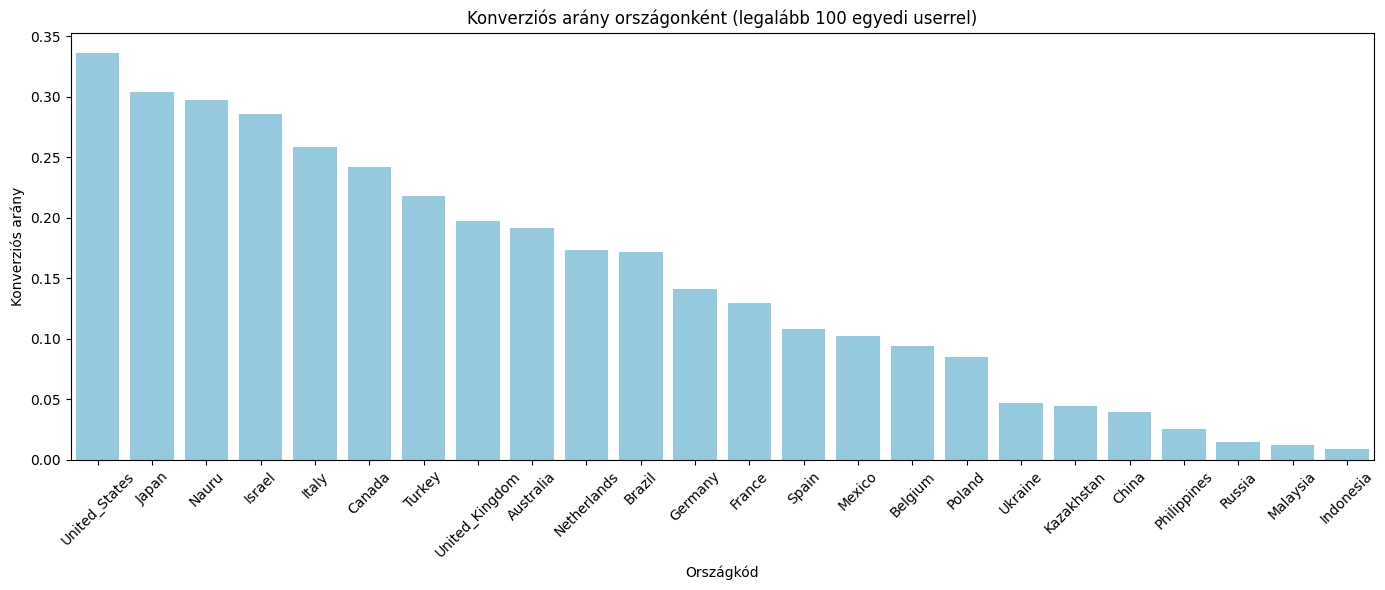

In [114]:
#User szintű DataFrame: minden user csak egyszer szerepel
user_level_df = starterek.groupby('distinct_id').agg({
    'converted': 'max',         # True, ha legalább egyszer konvertált
    'country_name': 'first'     # az első ismert országkód
}).reset_index()

#Országonkénti aggregálás
country_summary = user_level_df.groupby('country_name')['converted'].agg(['sum', 'count']).reset_index()
country_summary['conversion_rate'] = country_summary['sum'] / country_summary['count']

#Csak azok az országok, ahol legalább 100 egyedi user van
filtered_summary = country_summary[country_summary['count'] >= 100].sort_values(by='conversion_rate', ascending=False)

#Ábra: konverziós arány országonként
plt.figure(figsize = (14, 6))
sns.barplot(data = filtered_summary, x='country_name', y='conversion_rate', color='skyblue')
plt.xticks(rotation = 45)
plt.xlabel('Országkód')
plt.ylabel('Konverziós arány')
plt.title('Konverziós arány országonként (legalább 100 egyedi userrel)')
plt.tight_layout()

#Nauru továbbra is itt van, bár mostmár csak olyan userek tartoznak oda, akiknél ez az egyetlen ország szerepel

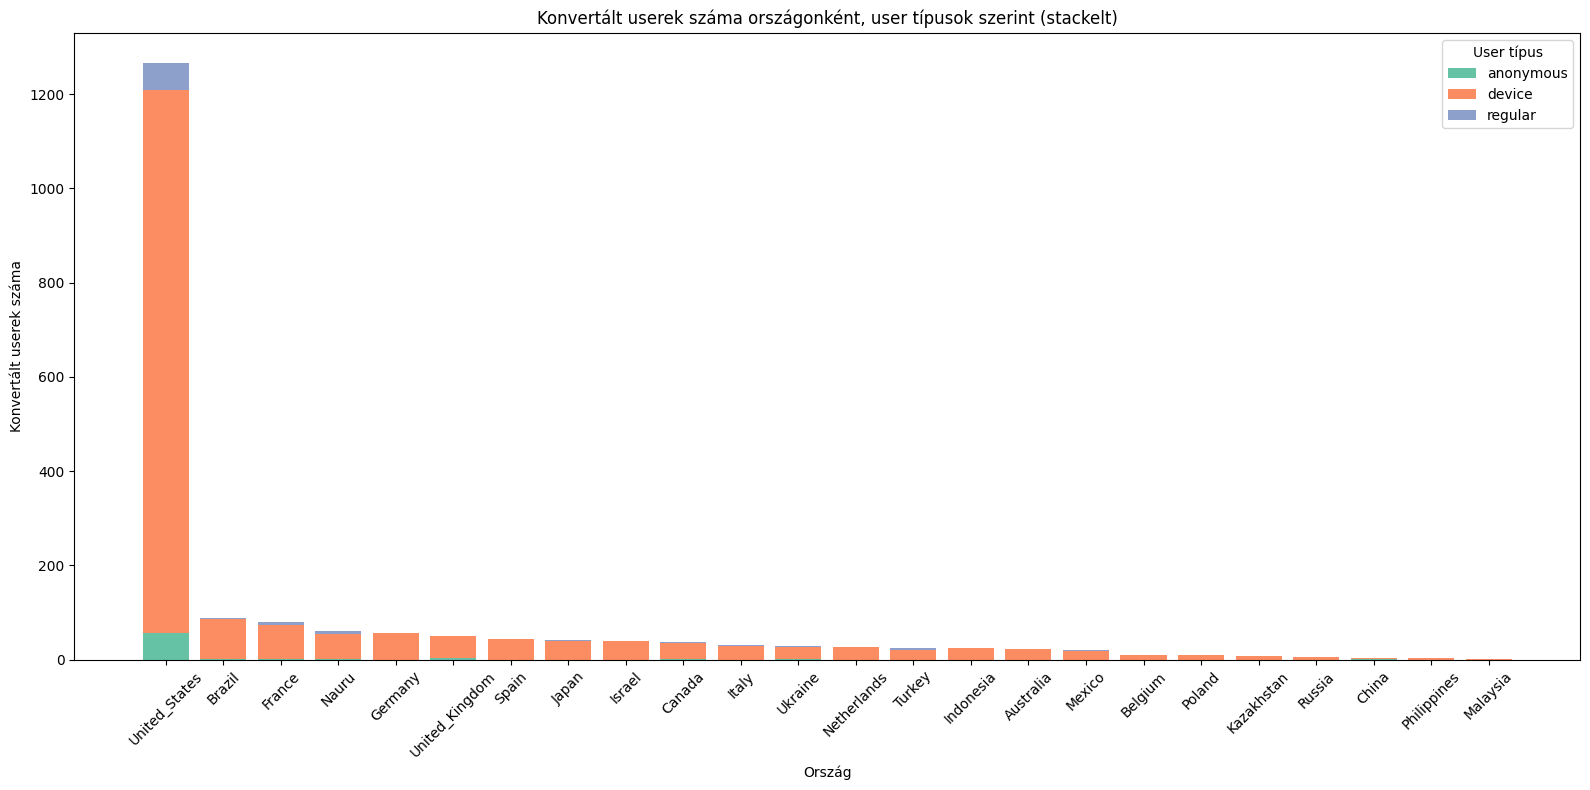

In [115]:
#Konvertált userek száma országonként, user típusok szerint (stackelt)

#User szintű DataFrame
user_level_df = starterek.groupby('distinct_id').agg({
    'converted': 'max',
    'country_name': 'first',
    'user_type': 'first'
}).reset_index()

#Csak konvertált userek kiszűrése
converted_users = user_level_df[user_level_df['converted'] == True]

#Ország és user_type bontás: hány konverzió történt?
#Ez a sor összeszámolja, hány konvertált user volt országonként és usetípusonként, majd ezt egy táblázatos (pivotolt) formába rendezi
grouped = converted_users.groupby(['country_name', 'user_type']).size().unstack(fill_value = 0)

#Csak az országokat tartjuk meg, ahol legalább 100 egyedi user van
user_counts_per_country = user_level_df['country_name'].value_counts()
valid_countries = user_counts_per_country[user_counts_per_country >= 100].index

#Ez a kód megszűri a DataFrame-et úgy, hogy csak azok az országok maradjanak benne, amik szerepelnek a valid_countries listában.
grouped = grouped.loc[grouped.index.isin(valid_countries)]

#Országokat konverziós összeg szerint sorba rendezzük
#Ez kiszámolja minden sor (azaz ország) összes oszlopának (user_type: anonymous, device, regular) összegét.
grouped = grouped.loc[grouped.sum(axis = 1).sort_values(ascending = False).index]

#Ábra: stacked bar chart
plt.figure(figsize = (16, 8))
bottom = None #A bottom mondja meg, milyen magasról induljon a következő oszlopréteg. A bottom = None -> az első oszlopsor 0-ról indul.
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

#Ez a ciklus fogja egymásra pakolni a stackelt oszlopdiagramot
for idx, user_type in enumerate(grouped.columns):
    #Ez rajzolja meg az aktuális user_type oszlopát stackelve.
    plt.bar(grouped.index, grouped[user_type], bottom = bottom, label = user_type, color = colors[idx % len(colors)])
    #A bottomos sor -> 1. Kiválasztja az első idx+1 oszlopot (pl. elsőre csak anonymous, másodikra anonymous+device, stb.).
    #2. Soronként (azaz országonként) összegzi ezeket.
    #3. Az eredmény: minden országnál milyen magas a már eddig kirajzolt oszlop, ahova a következő réteget illeszteni kell.
    bottom = grouped.iloc[:, : idx + 1].sum(axis = 1)

plt.xticks(rotation = 45)
plt.xlabel('Ország')
plt.ylabel('Konvertált userek száma')
plt.title('Konvertált userek száma országonként, user típusok szerint (stackelt)')
plt.legend(title='User típus')
plt.tight_layout()


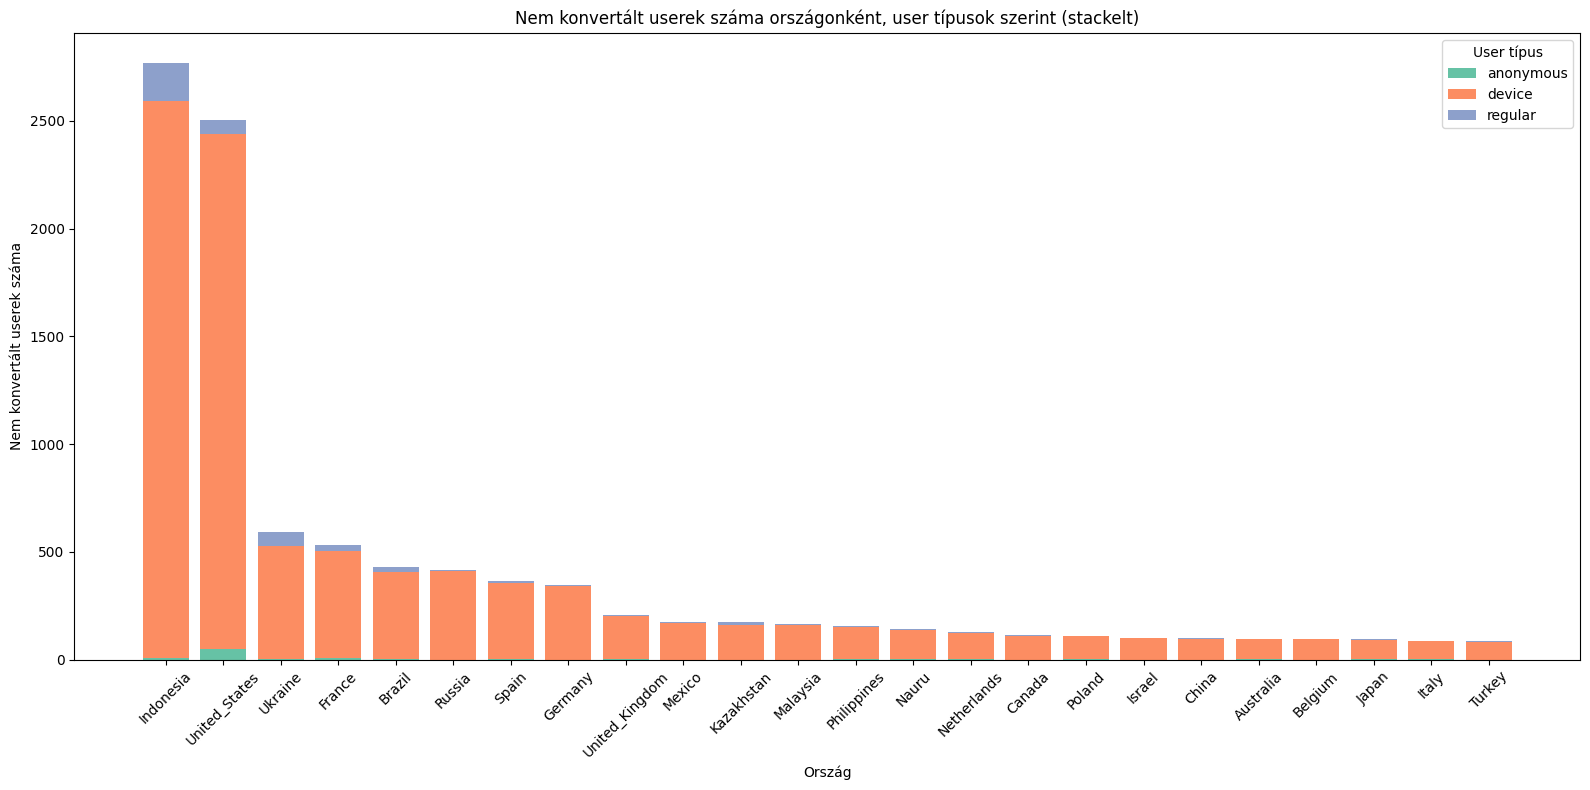

In [116]:
#NEM konvertált userek száma országonként, user típusok szerint (stackelt)

#User szintű DataFrame
user_level_df = starterek.groupby('distinct_id').agg({
    'converted': 'max',
    'country_name': 'first',
    'user_type': 'first'
}).reset_index()

#Csak konvertált userek kiszűrése
converted_users = user_level_df[user_level_df['converted'] == False]

#Ország és user_type bontás: hány konverzió történt?
grouped = converted_users.groupby(['country_name', 'user_type']).size().unstack(fill_value = 0)

#Csak az országokat tartjuk meg, ahol legalább 100 egyedi user van
user_counts_per_country = user_level_df['country_name'].value_counts()
valid_countries = user_counts_per_country[user_counts_per_country >= 100].index

#Ez a kód megszűri a DataFrame-et úgy, hogy csak azok az országok maradjanak benne, amik szerepelnek a valid_countries listában.
grouped = grouped.loc[grouped.index.isin(valid_countries)]

#Országokat konverziós összeg szerint sorba rendezzük (opcionális, de szép - tisztítja vizuálisan)
#Ez kiszámolja minden sor (azaz ország) összes oszlopának (user_type: anonymous, device, regular) összegét.
grouped = grouped.loc[grouped.sum(axis = 1).sort_values(ascending = False).index]

#Ábra: stacked bar chart
plt.figure(figsize = (16, 8))
bottom = None #A bottom mondja meg, milyen magasról induljon a következő oszlopréteg. A bottom = None -> az első oszlopsor 0-ról indul.
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  #Választható színek

#Ez a ciklus fogja egymásra pakolni a stackelt oszlopdiagramot.
for idx, user_type in enumerate(grouped.columns):
    #Ez rajzolja meg az aktuális user_type oszlopát stackelve.
    plt.bar(grouped.index, grouped[user_type], bottom = bottom, label = user_type, color = colors[idx % len(colors)])
    #A bottomos sor -> 1. Kiválasztja az első idx+1 oszlopot (pl. elsőre csak anonymous, másodikra anonymous+device, stb.).
    #2. Soronként (azaz országonként) összegzi ezeket.
    #3. Az eredmény: minden országnál milyen magas a már eddig kirajzolt oszlop, ahova a következő réteget illeszteni kell.
    bottom = grouped.iloc[:, : idx + 1].sum(axis = 1)

plt.xticks(rotation = 45)
plt.xlabel('Ország')
plt.ylabel('Nem konvertált userek száma')
plt.title('Nem konvertált userek száma országonként, user típusok szerint (stackelt)')
plt.legend(title='User típus')
plt.tight_layout()


In [117]:
#Bár a konverzió az anonymous userek körében a legmagasabb, valójában a leginkább számottevő típus a device user!!
starterek[starterek['converted'] == True].groupby('user_type')['distinct_id'].nunique()

user_type
anonymous      71
device       2044
regular        91
Name: distinct_id, dtype: int64

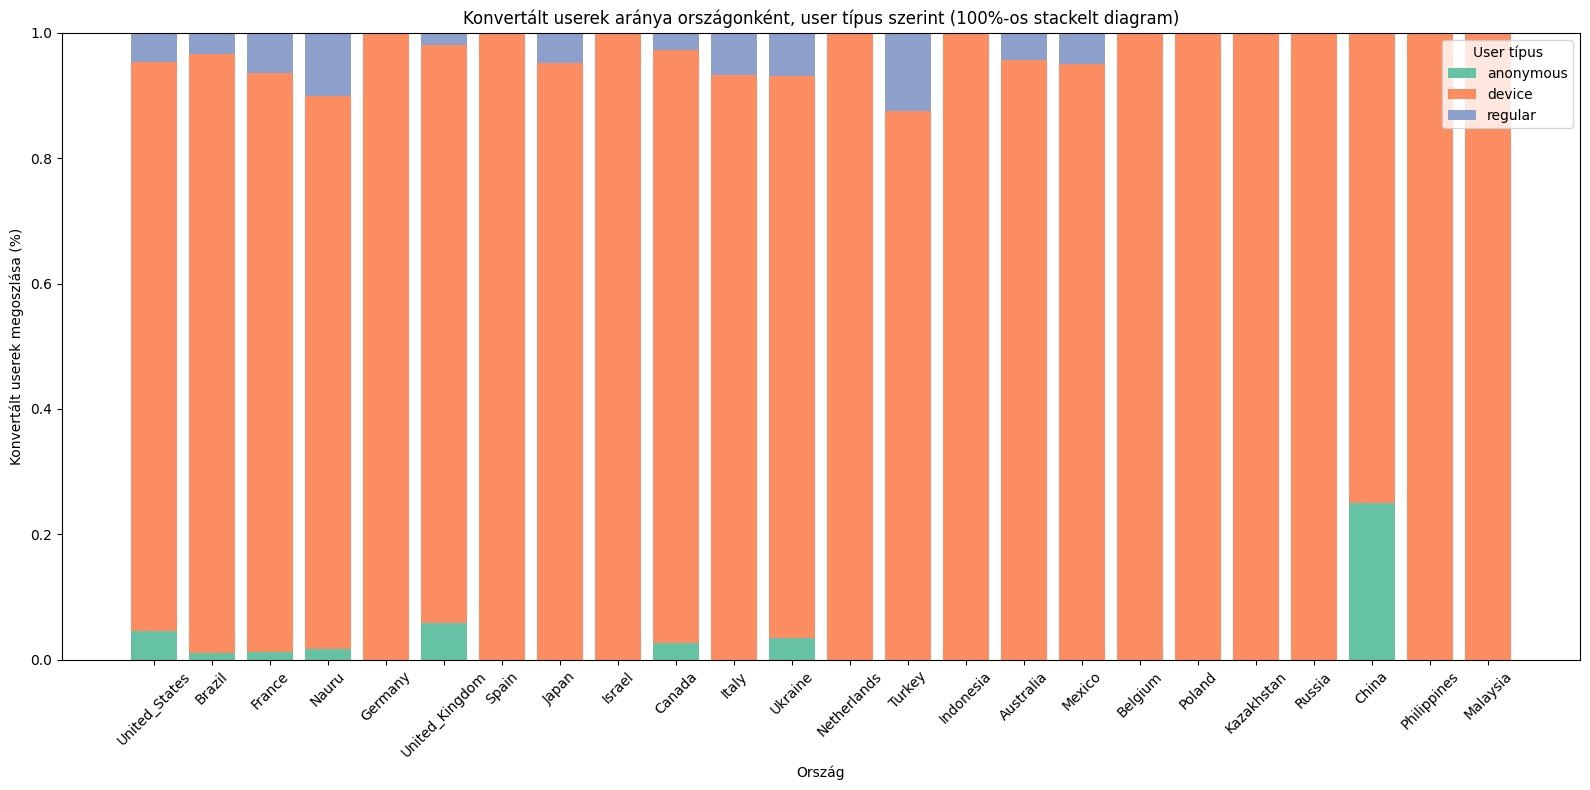

In [118]:
#Konvertált userek aránya országonként, user típus szerint (100%-os stackelt diagram)

#User szintű aggregálás
user_level_df = starterek.groupby('distinct_id').agg({
    'converted': 'max',
    'country_name': 'first',
    'user_type': 'first'
}).reset_index()

#Csak konvertált userek kiszűrése
converted_users = user_level_df[user_level_df['converted'] == True]

#Ország + user_type bontás: konvertált userek száma
grouped = converted_users.groupby(['country_name', 'user_type']).size().unstack(fill_value = 0)

#Csak azokat az országokat tartjuk meg, ahol legalább 100 user van
user_counts_per_country = user_level_df['country_name'].value_counts()
valid_countries = user_counts_per_country[user_counts_per_country >= 100].index
grouped = grouped.loc[grouped.index.isin(valid_countries)]

#Arányosítás: minden sorban a 3 user_type arányát számoljuk
normalized = grouped.div(grouped.sum(axis = 1), axis = 0)

#Rendezés a teljes konvertált szám alapján
grouped_total = grouped.sum(axis = 1) #Országonként összeadja a usertípusok számait
normalized = normalized.loc[grouped_total.sort_values(ascending = False).index]

#Ábra: normalizált stacked bar chart
plt.figure(figsize = (16, 8))
bottom = None
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

for idx, user_type in enumerate(normalized.columns):
    plt.bar(normalized.index, normalized[user_type], bottom = bottom, label = user_type, color = colors[idx % len(colors)])
    if bottom is None:
        bottom = normalized[user_type]
    else:
        bottom += normalized[user_type]

plt.xticks(rotation = 45)
plt.xlabel('Ország')
plt.ylabel('Konvertált userek megoszlása (%)')
plt.title('Konvertált userek aránya országonként, user típus szerint (100%-os stackelt diagram)')
plt.legend(title = 'User típus')
plt.tight_layout()


In [119]:
#EGYESÜLT ÁLLAMOK VS. INDONÉZIA ESEMÉNYELOSZLÁS

In [120]:
#Külön változók létrehozása az amerikai és az indonéz eseményeknek
#A normalize=True miatt minden érték arány lesz (0–1), nem darabszám - milyen arányban fordultak elő az egyes események?
us_events = starterek[starterek['country_code'] == 'US']['event'].value_counts(normalize = True)
id_events = starterek[starterek['country_code'] == 'ID']['event'].value_counts(normalize = True)

In [121]:
#Két ország eseményeinek összehasonlítása

#Kétsoros DF a két országgal, NaN-ok 0-ra cserélésével
event_compare = pd.DataFrame({
    'US': us_events,
    'ID': id_events
}).fillna(0)

#Rendezem az amerikai eseményarány szerint
event_compare = event_compare.sort_values(by = 'US', ascending = False)

event_compare.head()

,US,ID
event,,
app_close,0.083333,0.096559
app_open,0.073696,0.089667
updateScript,0.057023,0.043069
$ae_session,0.054957,0.058125
Homescreen,0.048531,0.043374


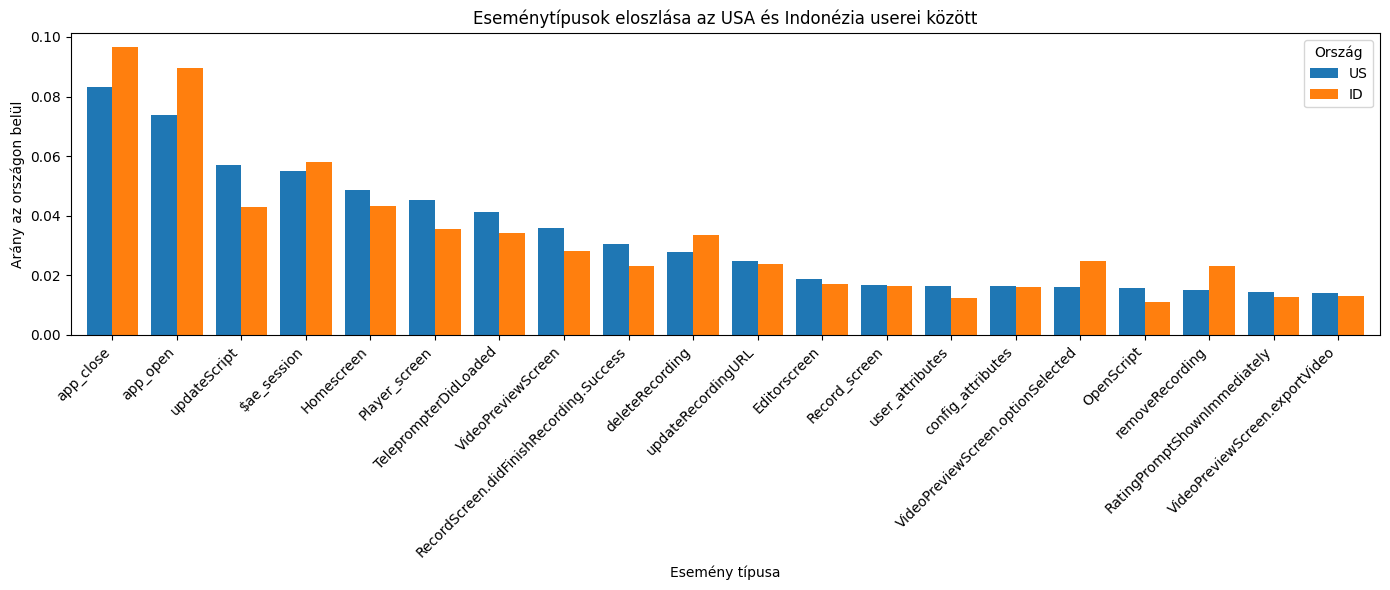

In [122]:
#Összehasonlító barplot -> Érdekes, hogy az app_close és az app_open aránya is nagyobb Indonéziában, bár nem annyira sokkal

#Csak a 15 leggyakoribb esemény az USA-ban
top_events = event_compare.head(20).index
subset = event_compare.loc[top_events]

subset.plot(kind = 'bar', figsize = (14, 6), width = 0.8)
plt.title('Eseménytípusok eloszlása az USA és Indonézia userei között')
plt.ylabel('Arány az országon belül')
plt.xlabel('Esemény típusa')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Ország')
plt.tight_layout()


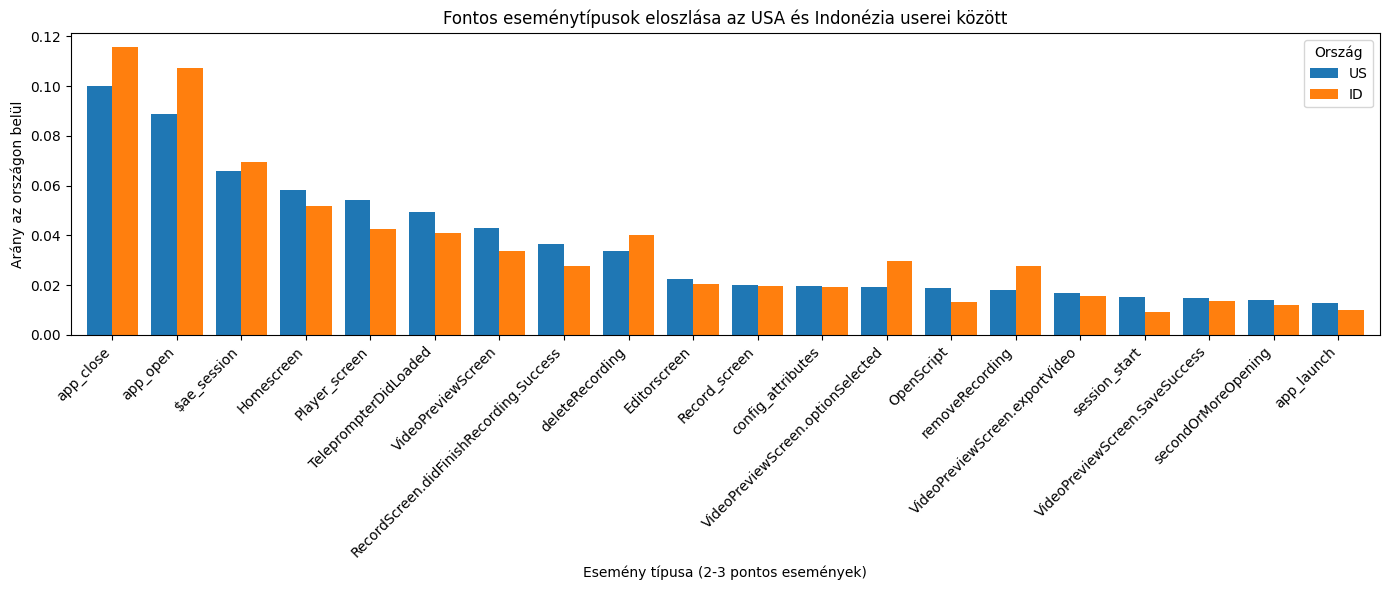

In [123]:
#Fenti ábra megismétlése de csak a 2-3 ponttal súlyozott eseményekkel

fontos_eventek = starterek[starterek['sulypont'].isin([2, 3])]

#Amerikai és indonéz adatok csak a fontos eventekkel
us_events = fontos_eventek[fontos_eventek['country_code'] == 'US']['event'].value_counts(normalize = True)
id_events = fontos_eventek[fontos_eventek['country_code'] == 'ID']['event'].value_counts(normalize = True)

#Kétsoros DF a két országgal, NaN-ok 0-ra cserélésével
event_compare = pd.DataFrame({
    'US': us_events,
    'ID': id_events
}).fillna(0)

#Rendezem az amerikai eseményarány szerint
event_compare = event_compare.sort_values(by = 'US', ascending = False)

#Csak a 15 leggyakoribb esemény az USA-ban
top_events = event_compare.head(20).index
subset = event_compare.loc[top_events]

subset.plot(kind = 'bar', figsize = (14, 6), width = 0.8)
plt.title('Fontos eseménytípusok eloszlása az USA és Indonézia userei között')
plt.ylabel('Arány az országon belül')
plt.xlabel('Esemény típusa (2-3 pontos események)')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Ország')
plt.tight_layout()


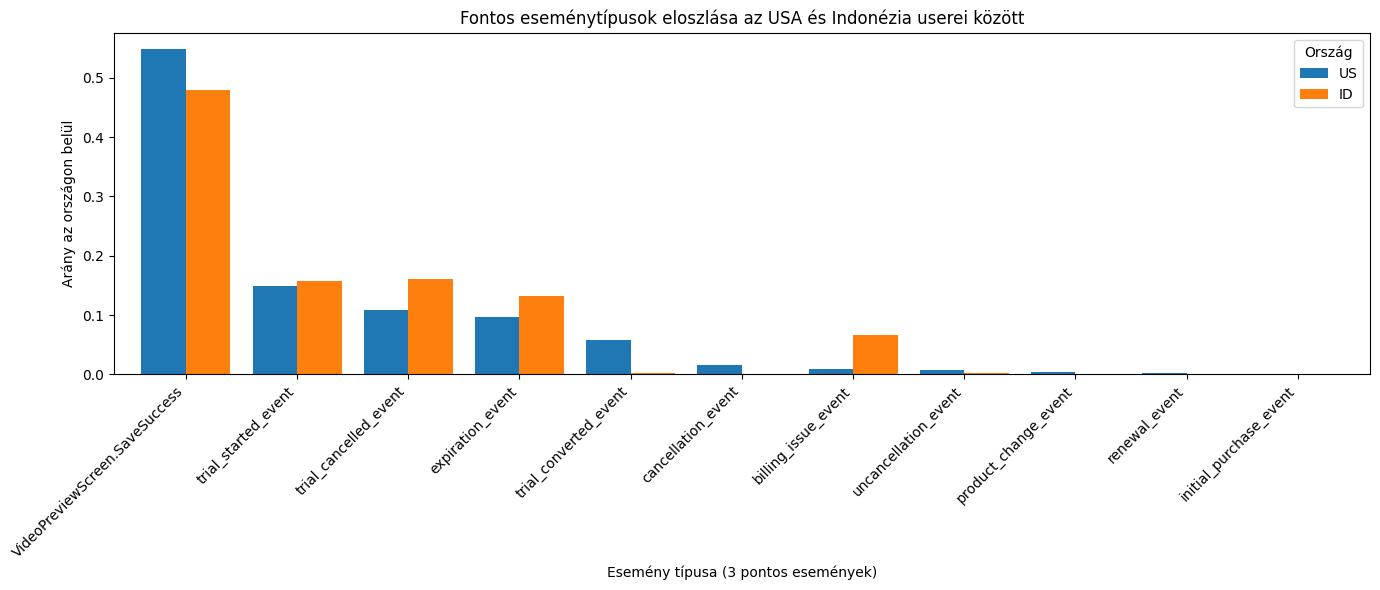

In [124]:
#Fenti ábra megismétlése de csak a 3 ponttal súlyozott eseményekkel

fontos_eventek = starterek[starterek['sulypont'] == 3]

#Amerikai és indonéz adatok csak a fontos eventekkel
us_events = fontos_eventek[fontos_eventek['country_code'] == 'US']['event'].value_counts(normalize = True)
id_events = fontos_eventek[fontos_eventek['country_code'] == 'ID']['event'].value_counts(normalize = True)

#Kétsoros DF a két országgal, NaN-ok 0-ra cserélésével
event_compare = pd.DataFrame({
    'US': us_events,
    'ID': id_events
}).fillna(0)

#Rendezem az amerikai eseményarány szerint
event_compare = event_compare.sort_values(by = 'US', ascending = False)

#Csak a 15 leggyakoribb esemény az USA-ban
top_events = event_compare.index
subset = event_compare.loc[top_events]

subset.plot(kind = 'bar', figsize = (14, 6), width = 0.8)
plt.title('Fontos eseménytípusok eloszlása az USA és Indonézia userei között')
plt.ylabel('Arány az országon belül')
plt.xlabel('Esemény típusa (3 pontos események)')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Ország')
plt.tight_layout()


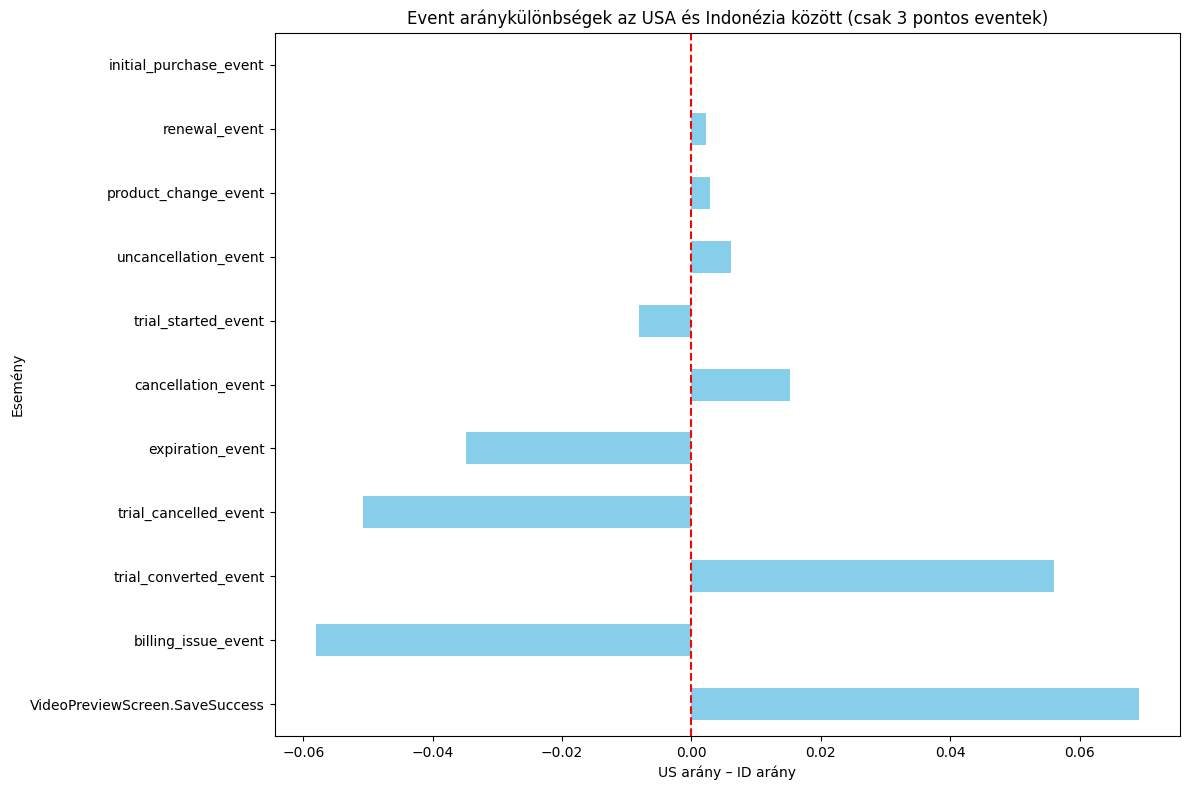

In [125]:
#Az utolsó adatok alapján különbség kiszámolása és ábrázolása
#Mely események aránya a legnagyobb pozitív / negatív különbséget mutatja a két ország között?

event_compare['difference'] = event_compare['US'] - event_compare['ID']

# Rendezés a különbség abszolút értéke szerint (legtöbbet eltérő eventek előre)
event_compare_sorted = event_compare.reindex(
    event_compare['difference'].abs().sort_values(ascending = False).index
)

# Ábra: vízszintes bar chart
plt.figure(figsize = (12, 8))
event_compare_sorted['difference'].head(20).plot(kind = 'barh', color = 'skyblue')
plt.axvline(0, color = 'red', linestyle = '--')
plt.title('Event aránykülönbségek az USA és Indonézia között (csak 3 pontos eventek)')
plt.xlabel('US arány – ID arány')
plt.ylabel('Esemény')
plt.tight_layout()

#Tehát Indonézia vezet expiration_eventtel, cancelled_eventtel és billing_issue_eventtel.

In [126]:
event_compare_sorted
#Szóval itt is látszik, hogy ahol a jobboldalon nyúlik ki, ott az USA 'vezet', ahol a baloldalon, ott Indonézia

,US,ID,difference
event,,,
VideoPreviewScreen.SaveSuccess,0.548344,0.479173,0.069171
billing_issue_event,0.009041,0.067120,-0.058079
trial_converted_event,0.058431,0.002305,0.056126
trial_cancelled_event,0.109242,0.159987,-0.050744
expiration_event,0.096688,0.131486,-0.034798
cancellation_event,0.015792,0.000618,0.015174
trial_started_event,0.148999,0.157063,-0.008064
uncancellation_event,0.007620,0.001462,0.006158
product_change_event,0.003395,0.000562,0.002833


In [127]:
#FUNNEL

<Figure size 1800x1200 with 0 Axes>

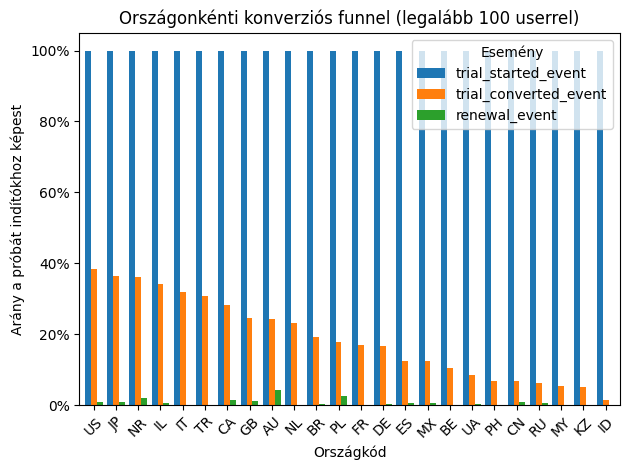

In [128]:
#A matplotlib.ticker modul lehetővé teszi, hogy a tengelyeken (x, y) megjelenő számértékeket más formában jelenítsük meg, pl 25% a 0,25 helyett.
import matplotlib.ticker as mtick

#Csak a funnelhez szükséges események
funnel_events = [
    'trial_started_event',
    'trial_converted_event',
    'renewal_event'
]

#Szűrés a releváns eseményekre
funnel_df = starterek[starterek['event'].isin(funnel_events)]

#Országok, ahol legalább 100 user van
valid_countries = (
    starterek.groupby('country_code')['distinct_id'].nunique()
    .loc[lambda x: x >= 100]
    .index
)

funnel_df = funnel_df[funnel_df['country_code'].isin(valid_countries)]

#Egyedi userek száma eseményenként, országonként
funnel_counts = (
    funnel_df.groupby(['country_code', 'event'])['distinct_id']
    .nunique().unstack().fillna(0)
)

#Arányosítás a 'trial_started_event'-hez képest
#Arányt számolni minden eseménytípusra úgy, hogy az adott országban hány user indította el a próbaverziót (trial_started_event) legyen az alap (a nevező).
funnel_ratios = funnel_counts.div(funnel_counts['trial_started_event'], axis = 0)

#Rendezzük a táblát a konverziós arány szerint
funnel_ratios = funnel_ratios.sort_values(by = 'trial_converted_event', ascending = False)

#Ábra: konverziós funnel országonként
plt.figure(figsize = (18, 12))
funnel_ratios[['trial_started_event', 'trial_converted_event', 'renewal_event']].plot(
    kind = 'bar', width = 0.8
)
plt.title('Országonkénti konverziós funnel (legalább 100 userrel)')
plt.ylabel('Arány a próbát indítókhoz képest')
plt.xlabel('Országkód')
plt.xticks(rotation = 45)
plt.legend(title = 'Esemény')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()


In [129]:
#EVENT ARÁNYKÜLÖNBSÉG A KONVERTÁLÓK ÉS A NEM KONVERTÁLÓK KÖZÖTT

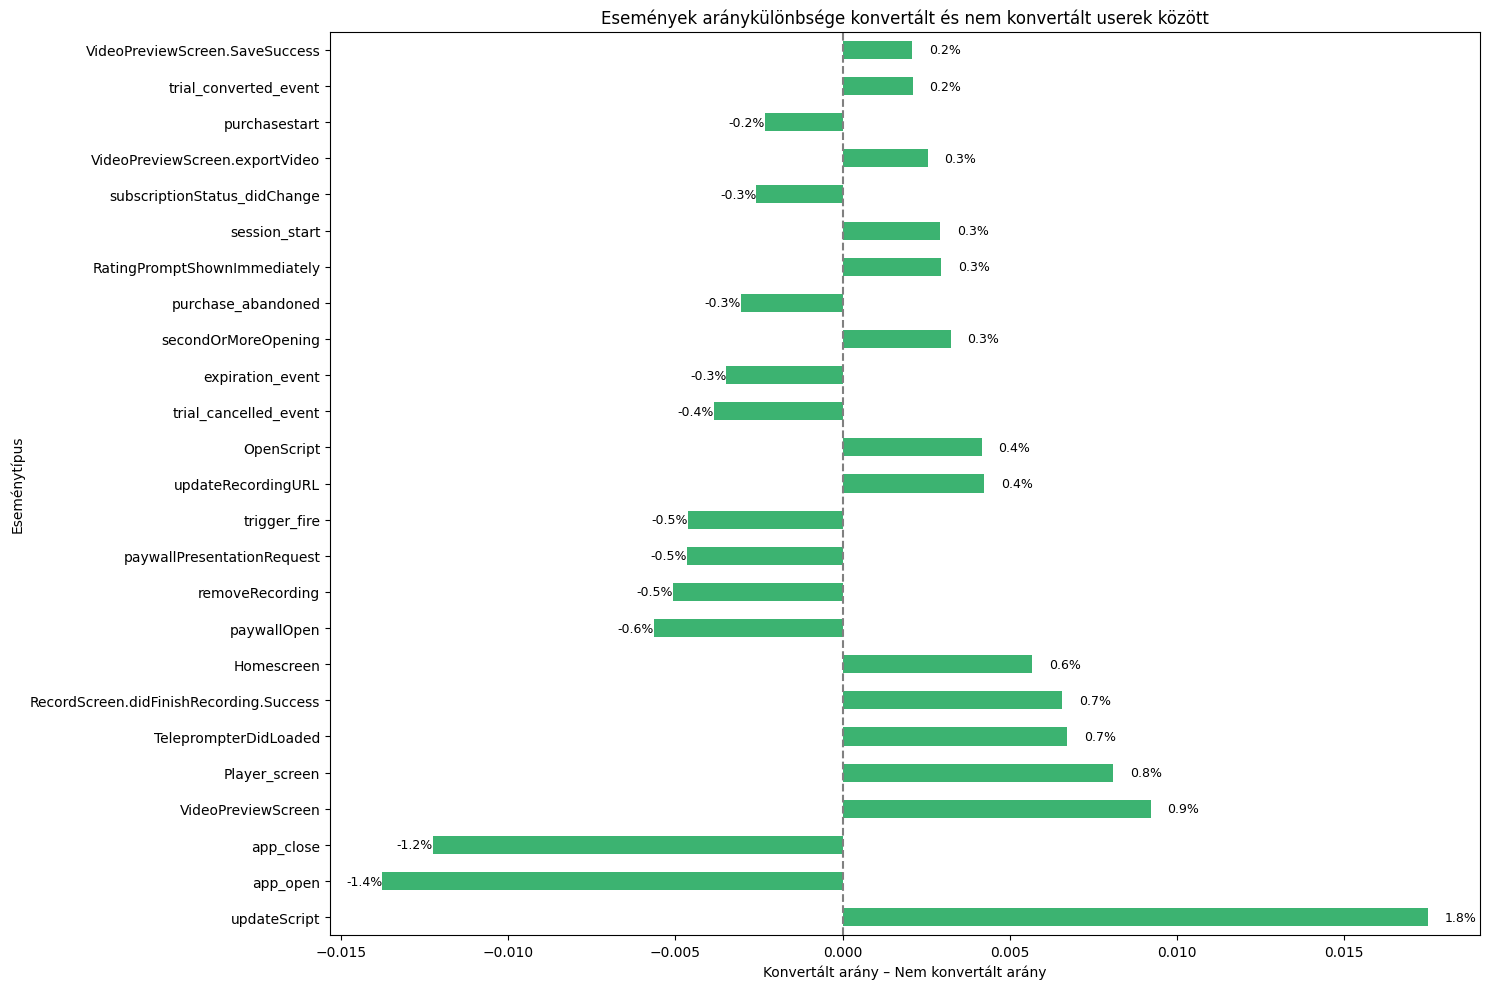

In [130]:
#Arányszámítás konvertált és nem konvertált userekre -> ez még csak két Series
#Ezekkel a változókkal számolom meg, melyik eseménytípus milyen arányban fordul elő a két ügyféltípus esetében.
#Abszolút szám helyett arányokat kapunk a normalize = True argumentum nyomán.
converted_event_dist = starterek[starterek['converted'] == True]['event'].value_counts(normalize = True)
nonconverted_event_dist = starterek[starterek['converted'] == False]['event'].value_counts(normalize = True)

#Összefésült DataFrame a fenti két Seriesből.
event_compare_conv = pd.DataFrame({
    'converted': converted_event_dist,
    'non_converted': nonconverted_event_dist
}).fillna(0)

#Különbség kiszámítása -> Az eredetileg a Series-ekben számol érétkek kivonása egymásból, így kapjuk meg az aránykülönbséget.
event_compare_conv['difference'] = event_compare_conv['converted'] - event_compare_conv['non_converted']

#Legnagyobb különbségek kiválasztása.
event_compare_sorted = event_compare_conv.reindex(
    event_compare_conv['difference'].abs().sort_values(ascending=False).index
)

#Csak a top 25 event kiválasztása.
top25 = event_compare_sorted['difference'].head(25)

#Ábra: vízszintes bar chart százalékos felirattal.
plt.figure(figsize = (15, 10))
bars = top25.plot(kind = 'barh', color = 'mediumseagreen')
plt.axvline(0, color = 'gray', linestyle = '--')
plt.title('Események aránykülönbsége konvertált és nem konvertált userek között')
plt.xlabel('Konvertált arány – Nem konvertált arány')
plt.ylabel('Eseménytípus')

#Százalékok kiírása a barok végére.
#A ciklus végigmegy minden oszlopon és a végére kiírja a különbséget százalékosan.
for i, (index, value) in enumerate(top25.items()):
    plt.text(
        x = value + (0.0005 if value >= 0 else -0.000),  # kis eltolás jobbra/balra
        y = i,
        s = f'{value * 100:.1f}%', #Formázás, pl. 0,1234 -> 12,3%.
        va = 'center',
        ha = 'left' if value >= 0 else 'right',
        fontsize = 9
    )

plt.tight_layout()

#FONTOS! Pozitív érték -> az esemény gyakoribb a konvertált userek körében. Negatív érték -> az esemény a nem konvertáltak körében gyakoribb.

In [131]:
#Események aránykülönbsége konvertált és nem konvertált userek között, top 25 esemény (a plusz a konvertáltak előnye)
top25

event
updateScript                               0.017518
app_open                                  -0.013773
app_close                                 -0.012255
VideoPreviewScreen                         0.009227
Player_screen                              0.008095
TeleprompterDidLoaded                      0.006734
RecordScreen.didFinishRecording.Success    0.006580
Homescreen                                 0.005685
paywallOpen                               -0.005639
removeRecording                           -0.005067
paywallPresentationRequest                -0.004656
trigger_fire                              -0.004636
updateRecordingURL                         0.004240
OpenScript                                 0.004166
trial_cancelled_event                     -0.003858
expiration_event                          -0.003479
secondOrMoreOpening                        0.003237
purchase_abandoned                        -0.003041
RatingPromptShownImmediately               0.002948
sessio

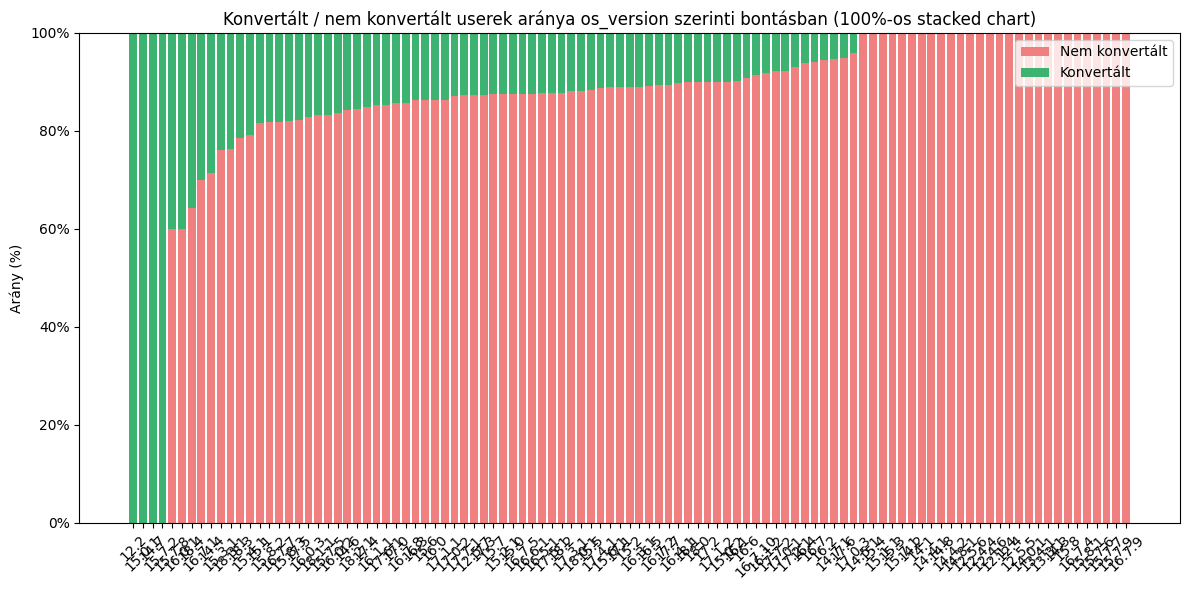

In [132]:
#100%-OS STACKED BARCHART KONVERZIÓS ARÁNYRÓL OS_VERSION SZERINT

#Egyedi userek megszámolása konverziós státusz és os_version alapján
os_version_grouped = starterek.groupby(['os_version', 'converted'])['distinct_id'].nunique().unstack().fillna(0)

#Arányosítás -> minden os_version-ön belül a sorösszeg 100%
os_version_normalized = os_version_grouped.div(os_version_grouped.sum(axis = 1), axis = 0)

#Adatok rendezése a konvertált arányok alapján
os_version_normalized = os_version_normalized.loc[os_version_normalized[True].sort_values(ascending = False).index]

#Chart készítése
plt.figure(figsize = (12, 6))
bottom = None #Ez adja meg melyik értéktül induljon el a következő réteg stackelt oszlopok esetében. bottom = None -> Az oszlop alja a 0.
colors = ['lightcoral', 'mediumseagreen'] #Nem konvertált / konvertált userek színei.

#Magának az oszlopdiagramnak a létrehozása.
for idx, converted in enumerate(os_version_normalized.columns):
    plt.bar(os_version_normalized.index,
            os_version_normalized[converted],
            bottom = bottom,
            label = 'Konvertált' if converted else 'Nem konvertált',
            color = colors[idx])
    bottom  = os_version_normalized.iloc[:, : idx + 1].sum(axis = 1)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0)) #Százalékos értékek megjelenítése az y tengelyen.
plt.xticks(rotation = 45)
plt.ylabel('Arány (%)')
plt.title('Konvertált / nem konvertált userek aránya os_version szerinti bontásban (100%-os stacked chart)')
plt.legend()
plt.tight_layout()


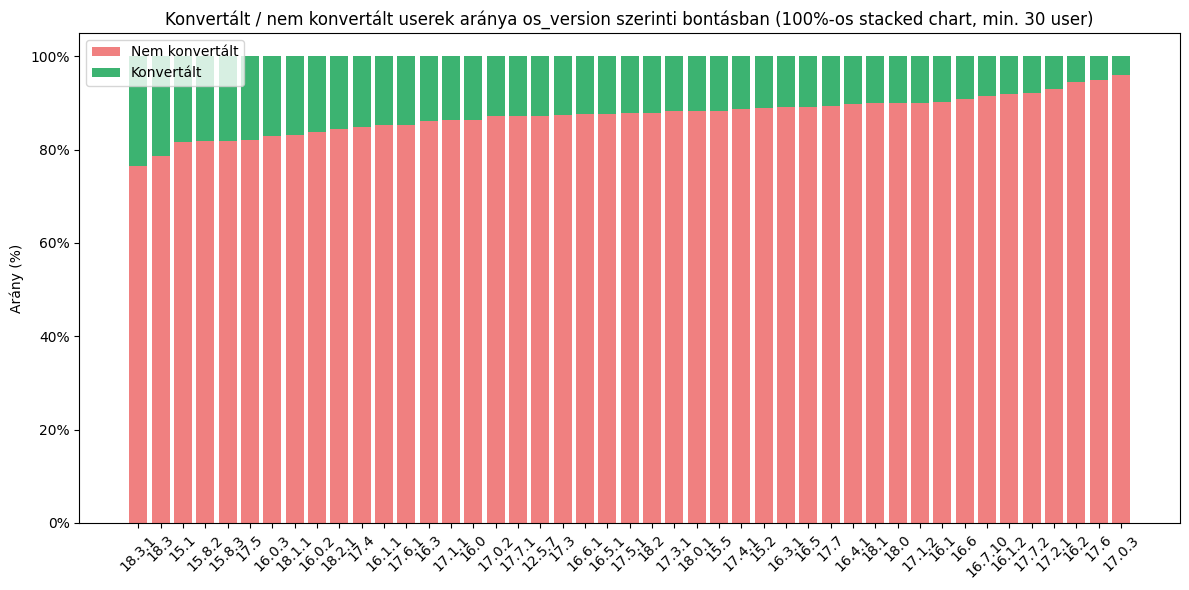

In [133]:
#A fenti példán jól látható, hogy a kevés userszámú verziók miatt vannak 100% ilyen vagy olyan értékek.
#A fentiek miatt rászűrök azokra a verziószámokra, amiknél legalább 30 egyedi user van.

#Egyedi userek megszámolása konverziós státusz és os_version alapján
os_version_grouped = starterek.groupby(['os_version', 'converted'])['distinct_id'].nunique().unstack().fillna(0)

#Teljes felhasználószám os_version szinten
os_version_total = os_version_grouped.sum(axis = 1)

#Azon indexek (verziószámok) kivétele, amelyek summája legalább 30
valid_os_versions = os_version_total[os_version_total >= 30].index

#Szűrés a fenti verziókra
os_version_grouped = os_version_grouped.loc[valid_os_versions]

#Arányosítás -> minden os_version-ön belül a sorösszeg 100%
os_version_normalized = os_version_grouped.div(os_version_grouped.sum(axis = 1), axis = 0)

#Adatok rendezése a konvertált arányok alapján
os_version_normalized = os_version_normalized.loc[os_version_normalized[True].sort_values(ascending = False).index]

#Chart készítése
plt.figure(figsize = (12, 6))
bottom = None
colors = ['lightcoral', 'mediumseagreen']

#Magának az oszlopdiagramnak a létrehozása.
for idx, converted in enumerate(os_version_normalized.columns):
    plt.bar(os_version_normalized.index,
            os_version_normalized[converted],
            bottom = bottom,
            label = 'Konvertált' if converted else 'Nem konvertált',
            color = colors[idx])
    bottom  = os_version_normalized.iloc[:, : idx + 1].sum(axis = 1)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0)) #Százalékos értékek megjelenítése az y tengelyen.
plt.xticks(rotation = 45)
plt.ylabel('Arány (%)')
plt.title('Konvertált / nem konvertált userek aránya os_version szerinti bontásban (100%-os stacked chart, min. 30 user)')
plt.legend()
plt.tight_layout()


In [134]:
#Ezeket az értékeket jeleníti meg a fenti chart
#print(os_version_normalized.to_string())

converted      False     True 
os_version                    
18.3.1      0.763973  0.236027
18.3        0.786186  0.213814
15.1        0.815789  0.184211
15.8.2      0.818182  0.181818
15.8.3      0.819149  0.180851
17.5        0.821429  0.178571
16.0.3      0.828571  0.171429
18.1.1      0.832036  0.167964
16.0.2      0.837209  0.162791
18.2.1      0.844741  0.155259
17.4        0.847826  0.152174
16.1.1      0.852381  0.147619
17.6.1      0.853571  0.146429
16.3        0.862069  0.137931
17.1.1      0.863636  0.136364
16.0        0.863636  0.136364
17.0.2      0.871795  0.128205
17.7.1      0.872483  0.127517
12.5.7      0.872727  0.127273
17.3        0.873016  0.126984
16.6.1      0.876068  0.123932
16.5.1      0.876289  0.123711
17.5.1      0.877637  0.122363
18.2        0.877678  0.122322
17.3.1      0.882051  0.117949
18.0.1      0.882301  0.117699
15.5        0.882353  0.117647
17.4.1      0.887828  0.112172
15.2        0.888889  0.111111
16.3.1      0.890110  0.109890
16.5    

In [135]:
#FEATURE ENGINEERING

In [136]:
#KONVERTÁLÓK ESETÉN A TRIAL_CONVERTED_EVENT UTÁNI ESEMÉNYEK KISZŰRÉSE

converters = starterek[starterek['converted'] == True]

#Első konverziós időpontok meghatározása userenként
conv_times = (
    converters[converters['event'] == 'trial_converted_event']
    .groupby('distinct_id')['event_time']
    .min()
    .rename('first_conv_time')
)

#A fenti blokkból kapott Series-t hozzákötjük az eredeti táblához.
converters = converters.merge(conv_times, on = 'distinct_id', how = 'left')

#Az új 'first_conv_time' oszlop segítségével levágjuk az első konverzió utáni eventeket.
mask = (
    converters['event_time'] <= converters['first_conv_time']
)
converters_cut = converters[mask].copy()

#Nem konvertált userek -> tőlük jön a teljes eseménysor, szóval csak sima szűrés kell
non_converters = starterek[starterek['converted'] == False].copy()

#A non_converters is kap egy 'first_conv_time' oszlopot NaN értékekkel, hogy ne legyen gond a ragasztásnál.
non_converters['first_conv_time'] = pd.NaT

#Összefűzés
starterek_cut = pd.concat([converters_cut, non_converters], ignore_index = True)

#Az új tábla újrarendezése user és idő szerint, valamint az index resetelése
starterek_cut = (
    starterek_cut
    .sort_values(['distinct_id', 'event_time'])
    .reset_index(drop = True)
)


In [137]:
#A first_conv_time már nem kell szerintem, eldobom
starterek_cut = starterek_cut.drop(columns = ['first_conv_time'])


In [138]:
#DF létrehozása, amely nem tartalmazza a trial... eseményeket.
#A ^ azt jelenti, hogy a string elején álljon.
not_trial_events = starterek_cut[~starterek_cut['event'].str.contains('^trial_')].copy()


In [139]:
#ESEMÉNYEK MEGSZÁMLÁLÁSA

#Mindegy egyes user_id kap egy oszlopot az összes esemény számával és az egyedi események számával
event_count = (
    starterek_cut.groupby('distinct_id')['event']
    .agg(total_event_count = 'count', unique_event_count = 'nunique')
    .reset_index() #Enélkül a végeredményben a distinct_id csak index lenne! A .reset_index()-szel viszont oszlop!
)


In [140]:
event_count.head()

,distinct_id,total_event_count,unique_event_count
0,$RCAnonymousID:user_00700112690657,42,26
1,$RCAnonymousID:user_00925483708199,119,54
2,$RCAnonymousID:user_01437385556700,75,42
3,$RCAnonymousID:user_02314471583726,150,48
4,$RCAnonymousID:user_02513418384456,177,52


In [141]:
#AKTIVITÁSI IDŐSKÁLÁK

#A 'date' oszlop létrehozása már korábban megtörtént az 'event_time' oszlopból:
#starterek['date'] = starterek['event_time'].dt.date

#A 'date' oszlop alapján megnézzük, hány egyedi napon volt aktivitása egy-egy usernek.
active_days = (
    not_trial_events.groupby('distinct_id')['date']
    .nunique()
    .reset_index(name = 'active_days_count')
)

#First-to-last napok megállapítása
first_last = (
    not_trial_events.groupby('distinct_id')['event_time']
    .agg(first_time = 'min', last_time = 'max') #Min-max függvényekkel a legelső és legutolsó event_time-ok meghatározása új oszlopokban.
    .reset_index()
)

#Csinálok egy új oszlopot, amely tartalmazza, hány nap telik el az első és az utolsó event_time között.
first_last['first_to_last_days'] = (
    (first_last['last_time'] - first_last['first_time']) #Sima kivonás.
    .dt.days
)

#Inter-event idők (LEAD/LAG)
not_trial_events['prev_time'] = not_trial_events.groupby('distinct_id')['event_time'].shift(1)

not_trial_events['lag_sec'] = (
    (not_trial_events['event_time'] - not_trial_events['prev_time'])
    .dt.total_seconds()
)

lag_feats = (
    not_trial_events.groupby('distinct_id')['lag_sec']
    .agg(lag_mean_sec = 'mean', lag_median_sec = 'median',
         lag_min_sec = 'min', lag_max_sec = 'max')
    .reset_index()
)

#Trial-specific aggregációk (pl. trial eventek száma, trial átlagos hossza stb.)
#trial_df = starterek[starterek['event'].str.contains('trial_')]
#trial_feats = (
    #trial_df.groupby('distinct_id')
    #.agg(trial_start_count = ('event', 'count'),
     #    avg_trial_length_days = ('event_time',
      #       lambda x: x.diff().dt.days.mean()
       #  ))
   # .reset_index()
#)

#Userszinten megállapítjuk, hogy konvertált-e vagy sem?
conv = (
    starterek_cut.groupby('distinct_id')['converted']
    .any() #.any() azt csinálja: ha bármelyik érték igaz (True) a csoportban, akkor az eredmény True; ha mind hamis (False), akkor False.
    .reset_index(name = 'converted')
)

#Usertípusok meghatározása
user_type_df = starterek_cut[['distinct_id']].drop_duplicates() #Összes user_id kiválasztása, duplikátumok eldobása.
#Usertípusok meghatározása prefix alapján
user_type_df['user_type'] = np.where(
    user_type_df['distinct_id'].str.startswith('$RCAnonymousID:'), 'anonymous',
    np.where(
        user_type_df['distinct_id'].str.startswith('$device:'), 'device',
        'regular')
)

#Userszinten megállapítani, hogy vpn user volt-e?
vpn_users = (
    starterek_cut.groupby('distinct_id')['vpn_user']
    .any()
    .reset_index(name = 'vpn_user')
)

#Országnevek és országkódok meghatározása
mode_country_code = starterek_cut.groupby('distinct_id')['country_code'].min().reset_index(name = 'country_code')
mode_country = starterek_cut.groupby('distinct_id')['country_name'].min().reset_index(name = 'country_name')

#Eventek súlyainak összeadása user szinten
sulyok = not_trial_events.groupby('distinct_id')['sulypont'].sum().reset_index(name = 'sulyok_sum')

#Os_versions meghatározáse módusszal
#.groupby('distinct_id')['os_version'] -> Userenként csoportosít.
#.agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
#x.mode() -> visszaadja az összes leggyakoribb értékét (esetleg többet is).
#.iloc[0] -> azt az egyet választjuk.
#if not x.mode().empty else None -> Ha üres (mármint nincs OS verzió) akkor None érték.
#.reset_index(name = 'top_os_version') -> Átalakítja DF-é, ahol az oszlop neve top_os_version.
os_versions = (
    starterek_cut.groupby('distinct_id')['os_version']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index(name = 'top_os_version')
)

#Létrehozott DF-ek összefűzése
user_level_df = conv \
    .merge(event_count, on = 'distinct_id') \
    .merge(active_days, on = 'distinct_id') \
    .merge(first_last[['distinct_id', 'first_to_last_days']], on = 'distinct_id') \
    .merge(lag_feats, on = 'distinct_id') \
    .merge(mode_country, on = 'distinct_id') \
    .merge(user_type_df, on = 'distinct_id') \
    .merge(vpn_users, on = 'distinct_id') \
    .merge(sulyok, on = 'distinct_id') \
    .merge(os_versions, on = 'distinct_id')

# .merge(trial_feats, on = 'distinct_id') \ ezt végül kivettem


In [142]:
user_level_df.head(1)

,distinct_id,converted,total_event_count,unique_event_count,active_days_count,first_to_last_days,lag_mean_sec,lag_median_sec,lag_min_sec,lag_max_sec,country_name,user_type,vpn_user,sulyok_sum,top_os_version
0,$RCAnonymousID:user_00700112690657,True,42,26,2,0,2108.153846,0.0,0.0,73697.0,United_States,anonymous,True,77,18.1.1


In [143]:
starterek.head(1)

,event,event_time,distinct_id,os_version,date,sulypont,converted,country_code,vpn_user,country_name,user_type
0,first_seen,2025-01-01 00:02:34,$device:user_00568605503384,18.1.1,2025-01-01,1,True,US,False,United_States,device


In [144]:
user_level_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13641 entries, 0 to 13640
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   distinct_id         13641 non-null  object 
 1   converted           13641 non-null  bool   
 2   total_event_count   13641 non-null  int64  
 3   unique_event_count  13641 non-null  int64  
 4   active_days_count   13641 non-null  int64  
 5   first_to_last_days  13641 non-null  int64  
 6   lag_mean_sec        13640 non-null  float64
 7   lag_median_sec      13640 non-null  float64
 8   lag_min_sec         13640 non-null  float64
 9   lag_max_sec         13640 non-null  float64
 10  country_name        13641 non-null  object 
 11  user_type           13641 non-null  object 
 12  vpn_user            13641 non-null  bool   
 13  sulyok_sum          13641 non-null  Int64  
 14  top_os_version      13641 non-null  object 
dtypes: Int64(1), bool(2), float64(4), int64(4), object(4)

In [145]:
starterek[(starterek['distinct_id'] == '$RCAnonymousID:user_00700112690657') & (starterek['event'].str.contains('trial_'))]

,event,event_time,distinct_id,os_version,date,sulypont,converted,country_code,vpn_user,country_name,user_type
2278658,trial_started_event,2025-02-05 07:15:20,$RCAnonymousID:user_00700112690657,18.1.1,2025-02-05,3,True,US,True,United_States,anonymous
2806724,trial_converted_event,2025-02-11 23:16:05,$RCAnonymousID:user_00700112690657,18.3,2025-02-11,3,True,US,True,United_States,anonymous


In [146]:
user_level_df.head(100)

,distinct_id,converted,total_event_count,unique_event_count,active_days_count,first_to_last_days,lag_mean_sec,lag_median_sec,lag_min_sec,lag_max_sec,country_name,user_type,vpn_user,sulyok_sum,top_os_version
0,$RCAnonymousID:user_00700112690657,True,42,26,2,0,2108.153846,0.0,0.0,73697.0,United_States,anonymous,True,77,18.1.1
1,$RCAnonymousID:user_00925483708199,True,119,54,2,0,151.017241,0.5,0.0,11204.0,United_Kingdom,anonymous,False,218,18.3
2,$RCAnonymousID:user_01437385556700,True,75,42,1,0,62.041667,0.5,0.0,1237.0,Brazil,anonymous,False,134,18.2.1
3,$RCAnonymousID:user_02314471583726,True,150,48,3,6,3773.496599,1.0,0.0,482786.0,United_States,anonymous,False,258,18.3.1
4,$RCAnonymousID:user_02513418384456,True,177,52,1,0,23.637931,1.0,0.0,957.0,United_States,anonymous,True,314,18.2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,$RCAnonymousID:user_53360295479492,True,656,52,4,26,3558.591118,1.0,0.0,1670735.0,Greece,anonymous,False,1244,18.1.1
96,$RCAnonymousID:user_53639315185007,False,365,62,4,8,1941.088398,1.0,0.0,422058.0,Indonesia,anonymous,False,699,18.1.1
97,$RCAnonymousID:user_53782367724981,True,135,48,2,1,698.189394,1.0,0.0,86147.0,United_States,anonymous,False,237,18.2.1
98,$RCAnonymousID:user_54235040353799,False,74,48,2,7,8520.774648,1.0,0.0,604186.0,Netherlands,anonymous,False,133,18.1.1


In [147]:
#A lag_max_sec értékek átváltása napokra és órákra, hogy később jobban ábrázolhatók legyenek
user_level_df['lag_max_days'] = (user_level_df['lag_max_sec'] / 86400).round(1)
user_level_df['lag_max_hours'] = (user_level_df['lag_max_sec'] / 3600).round(1)
user_level_df.head(5)


,distinct_id,converted,total_event_count,unique_event_count,active_days_count,first_to_last_days,lag_mean_sec,lag_median_sec,lag_min_sec,lag_max_sec,country_name,user_type,vpn_user,sulyok_sum,top_os_version,lag_max_days,lag_max_hours
0,$RCAnonymousID:user_00700112690657,True,42,26,2,0,2108.153846,0.0,0.0,73697.0,United_States,anonymous,True,77,18.1.1,0.9,20.5
1,$RCAnonymousID:user_00925483708199,True,119,54,2,0,151.017241,0.5,0.0,11204.0,United_Kingdom,anonymous,False,218,18.3,0.1,3.1
2,$RCAnonymousID:user_01437385556700,True,75,42,1,0,62.041667,0.5,0.0,1237.0,Brazil,anonymous,False,134,18.2.1,0.0,0.3
3,$RCAnonymousID:user_02314471583726,True,150,48,3,6,3773.496599,1.0,0.0,482786.0,United_States,anonymous,False,258,18.3.1,5.6,134.1
4,$RCAnonymousID:user_02513418384456,True,177,52,1,0,23.637931,1.0,0.0,957.0,United_States,anonymous,True,314,18.2.1,0.0,0.3


In [148]:
#A lag_mean_sec értékek átváltása napokra és órákra
user_level_df['lag_mean_days'] = (user_level_df['lag_mean_sec'] / 86400).round(1)
user_level_df['lag_mean_hours'] = (user_level_df['lag_mean_sec'] / 3600).round(1)
user_level_df.head(5)


,distinct_id,converted,total_event_count,unique_event_count,active_days_count,first_to_last_days,lag_mean_sec,lag_median_sec,lag_min_sec,lag_max_sec,country_name,user_type,vpn_user,sulyok_sum,top_os_version,lag_max_days,lag_max_hours,lag_mean_days,lag_mean_hours
0,$RCAnonymousID:user_00700112690657,True,42,26,2,0,2108.153846,0.0,0.0,73697.0,United_States,anonymous,True,77,18.1.1,0.9,20.5,0.0,0.6
1,$RCAnonymousID:user_00925483708199,True,119,54,2,0,151.017241,0.5,0.0,11204.0,United_Kingdom,anonymous,False,218,18.3,0.1,3.1,0.0,0.0
2,$RCAnonymousID:user_01437385556700,True,75,42,1,0,62.041667,0.5,0.0,1237.0,Brazil,anonymous,False,134,18.2.1,0.0,0.3,0.0,0.0
3,$RCAnonymousID:user_02314471583726,True,150,48,3,6,3773.496599,1.0,0.0,482786.0,United_States,anonymous,False,258,18.3.1,5.6,134.1,0.0,1.0
4,$RCAnonymousID:user_02513418384456,True,177,52,1,0,23.637931,1.0,0.0,957.0,United_States,anonymous,True,314,18.2.1,0.0,0.3,0.0,0.0


In [149]:
#Az események száma/aktív napok száma -> hány eseményt generált egy-egy aktív napján?
user_level_df['events_per_active_day'] = (user_level_df['total_event_count'] / user_level_df['active_days_count'])

#Az egyedi események száma/aktív napok száma -> hány egyedi eseményt generált egy-egy aktív napján?
user_level_df['unique_events_per_active_day'] = (user_level_df['unique_event_count'] / user_level_df['active_days_count'])
user_level_df.head(5)


,distinct_id,converted,total_event_count,unique_event_count,active_days_count,first_to_last_days,lag_mean_sec,lag_median_sec,lag_min_sec,lag_max_sec,...,user_type,vpn_user,sulyok_sum,top_os_version,lag_max_days,lag_max_hours,lag_mean_days,lag_mean_hours,events_per_active_day,unique_events_per_active_day
0,$RCAnonymousID:user_00700112690657,True,42,26,2,0,2108.153846,0.0,0.0,73697.0,...,anonymous,True,77,18.1.1,0.9,20.5,0.0,0.6,21.0,13.0
1,$RCAnonymousID:user_00925483708199,True,119,54,2,0,151.017241,0.5,0.0,11204.0,...,anonymous,False,218,18.3,0.1,3.1,0.0,0.0,59.5,27.0
2,$RCAnonymousID:user_01437385556700,True,75,42,1,0,62.041667,0.5,0.0,1237.0,...,anonymous,False,134,18.2.1,0.0,0.3,0.0,0.0,75.0,42.0
3,$RCAnonymousID:user_02314471583726,True,150,48,3,6,3773.496599,1.0,0.0,482786.0,...,anonymous,False,258,18.3.1,5.6,134.1,0.0,1.0,50.0,16.0
4,$RCAnonymousID:user_02513418384456,True,177,52,1,0,23.637931,1.0,0.0,957.0,...,anonymous,True,314,18.2.1,0.0,0.3,0.0,0.0,177.0,52.0


In [150]:
#Aktív napok aránya az első-utolsó event között eltelt napok számához képest.
user_level_df['prop_of_active_days'] = (user_level_df['active_days_count'] / user_level_df['first_to_last_days']).round(1)

In [151]:
#Később gondot okoztak a prop_of_active_days oszlop inf értékei, így ezeket kicseréljük.
np.isinf(user_level_df['prop_of_active_days']).any() #Ez True lett.
user_level_df.replace([np.inf, -np.inf], np.nan, inplace = True)
user_level_df.fillna(0, inplace = True)

In [152]:
#A lag_min_sec oszlopban a 0 értékekhez hozzáadok egyet.
user_level_df['lag_min_sec'] = user_level_df['lag_min_sec'].apply(lambda x: x + 1 if x == 0.0 else x)

In [153]:
#HIÁNYZÓ ADATOK ELLENŐRZÉSE ÉS KEZELÉSE

In [154]:
#Vannak-e hiányzó adatok, ha igen mennyi?
user_level_df.isna().sum()

distinct_id                     0
converted                       0
total_event_count               0
unique_event_count              0
active_days_count               0
first_to_last_days              0
lag_mean_sec                    0
lag_median_sec                  0
lag_min_sec                     0
lag_max_sec                     0
country_name                    0
user_type                       0
vpn_user                        0
sulyok_sum                      0
top_os_version                  0
lag_max_days                    0
lag_max_hours                   0
lag_mean_days                   0
lag_mean_hours                  0
events_per_active_day           0
unique_events_per_active_day    0
prop_of_active_days             0
dtype: int64

In [155]:
#mask = user_level_df[['lag_mean_sec', 'lag_median_sec', 'lag_min_sec', 'lag_max_sec']].isna().any(axis = 1)
#nan_rows = user_level_df[mask]
#nan_rows


In [156]:
#user_level_df[user_level_df['distinct_id'] == '$device:user_31314208871880']

In [157]:
#A fenti user semmi érdemlegeset nem csinált szóval eldobom őt
#Ugye el lehetne dobni maszkolással, de most az index segítségével csinálom
#idx = user_level_df.loc[user_level_df['distinct_id'] == '$device:user_31314208871880'].index #Erre ugye megkapom, hogy 4145


In [158]:
#user_level_df = (user_level_df.drop(index = idx).reset_index(drop = True))

In [159]:
#Így már nincs hiányzó érték
user_level_df.isna().sum()

distinct_id                     0
converted                       0
total_event_count               0
unique_event_count              0
active_days_count               0
first_to_last_days              0
lag_mean_sec                    0
lag_median_sec                  0
lag_min_sec                     0
lag_max_sec                     0
country_name                    0
user_type                       0
vpn_user                        0
sulyok_sum                      0
top_os_version                  0
lag_max_days                    0
lag_max_hours                   0
lag_mean_days                   0
lag_mean_hours                  0
events_per_active_day           0
unique_events_per_active_day    0
prop_of_active_days             0
dtype: int64

In [160]:
#Outlierek vizsgálata, kezelése
#Alsó 1%, 5%, felső 95%, 99% értékek megnézése
user_level_df.describe(percentiles = [.01, .05, .25, .5, .75, .95, .99])

#Eredmények értelmezése:
#A count sorban látom, hogy mindegyik usertől van adat, szóval nem szükséges pótolni, törölni semmit.
#A mean sor értelemszerűen az átlagos érték, például átlagosan 291 eventje van egy usernek.
#Az std sor a szórás, eszerint például az eventeknél nagy a szórás, 357.
#A min és max értékek mutatják a legkisebb és a legnagyobb értékeket -> volt user, akinek 9 eventje volt, volt, akinek 7 969.
#A %-ok a percentile-ok -> Például az 1% érték azt mutatja, hogy a user-ek 1%-nál kisebb vagy egyenlő ezzel az értékkel.

#total_event count -> A legtöbb user (25%-75% közötti sáv) 125 - 323 eseményt generál, de a top 1% 1 743-nál is többet, a maximum pedig 7 969.
#unique_event_count -> A felhasznált event‐típusok száma a medián körül 65, de a top 1%-nál 118 felett, a maximum pedig 194 egyedi event.
#ative_days_count -> A user-ek 75%-a 1-4 napig aktív, de van, aki 42 napig.
#first_to_last_days -> A konverzióig eltelt napok mediánja 7, 95%-ban 34 nap alatt lezajlik, de néhány felhasználónál akár két hónapig is elhúzódott.
#lag_mean_sec -> Átlagosan 1–2 óránként generáltak eseményt, de van, aki akár több napi szünetet hagyott (max 2,7 nap = 232 453 s).
#lag_median_sec -> Sok usernél az első eseménynél nincs előző, ezért 0 a medián.
#lag_min_sec -> Ugyanez: a leggyorsabb reakció nullás időköz (pl. egyszerre generált event). Ezekhez azonban hozzáadtam ugye 1-et.
#lag_max_sec -> A leghosszabb szünet felhasználónként 8 hétig is eltartott, de 99%-ban 30 napon belül van.
#sulyok_sum -> A „fontossági pontok” összesített értéke átlagban 533, de a legnagyobb user 15 000 felett gyűjtött.

,total_event_count,unique_event_count,active_days_count,first_to_last_days,lag_mean_sec,lag_median_sec,lag_min_sec,lag_max_sec,sulyok_sum,lag_max_days,lag_max_hours,lag_mean_days,lag_mean_hours,events_per_active_day,unique_events_per_active_day,prop_of_active_days
count,13641.000000,13641.00000,13641.000000,13641.000000,13641.000000,13641.000000,13641.0,1.364100e+04,13641.0,13641.000000,13641.000000,13641.000000,13641.000000,13641.000000,13641.000000,13641.000000
mean,266.782274,66.35210,3.055275,9.587860,4652.338122,1.239645,1.0,6.067020e+05,490.020673,7.024859,168.529441,0.046419,1.292193,91.296724,26.610589,0.374643
std,292.414547,15.76637,2.122742,8.518382,5181.527678,25.469666,0.0,4.266922e+05,543.544641,4.939300,118.527181,0.071877,1.440530,67.409455,11.793125,0.330198
min,3.000000,3.00000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000e+00,3.0,0.000000,0.000000,0.000000,0.000000,3.000000,1.952381,0.000000
1%,51.000000,35.00000,1.000000,0.000000,7.818077,0.000000,1.0,1.532000e+02,90.0,0.000000,0.000000,0.000000,0.000000,20.742857,7.090909,0.000000
5%,71.000000,44.00000,1.000000,0.000000,58.686047,0.000000,1.0,5.053000e+03,128.0,0.100000,1.400000,0.000000,0.000000,30.500000,11.333333,0.000000
25%,125.000000,56.00000,2.000000,7.000000,1899.407524,1.000000,1.0,4.336050e+05,228.0,5.000000,120.400000,0.000000,0.500000,51.000000,18.750000,0.300000
50%,190.000000,65.00000,2.000000,7.000000,3520.034884,1.000000,1.0,6.000080e+05,348.0,6.900000,166.700000,0.000000,1.000000,73.750000,25.000000,0.300000
75%,308.000000,75.00000,3.000000,7.000000,5815.951923,1.000000,1.0,6.045480e+05,565.0,7.000000,167.900000,0.100000,1.600000,110.500000,32.000000,0.400000
95%,689.000000,95.00000,6.000000,27.000000,12788.795699,2.000000,1.0,1.382369e+06,1270.0,16.000000,384.000000,0.100000,3.600000,208.750000,48.500000,0.900000


In [161]:
#A bool oszlopok átalakítása int-té.
# Helyesen így kell írni:
user_level_df[['vpn_user', 'converted']] = user_level_df[['vpn_user', 'converted']].astype(int)


In [162]:
#ONEHOTENCODER
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['country_name', 'user_type', 'top_os_version']
num_cols = [c for c in user_level_df.columns if c not in cat_cols]

#sparse_output = False -> nem sparse mátrixot kérek vissza, hanem numpy.ndarray-t (teljes mátrixot).
#handle_unknown='ignore' -> Új adatok esetén nem dob hibát, hanem kitölti nullával (ez itt 'error' is lehetne most).
ohe = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
ohe.fit(user_level_df[cat_cols])

#Átalakítás
user_level_df_cat = pd.DataFrame(ohe.transform(user_level_df[cat_cols]),
                     columns = ohe.get_feature_names_out(cat_cols),
                     index = user_level_df.index)

#Az új oszlopok összefűzése az eredeti numerikus oszlopokkal
user_level_df_prepared = pd.concat([user_level_df[num_cols], user_level_df_cat], axis = 1)


In [163]:
#AKKOR MOST RANDOMFOREST

In [164]:
#CÉL- ÉS FEATURE-MÁTRIX ELŐKÉSZÍTÉSE

y = user_level_df_prepared['converted']
X = user_level_df_prepared.drop(columns = ['distinct_id', 'converted'])

In [165]:
y.head(1)

0    1
Name: converted, dtype: int64

In [166]:
X.head(1)

,total_event_count,unique_event_count,active_days_count,first_to_last_days,lag_mean_sec,lag_median_sec,lag_min_sec,lag_max_sec,vpn_user,sulyok_sum,...,top_os_version_17.7.1,top_os_version_17.7.2,top_os_version_18.0,top_os_version_18.0.1,top_os_version_18.1,top_os_version_18.1.1,top_os_version_18.2,top_os_version_18.2.1,top_os_version_18.3,top_os_version_18.3.1
0,42,26,2,0,2108.153846,0.0,1.0,73697.0,1,77,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [167]:
#TRAIN/TEST SPLIT

from sklearn.model_selection import train_test_split

#stratify = y -> Úgy osztja szét az adatokat (train/test), hogy a célváltozó (y) osztályainak aránya megmaradjon mindkét részhalmazban.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, stratify = y, random_state = 42)

#MODELL FELÉPÍTÉSE ÉS KIÉRTÉKELÉS

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

#Modell
#n_estimators = 200 -> Hány döntési fát építsen fel? Több fa = jobb becslés, nagyobb memóriaigény.
#max_depth = None -> Nem korlátozzuk a fák maximális mélységét. A fa addig nő, amíg minden levélszinten teljesül
#a min_samples_leaf kritérium. Ugyanakkor túl mély fák esetén overfitting történhet -> ilyenkor érdemes kipróbálni
#korlátozotott mélységgel is, pl. max_depth = 10.
#min_samples_leaf = 5 -> Egy levélcsomópontban legalább 5 minta (sor) kell legyen. Célja a túl finom döntések elkerülése
#a tanulás során. Nagyobb érték -> simább modellek, kisebb túlilleszkedés.
#n_jobs = -1 -> hány CPU-magot használjon a modell tanításakor és predikciókor?
#A -1 azt jelenti, hogy az összes elérhető magot használja.
rf = RandomForestClassifier(
    n_estimators = 200,
    max_depth = None,
    min_samples_leaf = 5,
    class_weight = 'balanced', #Nagyobb tanulási súlyt adok a konvertálóknak, így hátha jobb lesz a recall.
    random_state = 42,
    n_jobs = -1
)
rf.fit(X_train, y_train)

#Predikció
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

#Kiértékelés
print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2291
           1       0.92      0.92      0.92       438

    accuracy                           0.97      2729
   macro avg       0.95      0.95      0.95      2729
weighted avg       0.97      0.97      0.97      2729

ROC AUC: 0.9911595702062269


In [168]:
#A class_weight = 'balanced' PARAMÉTER beállítása után klafffa lett


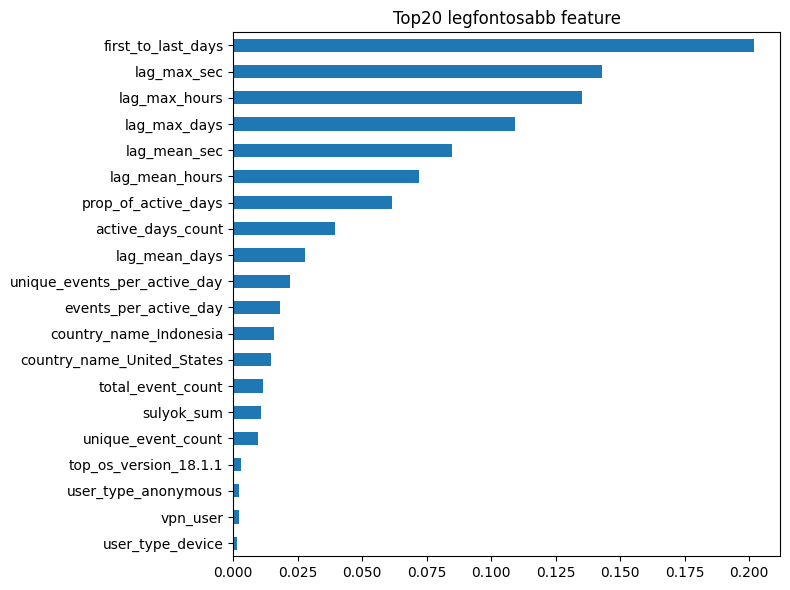

In [169]:
#FEATURE-IMPORTANCE VIZUALIZÁLÁSA

imp = pd.Series(rf.feature_importances_, index = X.columns)
top20 = imp.sort_values(ascending = False).head(20)

plt.figure(figsize = (8, 6))
top20.plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.title('Top20 legfontosabb feature')
plt.tight_layout()


In [170]:
top20 #Ez is némileg változott a class_weight = 'balanced' beállítás miatt, de a lényeg ugyanaz -> az aktivitás sűrűsége a lényeg.

first_to_last_days              0.201924
lag_max_sec                     0.142856
lag_max_hours                   0.135361
lag_max_days                    0.109369
lag_mean_sec                    0.084850
lag_mean_hours                  0.072142
prop_of_active_days             0.061426
active_days_count               0.039414
lag_mean_days                   0.027842
unique_events_per_active_day    0.022147
events_per_active_day           0.018228
country_name_Indonesia          0.015766
country_name_United_States      0.014591
total_event_count               0.011540
sulyok_sum                      0.010966
unique_event_count              0.009535
top_os_version_18.1.1           0.002922
user_type_anonymous             0.002199
vpn_user                        0.002165
user_type_device                0.001670
dtype: float64

In [171]:
#ÉRTELMEZÉS
#first_to_last_days
    #Ez a legtöbb információt hordozza: minél hosszabb idő telik el az első és az utolsó esemény között, annál nagyobb az esély a konverzióra.
    #Gyakorlatilag azt mutatja, hogy ha valaki legalább X napig aktív a trial alatt, sokkal nagyobb valószínűséggel fizet elő.

#lag_max_sec
    #A legnagyobb szünet két esemény között szintén erősen prediktív. Ha a felhasználó sosem “tűnik el” hosszú időre, inkább konvertál.

#prop_of_active_days
    #Az aktív napok aránya az első-utolsó event napjai közötti eltelt napok számához képest.

#country_name_United_States és country_name_Indonesia
    #A két legjelentősebb ország: az amerikai és az indonéz userek viselkedésében eszerint nincs nagy eltérés.

#unique_events_per_active_day
    #Az aktív napok alatt létrehozott egyedi eventek is viszonylag fontosak, hát ez sem túl meglepő.

#A további feature‐ök (unique_event_count, total_event_count, sulyok_sum, lag_median_sec, top_os verziók, user_type, vpn_user stb.)
#már jóval kisebb súlyt kapnak.

In [172]:
#MIT JELENT MINDEZ, MIRE KÖVETKEZTETHETÜNK?

#Fókusz az elköteleződésen
    #A legfontosabb jelző a “mennyi ideig marad a user aktív” →
    #Javaslat: küldj emlékeztető értesítést 3–5 nap után, ha a first_to_last_days még kicsi, hogy fenntartsd az aktivitást.

#Szünetek minimalizálása
    #A lag_max_sec és lag_mean_sec alapján a hosszú “üresjáratokat” csökkenteni kell.
    #Javaslat: beépíthetsz in‐app tippeket vagy e-mail cue-kat, ha a user több mint X órát nem használja az appot.

#Országonkénti stratégiák
    #Az USA‐s és indonéz userek viszik el a feature‐ök egy részét.
    #Javaslat: országonként eltérő onboarding– és marketing‐anyagot használni, illetve lokalizált ajánlatokat
    #(pl. árkedvezmény, helyi nyelvű útmutatók).

#Másodlagos jellemzők
    #Bár a sulyok_sum (a fontos eventek pontja) még relatíve alacsony imp., nem kell elfelejteni:
    #Javaslat: ha valaki nagyon sok “3‐pontos” eventet hajtott végre (pl. mentések, trial_starts), lehet, hogy készen áll a fizetésre →
    #itt célozhatod erősebben upsell-lel.

#VPN‐flag és user_type
    #Ezek az utolsó helyeken vannak, szóval feltehetően nem gyakorolnak nagy hatást a konverzióra.

#További javaslat!!!
    #Kísérletek tervezése: indíts A/B teszteket az értesítési stratégiára, hogy ténylegesen meg tudod-e emelni a first_to_last_days átlagát.

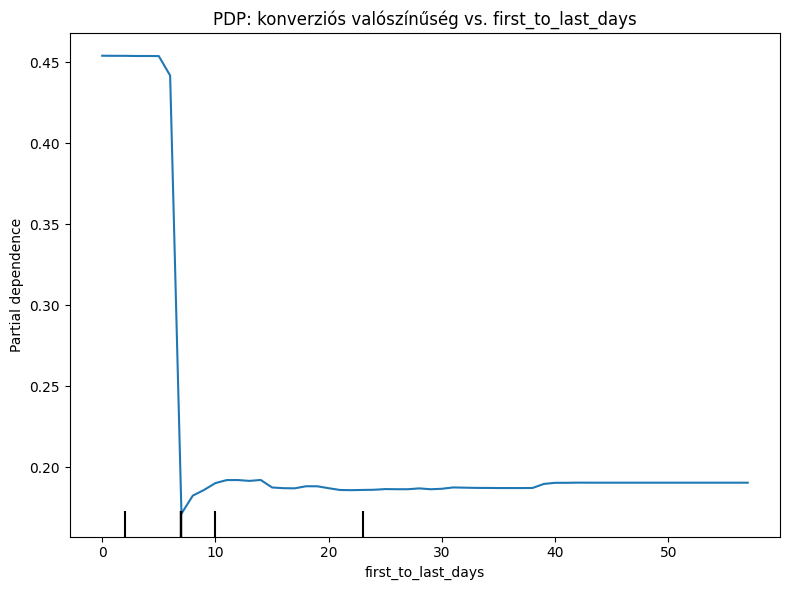

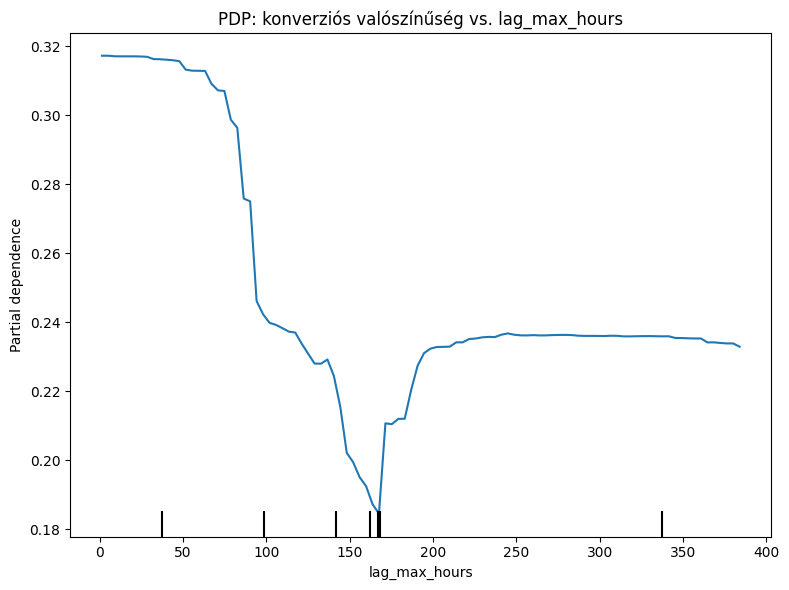

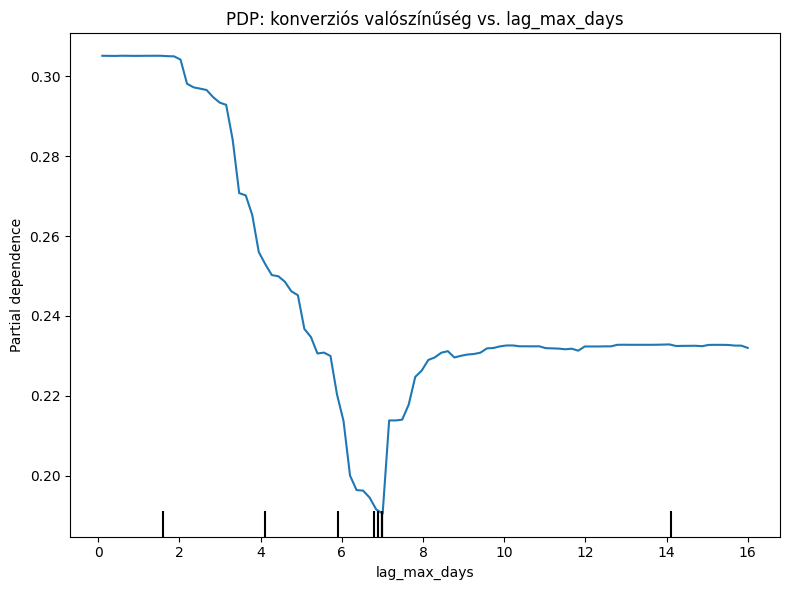

In [173]:
#PDP (Partial Dependence Plot) segítségével megnézem, hogyan függ a conversion valószínűsége a first_to_last_days és a
#lag_max_sec értékétől

from sklearn.inspection import PartialDependenceDisplay

#fig, ax = plt.subplots(figsize = (8, 6)) -> Matplotlib függvény, ami létrehoz egy új ábrát és tengelyt (fig és ax).
#figsize = (8, 6) -> Beállítja az ábra méretét, ami most 8 hüvelyk széles és 6 hüvelyk magas.
#PartialDependenceDisplay.from_estimator(...) -> Elkészíti a részleges függőségi diagramot (PDP) a first_to_last_days változóra.
    #rf -> A már betanított RandomForestClassifier modell.
    #X_train -> A bemeneti adatok (jellemzők), amin a PDP-t értelmezzük.
    #['first_to_last_days'] -> A feature, amely hatását vizsgáljuk.
    #ax = ax -> Erre a tengelyre rajzolja a grafikont.
    #kind = 'average' -> A klasszikus PDP (átlagolt hatás) típus - megmutatja, hogy az adott változó értéke mellett milyen a predikció várható értéke.
#plt.tight_layout() -> Ez a matplotlib trükk automatikusan elrendezi az ábrát úgy, hogy ne lógjon ki a cím, tengelyfelirat stb.
#Megakadályozza a torlódást, levágást.
fig, ax = plt.subplots(figsize = (8, 6))
PartialDependenceDisplay.from_estimator(
    rf, X_train, ['first_to_last_days'], ax = ax,
    kind = 'average'
)
ax.set_title('PDP: konverziós valószínűség vs. first_to_last_days')
plt.tight_layout()

#PDP LAX_MAX_HOURS
fig, ax = plt.subplots(figsize = (8, 6))
PartialDependenceDisplay.from_estimator(
    rf, X_train, ['lag_max_hours'], ax = ax,
    kind = 'average'
)
ax.set_title('PDP: konverziós valószínűség vs. lag_max_hours')
plt.tight_layout()

#PDP LAX_MAX_DAYS
fig, ax = plt.subplots(figsize = (8, 6))
PartialDependenceDisplay.from_estimator(
    rf, X_train, ['lag_max_days'], ax = ax,
    kind = 'average'
)
ax.set_title('PDP: konverziós valószínűség vs. lag_max_days')
plt.tight_layout()

#Y tengelyen a 0,6 = 60% a valószínűsége a konverziónak az adott
#first_to_last_days érték mellett.

In [174]:
#ÚGY ÉRZEM ITT NEM SOKAT AD HOZZÁ, HOGY 7 NAP UTÁN CSÖKKEN A KONVERZIÓ VALÓSZÍNŰSÉGE!

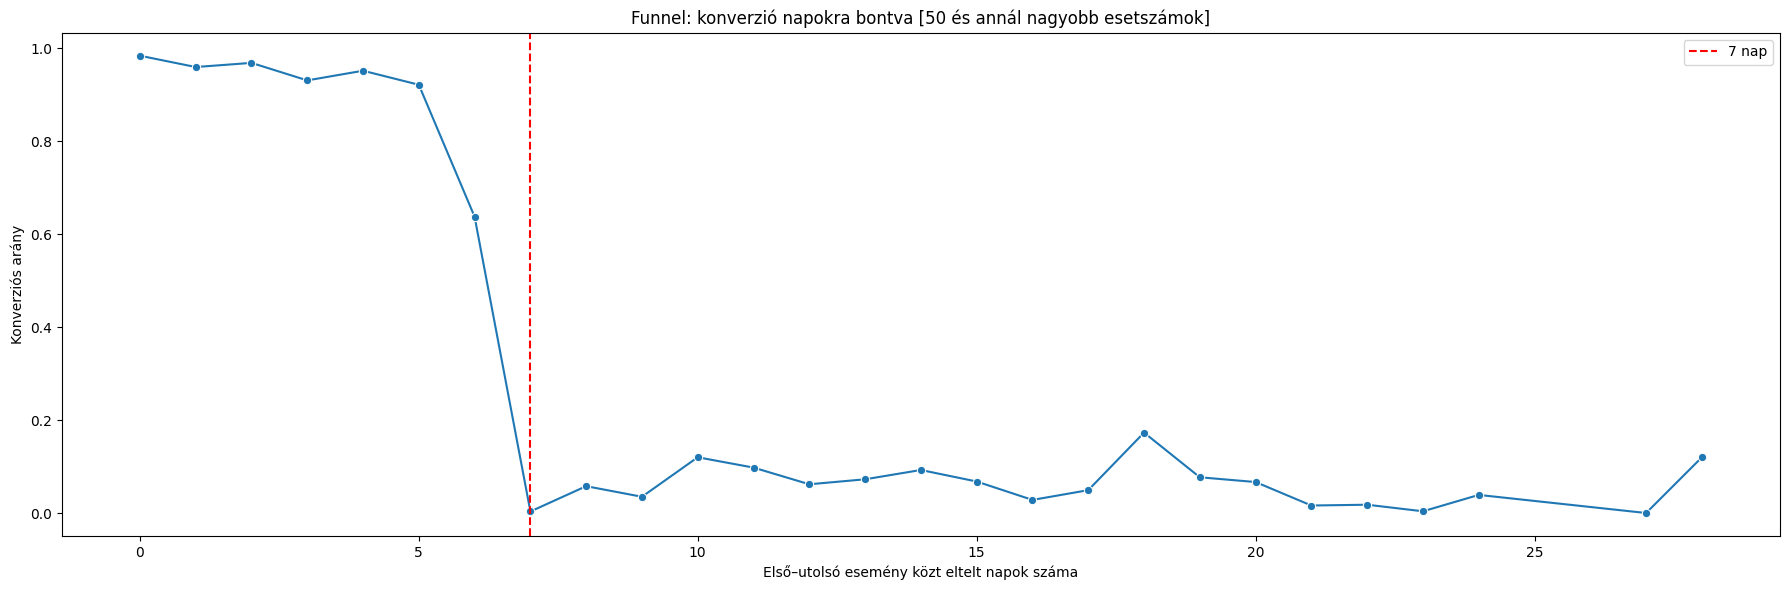

In [175]:
#FUNNELES PRÓBÁLKOZÁSOK

#Készítsünk bins-eket, pl. minden napra külön sávot.
#Ez a sor azt csinálja, hogy legyárt egy egész számokból álló tömböt (listát), ami 0-tól user_level_df['first_to_last_days']
#oszlopában található maximális érték + 1-ig tart, lépésközönként 1-gyel. Lényegében ez lesz a napok száma az X tengelyen.
bins = np.arange(0, user_level_df['first_to_last_days'].max() + 2)  #0,1,2,... max nap

#Hozzáadunk egy kategóriát.
user_level_df['span_days_bin'] = pd.cut(
    user_level_df['first_to_last_days'], 
    bins = bins, right = False, labels = bins[:-1]
)

#Binenként kiszámoljuk a konverziós arányt.
#user_level_df.groupby('span_days_bin', observed = False) -> A DF-et a span_days_bin oszlop értékei szerint csoportosítja,
#majd kiválasztjuk a 'converted' oszlopot.
funnel = (
    user_level_df
      .groupby('span_days_bin', observed = False)['converted']
      .agg(conversion_rate = 'mean', count='size')
      .reset_index()
)

#Csak azok legyenek ábrázolva, ahol az esetszám nagyobb 50-nél.
funnel = funnel[funnel['count'] >= 50]

#Végül maga az ábra
plt.figure(figsize = (18, 6))
sns.lineplot(data = funnel, x = 'span_days_bin', y = 'conversion_rate', marker = 'o')
plt.axvline(7, color = 'red', linestyle = '--', label = '7 nap')
plt.xlabel('Első–utolsó esemény közt eltelt napok száma')
plt.ylabel('Konverziós arány')
plt.title('Funnel: konverzió napokra bontva [50 és annál nagyobb esetszámok]')
plt.legend()
plt.tight_layout()


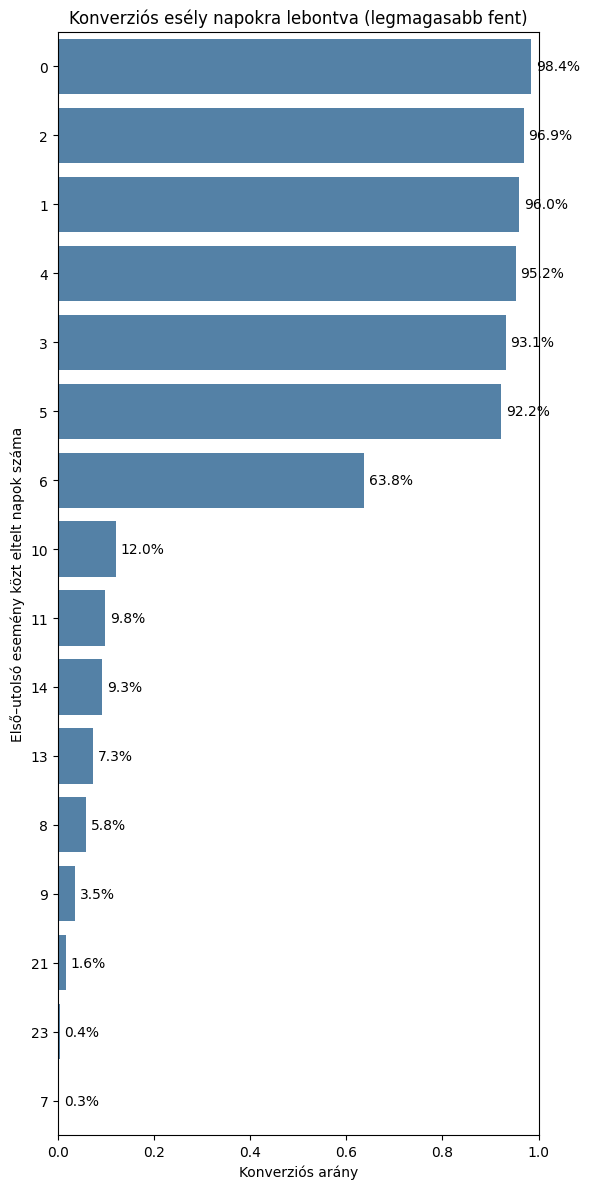

In [176]:
#KONVERZIÓS ESÉLY NAPOKRA LEBONTVA

#bins -> Ugyanaz a változó mint az előbb.
bins = np.arange(0, user_level_df['first_to_last_days'].max() + 2)

#span_days_bin -> Ugyanaz a változó mint az előbb.
user_level_df['span_days_bin'] = pd.cut(
    user_level_df['first_to_last_days'], 
    bins = bins, right = False, labels = bins[:-1]
)

#funnel változó -> Ugyanaz a változó mint az előbb.
funnel = (
    user_level_df
      .groupby('span_days_bin', observed = False)['converted']
      .agg(conversion_rate = 'mean', count='size')
      .reset_index()
)

#Csak azok legyenek ábrázolva, ahol a userszám nagyobb 100-nál.
funnel = funnel[funnel['count'] >= 100]

#Rendezés csökkenő sorrendbe a conversion_rate szerint.
funnel_sorted = funnel.sort_values('conversion_rate', ascending = False)

#Horizontal bar chart megrajzolása.
plt.figure(figsize = (6, 12))
sns.barplot(
    data = funnel_sorted,
    y = 'span_days_bin',
    x = 'conversion_rate',
    color = 'steelblue',
    order = funnel_sorted['span_days_bin']
)
plt.xlabel('Konverziós arány')
plt.ylabel('Első–utolsó esemény közt eltelt napok száma')
plt.title('Konverziós esély napokra lebontva (legmagasabb fent)')
plt.xlim(0, 1)
#Százalékos értékek kiírása.
for i, (rate, cnt) in enumerate(zip(funnel_sorted['conversion_rate'], funnel_sorted['count'])):
    plt.text(rate + 0.01, i, f'{rate:.1%}', va='center')
plt.tight_layout()


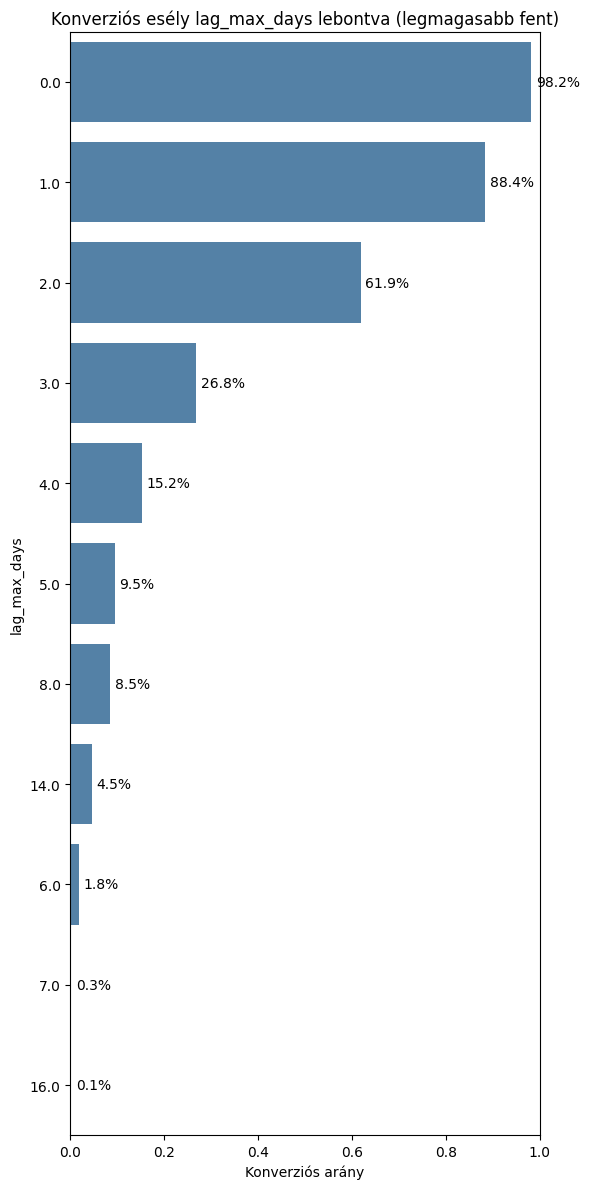

In [177]:
#Bins újraszámítása
bins = np.arange(0, user_level_df['lag_max_days'].max() + 2)
user_level_df['span_days_bin'] = pd.cut(
    user_level_df['lag_max_days'],
    bins = bins,
    right = False,
    labels = bins[:-1]
)

#funnel változó -> Ugyanaz a változó mint az előbb.
funnel = (
    user_level_df
      .groupby('span_days_bin', observed = False)['converted']
      .agg(conversion_rate = 'mean', count = 'size')
      .reset_index()
)

#Csak azok legyenek ábrázolva, ahol az esetszám nagyobb 100-nál.
funnel = funnel[funnel['count'] >= 100]

#Rendezés csökkenő sorrendbe a conversion_rate szerint.
funnel_sorted = funnel.sort_values('conversion_rate', ascending = False)

#Horizontal bar chart megrajzolása.
plt.figure(figsize = (6, 12))
sns.barplot(
    data = funnel_sorted,
    y = 'span_days_bin',
    x = 'conversion_rate',
    color = 'steelblue',
    order = funnel_sorted['span_days_bin']
)
plt.xlabel('Konverziós arány')
plt.ylabel('lag_max_days')
plt.title('Konverziós esély lag_max_days lebontva (legmagasabb fent)')
plt.xlim(0, 1)

#Százalékos értékek kiírása.
for i, (rate, cnt) in enumerate(zip(funnel_sorted['conversion_rate'], funnel_sorted['count'])):
    plt.text(rate + 0.01, i, f'{rate:.1%}', va='center')
    
plt.tight_layout()


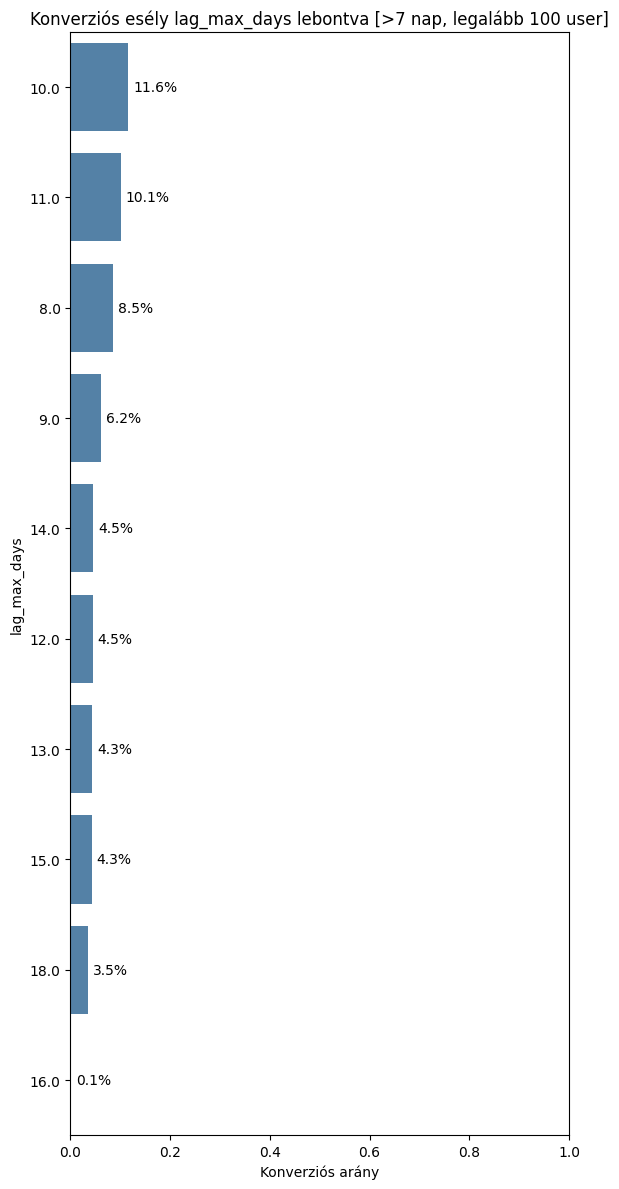

In [178]:
#Bins újraszámítása
bins = np.arange(0, user_level_df['lag_max_days'].max() + 2)
user_level_df['span_days_bin'] = pd.cut(
    user_level_df['lag_max_days'],
    bins = bins,
    right = False,
    labels = bins[:-1]
)

#funnel változó -> Ugyanaz a változó mint az előbb.
funnel = (
    user_level_df
      .groupby('span_days_bin', observed = False)['converted']
      .agg(conversion_rate = 'mean', count = 'size')
      .reset_index()
)

#Ezúttal csak azokat a napokat tartjuk meg, ahol a bin (nap) nagyobb mint 7, illetve ahol több mint 50 user generált adatot.
funnel = funnel[funnel['span_days_bin'].astype(int) > 7]
funnel = funnel[funnel['count'] >= 50]

#Rendezés csökkenő sorrendbe a conversion_rate szerint.
funnel_sorted = funnel.sort_values('conversion_rate', ascending=False)

#Horizontal bar chart megrajzolása.
plt.figure(figsize = (6, 12))
sns.barplot(
    data = funnel_sorted,
    y = 'span_days_bin',
    x = 'conversion_rate',
    color = 'steelblue',
    order = funnel_sorted['span_days_bin']
)
plt.xlabel('Konverziós arány')
plt.ylabel('lag_max_days')
plt.title('Konverziós esély lag_max_days lebontva [>7 nap, legalább 100 user]')
plt.xlim(0, 1)

#A százalékok kiírása a sávok jobb oldalán.
for i, (rate, cnt) in enumerate(zip(funnel_sorted['conversion_rate'], funnel_sorted['count'])):
    plt.text(rate + 0.01, i, f'{rate:.1%}', va='center')

plt.tight_layout()


In [179]:
#Ez megmutatja, hogy konvertálók vs. nem‐konvertálók esetén átlagosan hány eseményt “nyomnak” naponta.
print(user_level_df[['events_per_active_day','unique_events_per_active_day','converted']]
      .groupby('converted')
      .agg(['mean','median','count']))


          events_per_active_day                     \
                           mean      median  count   
converted                                            
0                     83.360761   70.000000  11453   
1                    132.837208  107.416667   2188   

          unique_events_per_active_day                    
                                  mean     median  count  
converted                                                 
0                            24.643152  24.333333  11453  
1                            36.909063  32.000000   2188  


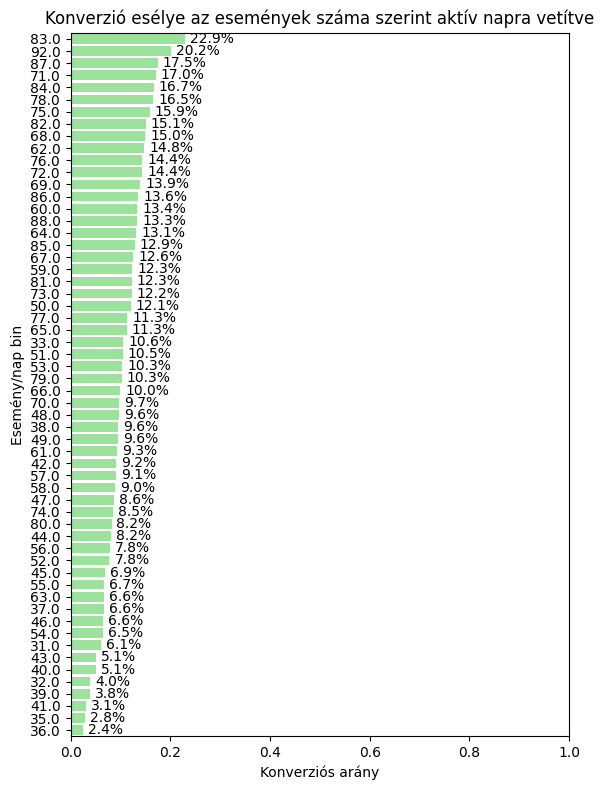

In [180]:
#KONVERZIÓ ESÉLYE AZ ESEMÉNYEK SZÁMA SZERINT AKTÍV NAPRA VETÍTVE

#Bins számítása az events_per_active_day alapján
bins = np.arange(0, user_level_df['events_per_active_day'].max() + 2)
user_level_df['events_per_day_bin'] = pd.cut(
    user_level_df['events_per_active_day'],
    bins = bins,
    right = False,
    labels = bins [:-1]
)

#Konverziós ráta binenként
funnel_epd = (
    user_level_df
    .groupby('events_per_day_bin', observed = False)['converted']
    .agg(conversion_rate = 'mean', count = 'size')
    .reset_index()
)

#Csak azokat a napokat nézzük, ahol legalább 100 esemény történt.
funnel_epd = funnel_epd[funnel_epd['count'] >= 100].sort_values('conversion_rate', ascending = False)

#Chart megrajzolása
plt.figure(figsize = (6, 8))
sns.barplot(
    data = funnel_epd,
    y = 'events_per_day_bin',
    x = 'conversion_rate',
    color = 'lightgreen',
    order = funnel_epd['events_per_day_bin']
)
plt.xlabel('Konverziós arány')
plt.ylabel('Esemény/nap bin')
plt.title('Konverzió esélye az események száma szerint aktív napra vetítve')
plt.xlim(0,1)
#Százalékos értékek kiírása.
for i,(r,c) in enumerate(zip(funnel_epd['conversion_rate'], funnel_epd['count'])):
    plt.text(r+0.01, i, f"{r:.1%}", va='center')
plt.tight_layout()


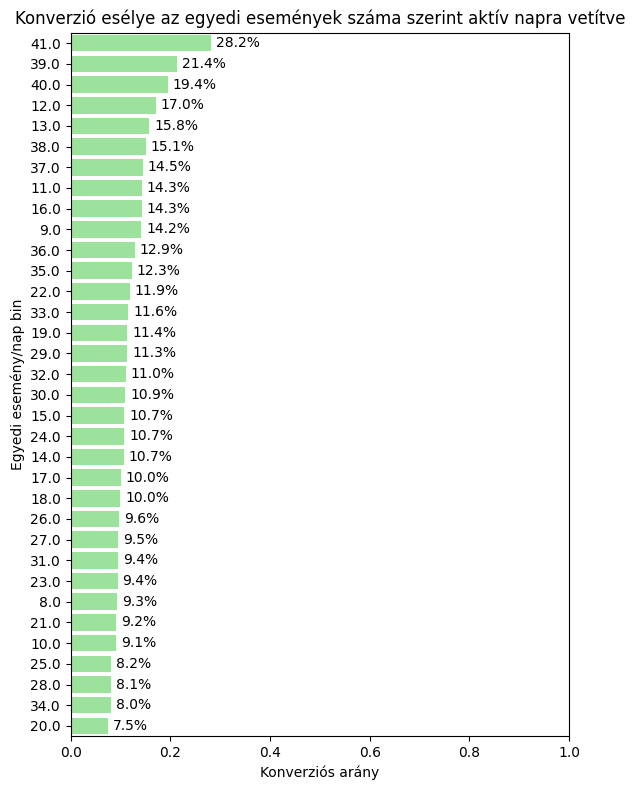

In [181]:
#KONVERZIÓ ESÉLYE AZ EGYEDI ESEMÉNYEK SZÁMA SZERINT AKTÍV NAPRA VETÍTVE

#Bins számítása az events_per_active_day alapján
bins = np.arange(0, user_level_df['unique_events_per_active_day'].max() + 2)
user_level_df['unique_events_per_day_bin'] = pd.cut(
    user_level_df['unique_events_per_active_day'],
    bins = bins,
    right = False,
    labels = bins [:-1]
)

#Konverziós ráta binenként
funnel_uepd = (
    user_level_df
    .groupby('unique_events_per_day_bin', observed = False)['converted']
    .agg(conversion_rate = 'mean', count = 'size')
    .reset_index()
)

#Csak azokat a napokat nézzük, ahol legalább 100 esemény történt.
funnel_uepd = funnel_uepd[funnel_uepd['count'] >= 100].sort_values('conversion_rate', ascending = False)

#Chart megrajzolása
plt.figure(figsize = (6, 8))
sns.barplot(
    data = funnel_uepd,
    y = 'unique_events_per_day_bin',
    x = 'conversion_rate',
    color = 'lightgreen',
    order = funnel_uepd['unique_events_per_day_bin']
)
plt.xlabel('Konverziós arány')
plt.ylabel('Egyedi esemény/nap bin')
plt.title('Konverzió esélye az egyedi események száma szerint aktív napra vetítve')
plt.xlim(0,1)
#Százalékos értékek kiírása.
for i,(r,c) in enumerate(zip(funnel_uepd['conversion_rate'], funnel_uepd['count'])):
    plt.text(r+0.01, i, f"{r:.1%}", va='center')
plt.tight_layout()

#Egy idő után az egyedi események számának növekedése már csökkenti a konverzió esélyét????

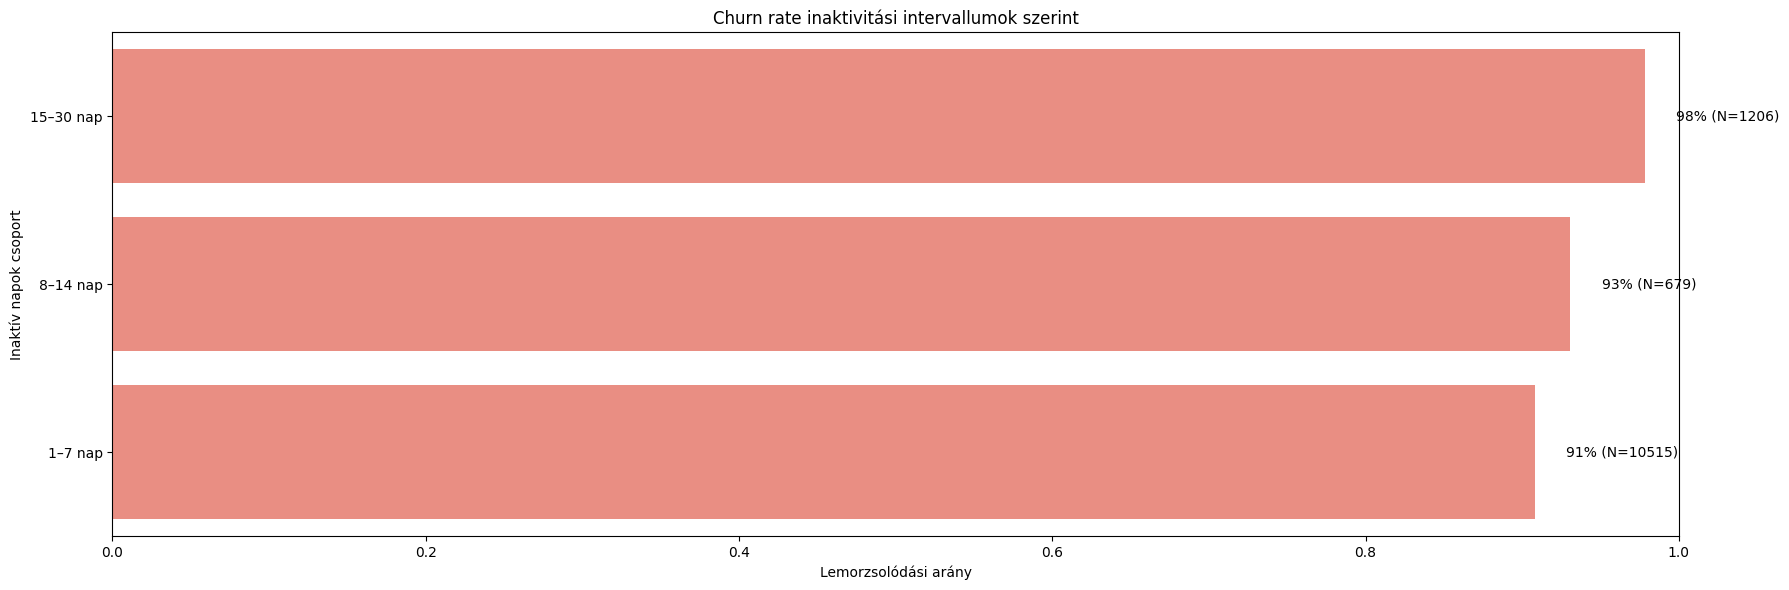

In [182]:
#Binek definiálása: 1–7, 8–14, 15–30, 31+ nap
bins = [0, 7, 14, 30, np.inf]
labels = ['1–7 nap', '8–14 nap', '15–30 nap', '31+ nap']

#Lag másodpercek napokká konvertálása, lefele kerekítve
user_level_df['max_idle_days'] = (
    np.floor(user_level_df['lag_max_sec'] / 86400)
      .astype(int)
)

user_level_df['idle_days_group'] = pd.cut(
    user_level_df['max_idle_days'],
    bins = bins,
    labels = labels,
    right = True  #Így például a 7. nap beleesik az első csoportba.
)

#Churn-ráta és elemszám csoportonként
churn = (
    user_level_df
      .groupby('idle_days_group', observed = False)['converted']
      .agg(
          churn_rate = lambda x: 1 - x.mean(),
          count = 'size'
      )
      .reset_index()
)

#Csak ahol legalább 100 user van.
churn = churn[churn['count'] >= 100]

#Rendezés csökkenő churn_rate szerint.
churn = churn.sort_values('churn_rate', ascending = False)

#Maga az ábra
plt.figure(figsize = (18, 6))
sns.barplot(
    data = churn,
    y = 'idle_days_group',
    x = 'churn_rate',
    color = 'salmon',
    order = churn['idle_days_group']
)
plt.xlabel('Lemorzsolódási arány')
plt.ylabel('Inaktív napok csoport')
plt.title('Churn rate inaktivitási intervallumok szerint')
plt.xlim(0,1)

#Százalék és elemszám kiírása.
for i, (rate, cnt) in enumerate(zip(churn['churn_rate'], churn['count'])):
    plt.text(rate + 0.02, i, f'{rate:.0%} (N={cnt})', va='center')

plt.tight_layout()

#Tehát akiknek 1-7 nap a max inaktivitásuk, azok 91,2%-ban lemorzsolódnak.
#Ugyanakkor akiknek 8-14 nap volt a max inaktivitásuk, azoknak már csak 58,1%-a nem konvertált.
#A 15-30 nap csoportban 79% nem konvertált.
#Akiknek 31 nap és afeletti az inaktivitása, azoknak 57,9%-a nem konvertált.

#Mit lehet ebből leszűrni?
    #Az 1–7 napos inaktivitás után nagyon magas a lemorzsolódás (91,2%).
    #A legjobb konverziós arány (legalacsonyabb churn) a 8–14 vagy az 31+ napos csoportban van (~42 % körül).
    #Tehát, ha valaki egy rövidebb (1–7 napos) szünet után tér vissza, kevésbé esélyes, hogy fizetős lesz,
    #míg a 8–14 nap vagy 31+ nap szünet után újra aktív felhasználók közül viszonylag magasabb a konverzió.
    #Ez segíthet célzottan azokra a felhasználókra fókuszálni, akik a szünet utáni „optimum” időzítésben térnek vissza.

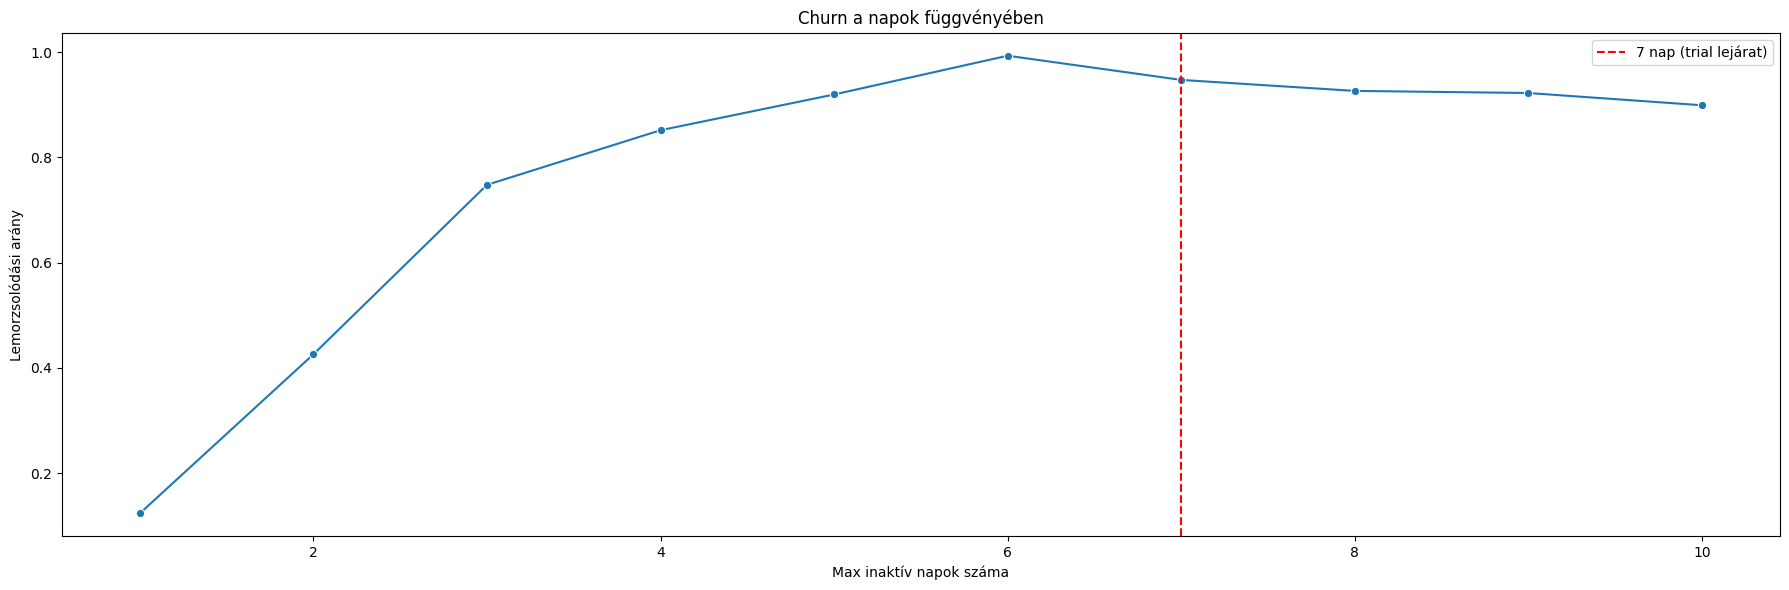

In [183]:
#MOST CHURN RATE ANÉLKÜL, HOGY ÖSSZEVONNÁNK AZ ELSŐ HÉT NAPOT
#Pontos napokra bontva anélkül, hogy össze‐ráncolnánk a 7-et.
funnel = (
    user_level_df
      .groupby('max_idle_days')['converted']
      .agg(churn_rate = lambda x: 1 - x.mean(), count = 'size')
      .reset_index()
)

#Csak az 1–10 napok vizsgálata.
funnel10 = funnel[(funnel['max_idle_days'] >= 1) & (funnel['max_idle_days'] <= 10)]

#Ábra napok szerint rendezve
plt.figure(figsize = (18, 6))
sns.lineplot(
    data = funnel10,
    x = 'max_idle_days',
    y = 'churn_rate',
    marker = 'o'
)
plt.axvline(7, color = 'red', linestyle = '--', label = '7 nap (trial lejárat)')
plt.xlabel('Max inaktív napok száma')
plt.ylabel('Lemorzsolódási arány')
plt.title('Churn a napok függvényében')
plt.legend()
plt.tight_layout()

#Ez alapján már látok egy olyat, hogy akik már az első héten inaktívak, azok nagyon nagy arányban nem lesznek konvertálósak.

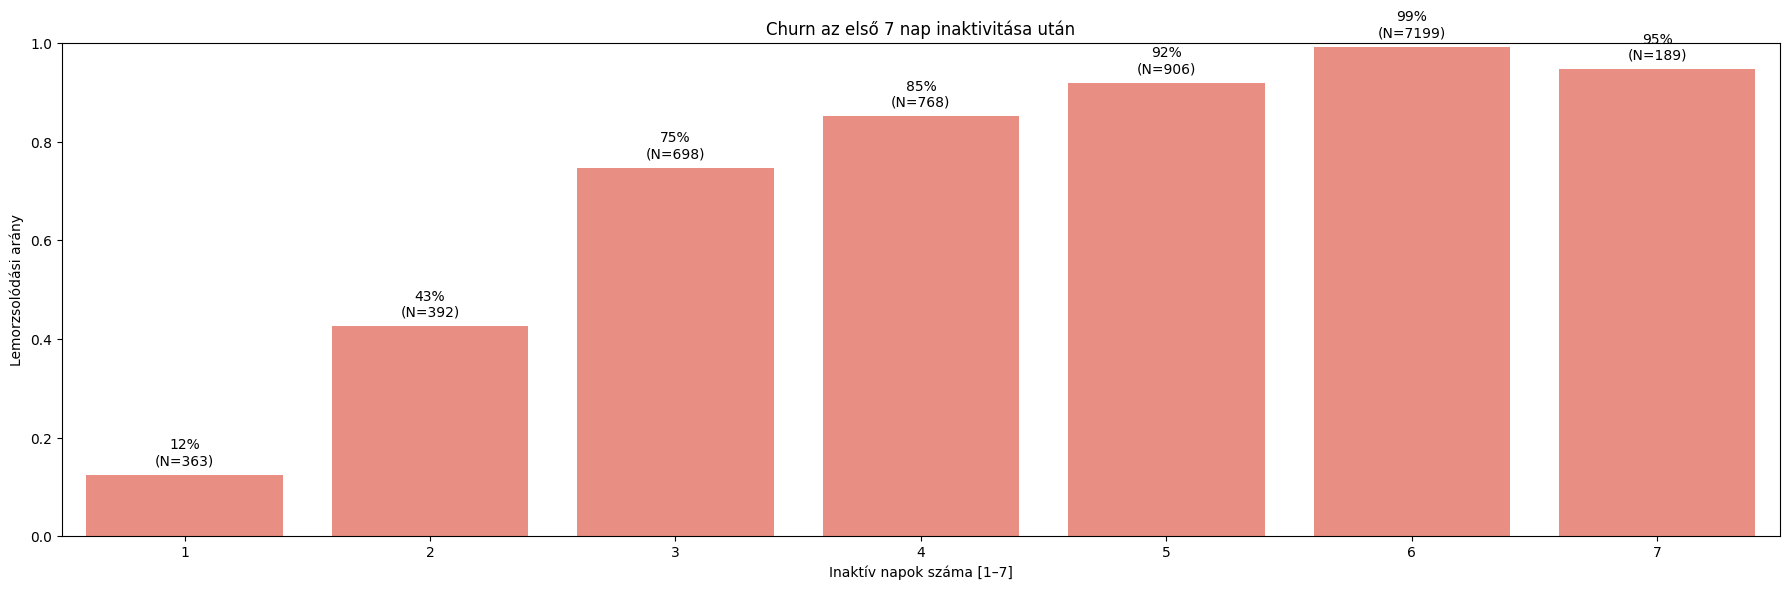

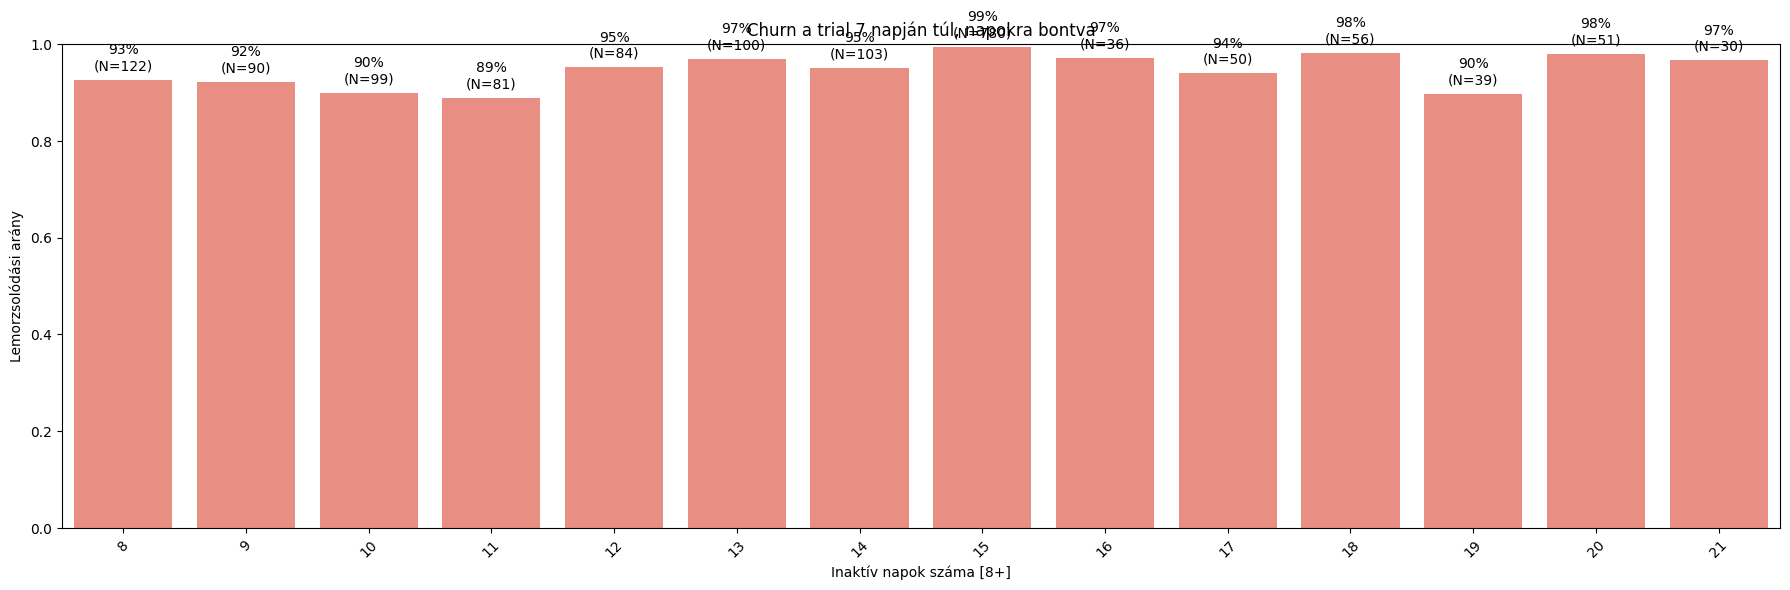

In [184]:
#XHURN AZ ELSŐ 7 NAP INAKTIVITÁSA UTÁN

#Churn‐ráta napi bontásban (max_idle_days -> churn)
churn = (
    user_level_df
      .groupby('max_idle_days')['converted']
      .agg(churn_rate = lambda x: 1 - x.mean(), count = 'size')
      .reset_index()
)

#Csak az 1–7 nap közötti adatok.
first_week = churn[(churn['max_idle_days'] >= 1) & (churn['max_idle_days'] <= 7)]

#Plot felrajzolása.
plt.figure(figsize = (18, 6))
sns.barplot(
    data = first_week,
    x = 'max_idle_days',
    y = 'churn_rate',
    color = 'salmon'
)
plt.xlabel('Inaktív napok száma [1–7]')
plt.ylabel('Lemorzsolódási arány')
plt.title('Churn az első 7 nap inaktivitása után')
plt.ylim(0, 1)
for i, (day, rate, cnt) in enumerate(zip(first_week['max_idle_days'],
                                         first_week['churn_rate'],
                                         first_week['count'])):
    plt.text(i, rate + 0.02, f'{rate:.0%}\n(N={cnt})', ha = 'center')
plt.tight_layout()

#MÁSODIK CHART

#A 8+ napos periódus napokra bontva, illetve csak count >= 30-ra szűrve.
after_week = churn[churn['max_idle_days'] >= 8]
after_week = after_week[after_week['count'] >= 30].sort_values('max_idle_days')

#Ábra felrajzolása
plt.figure(figsize = (18, 6))
sns.barplot(
    data = after_week,
    x = 'max_idle_days',
    y = 'churn_rate',
    color = 'salmon'
)
plt.xlabel('Inaktív napok száma [8+]')
plt.ylabel('Lemorzsolódási arány')
plt.title('Churn a trial 7 napján túl, napokra bontva')
plt.ylim(0, 1)
for i, (day, rate, cnt) in enumerate(zip(after_week['max_idle_days'],
                                         after_week['churn_rate'],
                                         after_week['count'])):
    plt.text(i, rate + 0.02, f'{rate:.0%}\n(N={cnt})', ha = 'center')
plt.xticks(rotation = 45)
plt.tight_layout()


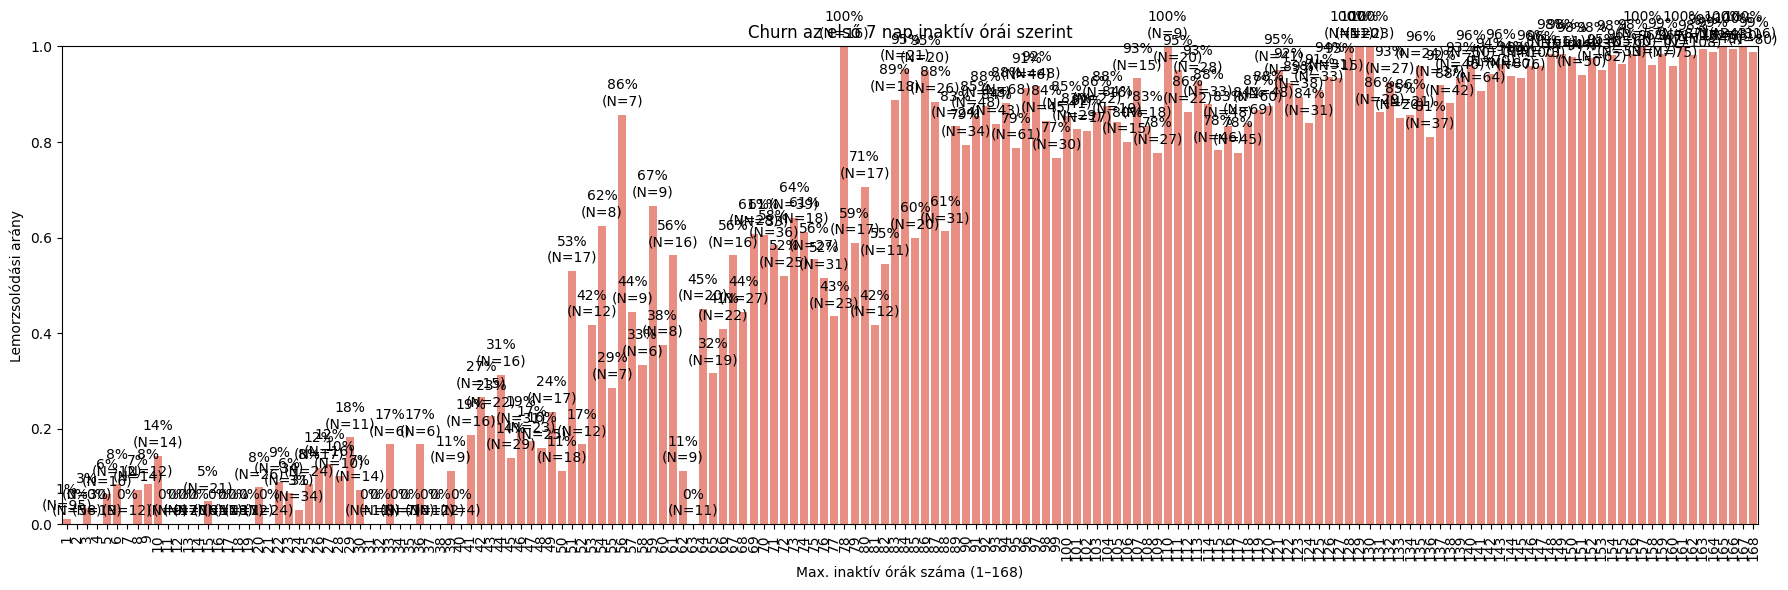

In [185]:
#MEKKORA A LEMORZSOLÓDÁSI ARÁNYA AZOKNAK, AKIK CSAK 1, 2 STB. ÓRÁT VOLTAK MAXIMUM INAKTÍVAK?

#Legnagyobb inaktív szakaszok órákban kifejezve.
user_level_df['max_idle_hours'] = (
    np.floor(user_level_df['lag_max_sec'] / 3600)
      .astype(int)
)

#Churn‐ráta óránként (max_idle_hours -> churn)
churn_hours = (
    user_level_df
      .groupby('max_idle_hours')['converted']
      .agg(churn_rate = lambda x: 1 - x.mean(), count = 'size')
      .reset_index()
)

#Szűrés azokra, akik maximum egy hétig voltak inaktívak (1-168 óra).
first_week_hours = churn_hours[
    (churn_hours['max_idle_hours'] >= 1) &
    (churn_hours['max_idle_hours'] <= 7 * 24)
]

#Ábra maga őszentsége.
plt.figure(figsize = (18, 6))
sns.barplot(
    data = first_week_hours,
    x = 'max_idle_hours',
    y = 'churn_rate',
    color = 'salmon'
)
plt.xlabel('Max. inaktív órák száma (1–168)')
plt.ylabel('Lemorzsolódási arány')
plt.title('Churn az első 7 nap inaktív órái szerint')
plt.ylim(0, 1)

#A százalékos értékek és az elemszámok kiírása minden sáv fölé.
for i, (hour, rate, cnt) in enumerate(zip(
        first_week_hours['max_idle_hours'],
        first_week_hours['churn_rate'],
        first_week_hours['count']
    )):
    plt.text(i, rate + 0.02, f'{rate:.0%}\n(N={cnt})', ha = 'center')

plt.xticks(rotation = 90)
plt.tight_layout()


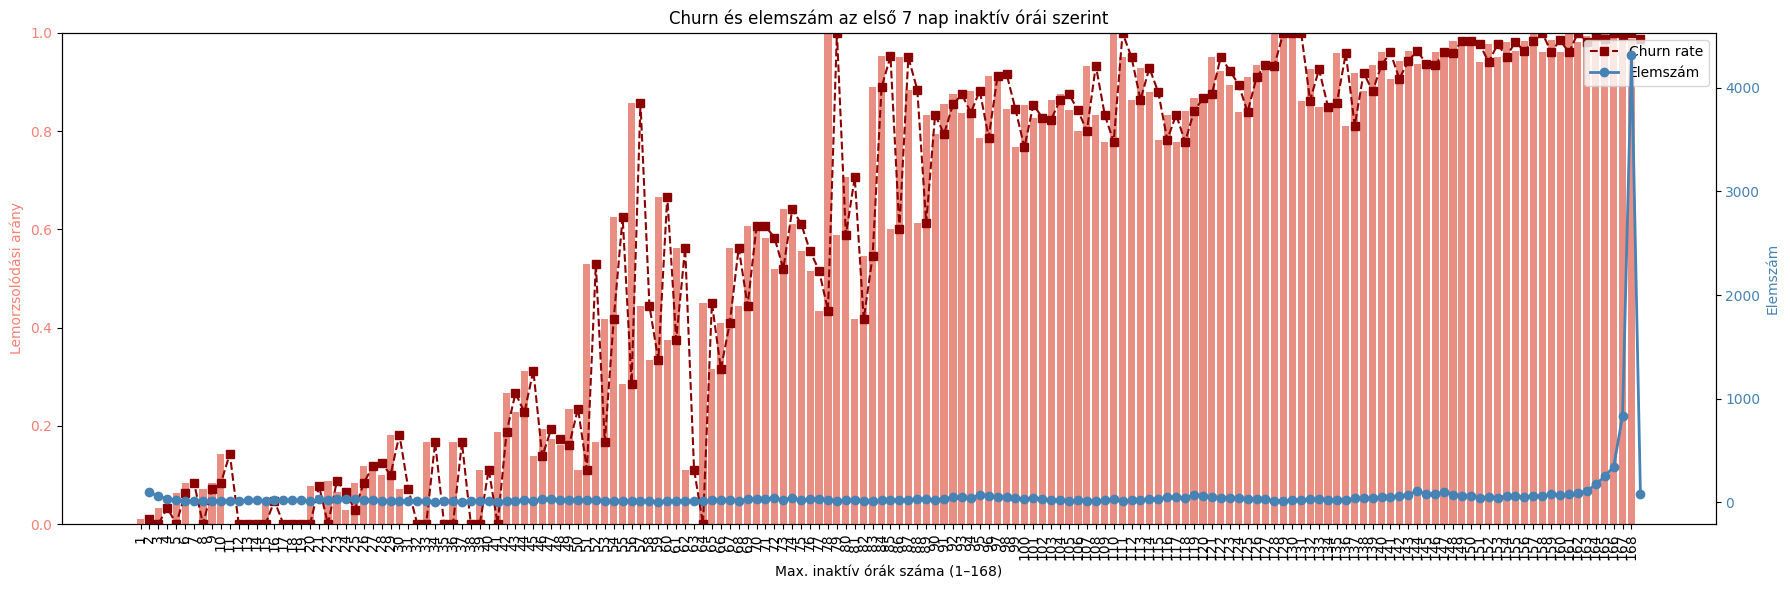

In [186]:
#AZ ELŐZŐ CHART NÉMI MÓDOSÍTÁSSAL

fig, ax1 = plt.subplots(figsize = (18, 6))

#Barplot a churn_rate-tel a bal tengelyen.
sns.barplot(
    data = first_week_hours,
    x = 'max_idle_hours',
    y = 'churn_rate',
    color = 'salmon',
    ax = ax1
)
#Első tengely.
ax1.set_xlabel('Max. inaktív órák száma (1–168)')
ax1.set_ylabel('Lemorzsolódási arány', color = 'salmon')
ax1.set_ylim(0, 1)
ax1.tick_params(axis = 'y', labelcolor = 'salmon')

#Második tengely a count számára.
ax2 = ax1.twinx()
ax2.plot(
    first_week_hours['max_idle_hours'],
    first_week_hours['count'],
    color = 'steelblue',
    marker = 'o',
    linewidth = 2,
    label = 'Elemszám'
)
ax2.set_ylabel('Elemszám', color = 'steelblue')
ax2.tick_params(axis = 'y', labelcolor = 'steelblue')

#Vonal hozzáadása a churn_rate-hez is.
ax1.plot(
    first_week_hours['max_idle_hours'],
    first_week_hours['churn_rate'],
    color = 'darkred',
    marker = 's',
    linestyle = '--',
    linewidth = 1.5,
    label = 'Churn rate'
)

#Legend-et mindkét tengelyhez -> a külön legend panelek helyett összevonjuk őket.
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc = 'upper right')

#X-tick forgatás, layout
ax1.tick_params(axis = 'x', rotation = 90)
plt.title('Churn és elemszám az első 7 nap inaktív órái szerint')
plt.tight_layout()


In [187]:
#A KÜLÖNBÖZŐ TÍPUSÚ EVENTEK SZÁMÁNAK ÖSSZESÍTÉSE USER SZINTEN ÉS ÚGY MEGNÉZNI MI VAN

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

#Event‐gyakoriságok user‐szinten -> új változó létrehozása. A trial eventek itt sincsenek benne!
event_counts_un_col = (
    not_trial_events
      .groupby(['distinct_id','event'])
      .size()
      .unstack(fill_value = 0)
)

In [189]:
event_counts_un_col.reset_index(inplace = True)
event_counts_un_col

event,distinct_id,$ae_first_open,$ae_iap,$ae_session,$ae_updated,$create_alias,$identify,*AVCapture* sessionRuntimeErrorOccurred,AIGenerateTap,AIGeneratorError,...,user_attributes,videoRecorderAuthFinished,videoRecorderExportFinished,videoRecorderExportStarted,videoRecorderPaymentStarted,videoRecorderPlaybackOpened,videoRecorderRecorderOpened,videoRecorderRecordingStarted,videoRecorderVideosOpened,webpaywall_open
0,$RCAnonymousID:user_00700112690657,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,$RCAnonymousID:user_00925483708199,0,1,9,1,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
2,$RCAnonymousID:user_01437385556700,0,1,5,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,$RCAnonymousID:user_02314471583726,0,4,9,1,0,0,2,0,0,...,3,0,0,0,0,0,0,0,0,0
4,$RCAnonymousID:user_02513418384456,0,1,10,1,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13636,user_99555947782843,2,1,11,0,0,2,2,0,0,...,3,0,0,0,0,0,0,0,0,0
13637,user_99644042308292,1,1,5,0,1,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
13638,user_99730907890749,1,1,10,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13639,user_99882878985269,0,1,108,3,0,0,0,1,0,...,12,0,0,0,0,0,0,0,0,0


In [190]:
konv = (not_trial_events[['distinct_id', 'converted']]
        .drop_duplicates(subset = 'distinct_id')
       )

event_counts_un_col = (event_counts_un_col.merge(konv, on = 'distinct_id', how = 'left'))

In [191]:
event_counts_un_col.head(5)

,distinct_id,$ae_first_open,$ae_iap,$ae_session,$ae_updated,$create_alias,$identify,*AVCapture* sessionRuntimeErrorOccurred,AIGenerateTap,AIGeneratorError,...,videoRecorderAuthFinished,videoRecorderExportFinished,videoRecorderExportStarted,videoRecorderPaymentStarted,videoRecorderPlaybackOpened,videoRecorderRecorderOpened,videoRecorderRecordingStarted,videoRecorderVideosOpened,webpaywall_open,converted
0,$RCAnonymousID:user_00700112690657,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
1,$RCAnonymousID:user_00925483708199,0,1,9,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
2,$RCAnonymousID:user_01437385556700,0,1,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
3,$RCAnonymousID:user_02314471583726,0,4,9,1,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,True
4,$RCAnonymousID:user_02513418384456,0,1,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True


In [192]:
event_counts_un_col['converted'] = event_counts_un_col['converted'].astype(int) #Bool értékeket átkonvertálom int-té.

In [193]:
y = event_counts_un_col['converted']
X = event_counts_un_col.drop(columns = ['distinct_id', 'converted'])

In [194]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, stratify = y, random_state = 42
)

In [195]:
rf = RandomForestClassifier(
    n_estimators = 200,
    max_depth = None,
    min_samples_leaf = 5,
    class_weight = 'balanced', #Nagyobb tanulási súlyt adok a konvertálóknak, így hátha jobb lesz a recall.
    random_state = 42,
    n_jobs = -1
)
rf.fit(X_train, y_train)

#Predikció
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

#Kiértékelés
print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2291
           1       0.99      0.96      0.97       438

    accuracy                           0.99      2729
   macro avg       0.99      0.98      0.98      2729
weighted avg       0.99      0.99      0.99      2729

ROC AUC: 0.998644686673483


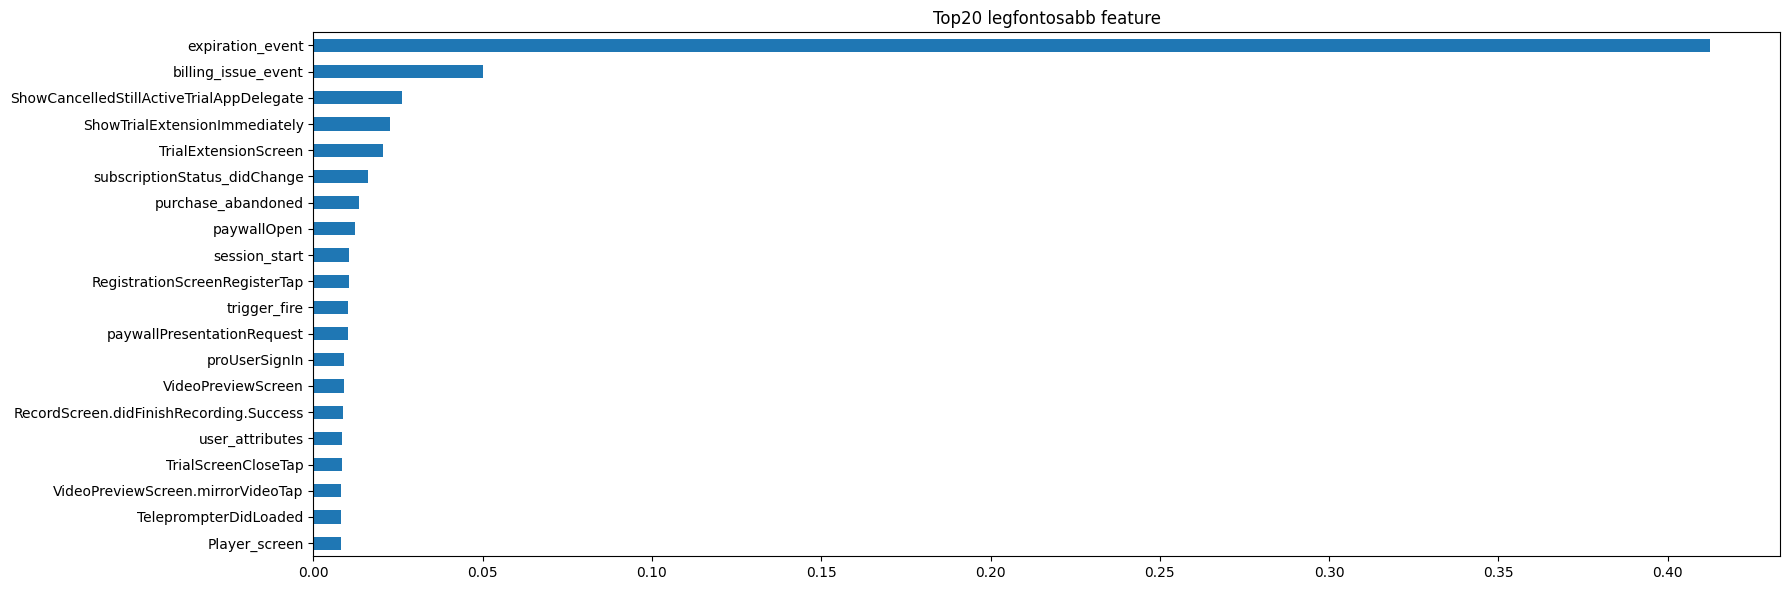

In [196]:
#FEATURE-IMPORTANCE VIZUALIZÁLÁSA

imp = pd.Series(rf.feature_importances_, index = X.columns)
top20 = imp.sort_values(ascending = False).head(20)

plt.figure(figsize = (18, 6))
top20.plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.title('Top20 legfontosabb feature')
plt.tight_layout()

#Ez önmagában még nem sokat mond, nyilvánvaló, hogy a lejáratra, problémákra utaló eventek (jó eséllyel) összefügg(het)nek azzal, hogy valaki
#konvertál-e vagy sem. Viszont több időm ezt nem volt kibontani sajnos, mindenesetre még érdemes lenne ebben az irányban is elmenni.

In [197]:
top20

expiration_event                            0.412519
billing_issue_event                         0.050130
ShowCancelledStillActiveTrialAppDelegate    0.026232
ShowTrialExtensionImmediately               0.022604
TrialExtensionScreen                        0.020482
subscriptionStatus_didChange                0.016135
purchase_abandoned                          0.013584
paywallOpen                                 0.012218
session_start                               0.010559
RegistrationScreenRegisterTap               0.010393
trigger_fire                                0.010356
paywallPresentationRequest                  0.010149
proUserSignIn                               0.009104
VideoPreviewScreen                          0.008947
RecordScreen.didFinishRecording.Success     0.008800
user_attributes                             0.008605
TrialScreenCloseTap                         0.008422
VideoPreviewScreen.mirrorVideoTap           0.008297
TeleprompterDidLoaded                       0.

In [198]:
starterek[starterek['distinct_id'] == '$RCAnonymousID:user_00700112690657']

#EZ EGY KURVAJÓ ÜGYFÉL! LÁTSZIK, HOGY JANUÁR 22-23-ÁN AKTÍV VOLT, UTÁNA VISZONT NEM.
#EZUTÁN VISZONT FEBRUÁR 5-ÉN VOLT A TRIAL_STARTED_EVENT, MAJD FEBRUÁR 11-ÉN A TRIAL_CONVERTED_EVENT.
#TEHÁT A TRIAL ESEMÉNYEKTŐL SZŰRT TÁBLÁBAN A USERNEK 0 NAP (20,5 ÓRA) A MAXIMUM INAKTIVITÁSA, KONVERTÁLT IS,
#DE KÖZBEN MÉGSEM CSINÁL TÚL SOK MINDENT EGY IDŐ UTÁN.

#TEHÁT Ő MOST EGY 0 NAPOS AKTÍV ÜGYFÉL, AKI ERŐSÍTI AZ ELMÉLETEMET, PEDIG!!!!
#HA A TRIAL ESEMÉNY UTÁN MÉG CSINÁLT VOLNA AKÁR EGYETLEN EVENTET, AKKOR SIMÁN LEHETNE 20-ON NAPOS IS. SZÓVAL AZ AKTIVITÁSA LÉNYEGÉBEN UGYANAZ LENNE,
#MÉGIS TELJESEN MÁSIK KATEGÓRIÁBA KERÜLNE.

#Szóval azért csínján azzal a megállapítással, hogy a max 0 napig inaktív ügyfelek valami hiperaktívak úgy általánosságban

,event,event_time,distinct_id,os_version,date,sulypont,converted,country_code,vpn_user,country_name,user_type
1203027,secondOrMoreOpening,2025-01-22 07:47:00,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,2,True,US,True,United_States,anonymous
1203028,device_attributes,2025-01-22 07:47:00,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,2,True,US,True,United_States,anonymous
1203029,Homescreen,2025-01-22 07:47:00,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,2,True,US,True,United_States,anonymous
1203030,user_attributes,2025-01-22 07:47:00,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,1,True,US,True,United_States,anonymous
1203031,app_launch,2025-01-22 07:47:00,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,2,True,US,True,United_States,anonymous
1203032,session_start,2025-01-22 07:47:00,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,2,True,US,True,United_States,anonymous
1203033,app_open,2025-01-22 07:47:00,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,2,True,US,True,United_States,anonymous
1203034,config_attributes,2025-01-22 07:47:00,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,2,True,US,True,United_States,anonymous
1203039,TeleprompterDidLoaded,2025-01-22 07:47:01,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,2,True,US,True,United_States,anonymous
1203040,OpenScript,2025-01-22 07:47:01,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,2,True,US,True,United_States,anonymous


In [199]:
not_trial_events[not_trial_events['distinct_id'] == '$RCAnonymousID:user_00700112690657']

,event,event_time,distinct_id,os_version,date,sulypont,converted,country_code,vpn_user,country_name,user_type,prev_time,lag_sec
0,secondOrMoreOpening,2025-01-22 07:47:00,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,2,True,US,True,United_States,anonymous,NaT,NaN
1,device_attributes,2025-01-22 07:47:00,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,2,True,US,True,United_States,anonymous,2025-01-22 07:47:00,0.0
2,Homescreen,2025-01-22 07:47:00,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,2,True,US,True,United_States,anonymous,2025-01-22 07:47:00,0.0
3,user_attributes,2025-01-22 07:47:00,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,1,True,US,True,United_States,anonymous,2025-01-22 07:47:00,0.0
4,app_launch,2025-01-22 07:47:00,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,2,True,US,True,United_States,anonymous,2025-01-22 07:47:00,0.0
5,session_start,2025-01-22 07:47:00,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,2,True,US,True,United_States,anonymous,2025-01-22 07:47:00,0.0
6,app_open,2025-01-22 07:47:00,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,2,True,US,True,United_States,anonymous,2025-01-22 07:47:00,0.0
7,config_attributes,2025-01-22 07:47:00,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,2,True,US,True,United_States,anonymous,2025-01-22 07:47:00,0.0
8,TeleprompterDidLoaded,2025-01-22 07:47:01,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,2,True,US,True,United_States,anonymous,2025-01-22 07:47:00,1.0
9,OpenScript,2025-01-22 07:47:01,$RCAnonymousID:user_00700112690657,18.1.1,2025-01-22,2,True,US,True,United_States,anonymous,2025-01-22 07:47:01,0.0


In [200]:
user_level_df[user_level_df['distinct_id'] == '$RCAnonymousID:user_00700112690657']

,distinct_id,converted,total_event_count,unique_event_count,active_days_count,first_to_last_days,lag_mean_sec,lag_median_sec,lag_min_sec,lag_max_sec,...,lag_mean_hours,events_per_active_day,unique_events_per_active_day,prop_of_active_days,span_days_bin,events_per_day_bin,unique_events_per_day_bin,max_idle_days,idle_days_group,max_idle_hours
0,$RCAnonymousID:user_00700112690657,1,42,26,2,0,2108.153846,0.0,1.0,73697.0,...,0.6,21.0,13.0,0.0,0.0,21.0,13.0,0,NaN,20
